# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

understand the connection between the licenses and the accidents for year 2016-2017 find the most regions which have unusaual numbers between them give an answers why some region has an increaseing numbers in accidents more than the issued licenses

## Executive Summary

The Traffic Accidnes & Driving Licenses both shows an intersting trends in thier data. to get the most information we can get from data a after data cleaning was applied,and after some investigating I found an Intersting data on three regions Riyadh, Makkah and the last Eastern regions. 

The most accidents cause was becuse car crashing because of speed exceeding.Finally I recommend a solutions hopeing to decrease the accidents cause in the next years. More details down on executive summary read read me file


### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [2]:
#Imports
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code
Saudi_traffic_2008=pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep = ';')
Saudi_licenses_2004_2008=pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep = ';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code
print('\n\t\t\t\tSaudi_traffic_2008')
display(Saudi_traffic_2008.head())
print('\n\t\t\t\tSaudi_licenses_2004_2008')
display(Saudi_licenses_2004_2008.head())



				Saudi_traffic_2008


Unnamed: 0  Unnamed: 0.1    Year          Region  \
0           0             0  (2016)          Makkah   
1           1             1  (2016)  Eastern Region   
2           2             2  (2016)          Tabouk   
3           3             3  (2016)            Hail   
4           4             4  (2016)            Hail   

                     Indicator   Value                  geo_point_2d  
0  No. of Casualties - Injured  12383n   21.628962766, 41.2636898334  
1     No. of Casualties - Dead   1113n  23.2883307307, 50.1478302439  
2     No. of Casualties - Dead    434n    27.90165499, 37.2598581394  
3     No. of Casualties - Dead    299n   27.400845724, 41.4406960508  
4             No. of Accidents  10199n   27.400845724, 41.4406960508


				Saudi_licenses_2004_2008


Unnamed: 0    Year Administritive Area Driving Liceses  \
0           0  (2012)              Makkah         143954n   
1           1  (1994)              Makkah          75349n   
2           2  (1998)              Makkah          86082n   
3           3  (2004)              Makkah          86636n   
4           4  (2005)              Makkah          65099n   

                  geo_point_2d  
0  21.628962766, 41.2636898334  
1  21.628962766, 41.2636898334  
2  21.628962766, 41.2636898334  
3  21.628962766, 41.2636898334  
4  21.628962766, 41.2636898334

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
#### <font color=blue>(1)Saudi Traffic From 2016-2017</font>
<ol>
<li> This dataframe has 7 column where the first one is the index and the two after it "Unnamed: 0, Unnamed: 0.1" are the index column duplicated so the first step is to drop these two columns</li>

<li> the year column can help to counts the number of accidents through the years</li>

<li> the region specified where the accidents happend</li>

<li> Indicator column specified whether the accident has{mainor injuries, injured, dead}</li>

<li> value column the number of accident in the specifed region and the year.</li>

<li> the geo_point_2d is the location of the region</li>
</ol>

#### <font color=blue>(2)Saudi Licenses From 1993-2017</font>
<ol>
<li> This dataframe has 5 columns and has the same issue of the first dataframe so it needed to drop 'Unnamed: 0' 
    </li>
<li> the year column can tell the time the Driving Licesese issued
    </li>
<li> Administritive Area column gives us the city where the Driving Liceses out or updated
    </li>
    <li> geo_point_2d column is for the location of the region</li>
</ol>

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
print('Saudi_traffic_2008\n',Saudi_traffic_2008.isnull().sum())
print('\nSaudi_licenses_2004_2008\n',Saudi_licenses_2004_2008.isnull().sum())

#both the dataframes has a missing values in geo_point_2d columns
#the first dataframes has 6 missing values
#hte secound has 25 missing values

Saudi_traffic_2008
 Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

Saudi_licenses_2004_2008
 Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [6]:
# the region in max is: Total which does not make sense because the column doesn't have "Total value"

#after more observation the total here means the total number for each Indicator type
#in each year
 
print('Saudi_traffic_2008 max values in dataframe\n')
display(Saudi_traffic_2008.max())

print('Saudi_traffic_2008 min values in dataframe\n')
display(Saudi_traffic_2008.min())


print('Saudi_licenses_2004_2008 max values in dataframe\n')
display(Saudi_licenses_2004_2008.max())

#Driving Liceses in min has a bigger number than the maximum number 
print('Saudi_licenses_2004_2008 min values in dataframe\n')
display(Saudi_licenses_2004_2008.min())




Saudi_traffic_2008 max values in dataframe



Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

Saudi_traffic_2008 min values in dataframe



Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

Saudi_licenses_2004_2008 max values in dataframe



Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

Saudi_licenses_2004_2008 min values in dataframe



Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
Saudi_traffic_2008.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [8]:
Saudi_licenses_2004_2008.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd? 


- Which ones are not as they should be?  



Answer:

- yes, all the columns are object and it shouldn't be. there are some columns need to be float and int types 




- In Saudi_traffic_2008:

  - Year            int
  - Value           int
  - geo_point_2d    float


- In Saudi_licenses_2004_2008:

  - Year                   int
  - Driving Liceses        int
  - geo_point_2d           float

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
Saudi_traffic_2008.head()

 #remove "()" to change the type of the column
Saudi_traffic_2008.Year=Saudi_traffic_2008.Year.apply(lambda x: x.strip('()'))

#remove "n" to change the type of the column. n represent number in the column and it's ovieance we dont need it
Saudi_traffic_2008.Value=Saudi_traffic_2008.Value.apply(lambda x:x.strip('n'))

#see the result
Saudi_traffic_2008.head()



Unnamed: 0  Unnamed: 0.1  Year          Region  \
0           0             0  2016          Makkah   
1           1             1  2016  Eastern Region   
2           2             2  2016          Tabouk   
3           3             3  2016            Hail   
4           4             4  2016            Hail   

                     Indicator  Value                  geo_point_2d  
0  No. of Casualties - Injured  12383   21.628962766, 41.2636898334  
1     No. of Casualties - Dead   1113  23.2883307307, 50.1478302439  
2     No. of Casualties - Dead    434    27.90165499, 37.2598581394  
3     No. of Casualties - Dead    299   27.400845724, 41.4406960508  
4             No. of Accidents  10199   27.400845724, 41.4406960508

In [10]:
#remove "()" to change the type of the column
Saudi_licenses_2004_2008.Year=Saudi_licenses_2004_2008.Year.apply(lambda x:x.strip('()'))

#remove "n" to change the type of the column
Saudi_licenses_2004_2008['Driving Liceses']=Saudi_licenses_2004_2008['Driving Liceses'].apply(lambda x:x.strip('n'))

#see the result
Saudi_licenses_2004_2008.head()



Unnamed: 0  Year Administritive Area Driving Liceses  \
0           0  2012              Makkah          143954   
1           1  1994              Makkah           75349   
2           2  1998              Makkah           86082   
3           3  2004              Makkah           86636   
4           4  2005              Makkah           65099   

                  geo_point_2d  
0  21.628962766, 41.2636898334  
1  21.628962766, 41.2636898334  
2  21.628962766, 41.2636898334  
3  21.628962766, 41.2636898334  
4  21.628962766, 41.2636898334

In [11]:
#if the column has a numeric values change it to a suitable type, ignore it otherwise
Saudi_traffic_2008=Saudi_traffic_2008.apply(pd.to_numeric, errors='ignore')

#if the column has a numeric values change it to a suitable type, ignore it otherwise
Saudi_licenses_2004_2008=Saudi_licenses_2004_2008.apply(pd.to_numeric, errors='ignore')


In [12]:
#check the tupes of column again 
print('\t\tSaudi_traffic_2008 after changing types:\n\n',Saudi_traffic_2008.dtypes)

print('\n\t\tSaudi_licenses_2004_2008 after changing types:\n\n',Saudi_licenses_2004_2008.dtypes)

		Saudi_traffic_2008 after changing types:

 Unnamed: 0       int64
Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

		Saudi_licenses_2004_2008 after changing types:

 Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object


- Make new columns `x` and `y` using `geo_point_2d`

In [13]:
#split the column in "geo_point_2d" into two columns
x_y_DF1=Saudi_traffic_2008.geo_point_2d.str.split(',',expand=True)

#split the column in "geo_point_2d" into two columns
x_y_DF2=Saudi_licenses_2004_2008.geo_point_2d.str.split(',',expand=True)

##add the first column to our dataset"Saudi_traffic_2008" with column name "x" 
Saudi_traffic_2008['x']=x_y_DF1[0]

#add the secound column to our dataset"Saudi_traffic_2008" with column name "y" 
Saudi_traffic_2008['y']=x_y_DF1[1]


#add the first column to our dataset"Saudi_licenses_2004_2008" with column name "x" 
Saudi_licenses_2004_2008['x']=x_y_DF2[0]

#add the secoun column to our dataset"Saudi_licenses_2004_2008" with column name "y" 
Saudi_licenses_2004_2008['y']=x_y_DF2[1]



- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
# I already fixed it above by spliting ',' it will add the numbers without ","
#also remove "n" & "()"  from years, Indicator and Driving Liceses

#I will drop the two columns "Unnamed,Unnamed" since both are the reset of the index

#if it's already droped the column please add the below line as a comment,becouse it will give an error
#otherwise leave it the same, thank you :)


Saudi_traffic_2008=Saudi_traffic_2008.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

#I will drop the column "Unnamed" since both are the reset of the index
#if it already droped the column please add the below line as a comment,becouse it will give an error
#otherwise leave it the same, thank you :)
Saudi_licenses_2004_2008=Saudi_licenses_2004_2008.drop(["Unnamed: 0"],axis=1)


#here the NaN values are form "Total" rows: numbers for each Indator
#will remove it later
Saudi_traffic_2008.iloc[68]

#change both x,y column to more suitable type(float)
Saudi_traffic_2008=Saudi_traffic_2008.apply(pd.to_numeric, errors='ignore')

#change both x,y column to more suitable type(float)
Saudi_licenses_2004_2008=Saudi_licenses_2004_2008.apply(pd.to_numeric, errors='ignore')


- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#check the types of columns
print(Saudi_traffic_2008.dtypes)
print()

#check the types of columns
print(Saudi_licenses_2004_2008.dtypes)



Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object


- Display the data types again to confirm they are correct.

In [16]:
display(Saudi_traffic_2008.head(2))

display(Saudi_licenses_2004_2008.head(2))

Year          Region                    Indicator  Value  \
0  2016          Makkah  No. of Casualties - Injured  12383   
1  2016  Eastern Region     No. of Casualties - Dead   1113   

                   geo_point_2d          x         y  
0   21.628962766, 41.2636898334  21.628963  41.26369  
1  23.2883307307, 50.1478302439  23.288331  50.14783

Year Administritive Area  Driving Liceses                 geo_point_2d  \
0  2012              Makkah           143954  21.628962766, 41.2636898334   
1  1994              Makkah            75349  21.628962766, 41.2636898334   

           x         y  
0  21.628963  41.26369  
1  21.628963  41.26369

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [17]:

#creat two lists with with columns names
traffic_columns=['year','region','indicator','indicator_numbers',
                 'geo_point_2d','x','y']

licenses_columns=['year','region','driving_liceses','geo_point_2d',
                 'x','y']

#rename the columns in both dataframes
Saudi_traffic_2008.columns=traffic_columns
Saudi_licenses_2004_2008.columns=licenses_columns

#check both dataframes
display(Saudi_traffic_2008.head(2))
display(Saudi_licenses_2004_2008.head(2))

year          region                    indicator  indicator_numbers  \
0  2016          Makkah  No. of Casualties - Injured              12383   
1  2016  Eastern Region     No. of Casualties - Dead               1113   

                   geo_point_2d          x         y  
0   21.628962766, 41.2636898334  21.628963  41.26369  
1  23.2883307307, 50.1478302439  23.288331  50.14783

year  region  driving_liceses                 geo_point_2d          x  \
0  2012  Makkah           143954  21.628962766, 41.2636898334  21.628963   
1  1994  Makkah            75349  21.628962766, 41.2636898334  21.628963   

          y  
0  41.26369  
1  41.26369

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


## Data Dictionary:

### Traffic Accidents dataFrame

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|the year of the accidents happened|
|region|object|Traffic_Accidents|the region where the accidents happend|
|indicator|object|Traffic_Accidents|the type of accident if it's: dead, injured or no injured in accidents|
|indicator_numbers|int|Traffic_Accidents|the number of accidents that happened in speciic region and year|
|geo_point_2d_traffic|object|Traffic_Accidents|the location of accident in specific region contain(x,y)|
|x_traffic|float|Traffic_Accidents|the x location of the accidents|
|y_traffic|float|Traffic_Accidents|the y location of the accidents|

### Driving License datafram

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Driving_Licenses|the year of the driving liceses issed |
|administritive_area|object|Driving_Licenses|the region/area where the Driving_License issued|
|driving_liceses|int|Driving_Licenses|the number of driving liceses for specific year and area/region|
|geo_point_2d_liceses|object|Driving_Licenses|the location of driving_liceses in specific region contain(x,y)|
|x_liceses|float|Driving_Licenses|the x location of the driving liceses|
|y_liceses|float|Driving_Licenses|the y location of the driving liceses|

### Accidents Details 2016 and 2017 dataframes: [outside research]

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|object|Accidents Details 2016 & Accidents Details 2017|the month of the accidents happend|
|destroy_accidents|float|Accidents Details 2016 & Accidents Details 2017|Accidents where no humen is hurt only vehicles|
|injured_accidents|float|Accidents Details 2016 & Accidents Details 2017|Accidents with injured people|
|death_accidents|float|Accidents Details 2016 & Accidents Details 2017|Accidents that caused death |
|total_accidents|float|Accidents Details 2016 & Accidents Details 2017|Total number of accidents|
|sat|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in satarday|
|sun|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in sunday|
|mon|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in monday|
|tue|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in tuesday|
|wen|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in wensday|
|thu|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in thursday|
|fri|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in friday|
|total_days_accid|float|Accidents Details 2016 & Accidents Details 2017|Total accidents in all days|
|day|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in a day light|
|night|float|Accidents Details 2016 & Accidents Details 2017|accidents happend in a day night|
|total_accidents_time|float|Accidents Details 2016 & Accidents Details 2017|Total number of accidents in both day and night|
|inside_city|float|Accidents Details 2016 & Accidents Details 2017|taccidents happend inside the city|
|outside_city|float|Accidents Details 2016 & Accidents Details 2017|Accidents happend outside the city|
|total_accidents_place|float|Accidents Details 2016 & Accidents Details 2017|Total accidents inside and outside the city|
|small_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with small cars|
|jeap_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with jeap cars|
|bus_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with buses|
|big_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with big cars|
|transfer_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with transfer cars|
|water_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with cars who moved the water around the cities|
|other_car|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused with other cars|
|total_car|float|Accidents Details 2016 & Accidents Details 2017|Total accidents cause with different type of cars|
|age_(-18)|float|Accidents Details 2016 & Accidents Details 2017|drivers with age less than 18|
|age_(+18)|float|Accidents Details 2016 & Accidents Details 2017|drivers with age 18 to 29|
|age_(+30)|float|Accidents Details 2016 & Accidents Details 2017|drivers with age 30 to 39|
|age_(+40)|float|Accidents Details 2016 & Accidents Details 2017|drivers with age 40 to 49|
|age_(+40)|float|Accidents Details 2016 & Accidents Details 2017|drivers with age 50 and above|
|total_age|float|Accidents Details 2016 & Accidents Details 2017|Total number of accidents cause with the age drivers|
|nationalty_saudi|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused by Saudis drives friday|
|nationalty_resident|float|Accidents Details 2016 & Accidents Details 2017|Accidents caused by Residents drives|
|total_nationalty|float|Accidents Details 2016 & Accidents Details 2017|total accidents caused by nationalty drivers|
|married|float|Accidents Details 2016 & Accidents Details 2017|the state of driver is married|
|single|float|Accidents Details 2016 & Accidents Details 2017|the state of driver is sing|
|total_state|float|Accidents Details 2016 & Accidents Details 2017|Total accident by state of drivers|
|no_driving_licenses|float|Accidents Details 2016 & Accidents Details 2017|Driver does not has a licenses|
|licenses|float|Accidents Details 2016 & Accidents Details 2017|Driver has a licenses|
|licenses_end|float|Accidents Details 2016 & Accidents Details 2017|Driver has a ended licenses|
|total_licenses	|float|Accidents Details 2016 & Accidents Details 2017|Total accidents by licenses of drivers|
|car_crash|float|Accidents Details 2016 & Accidents Details 2017|accident type is car crashes|
|object_crash|float|Accidents Details 2016 & Accidents Details 2017|accident type is car crashes into objects|
|runover_person|float|Accidents Details 2016 & Accidents Details 2017|accident type is car runover a pearson |
|runover_person|float|Accidents Details 2016 & Accidents Details 2017|accident type is car runover an animal|
|fire|float|Accidents Details 2016 & Accidents Details 2017|accident type is car got into fire|
|cars_flip|float|Accidents Details 2016 & Accidents Details 2017|accident type is car flipped over the road|
|road_exit|float|Accidents Details 2016 & Accidents Details 2017|accident type is car get exit on from the main road|
|other_kind_accidents|float|Accidents Details 2016 & Accidents Details 2017|other type of accidents cars|
|total_kind|float|Accidents Details 2016 & Accidents Details 2017|total accident type|
|oppose_stop|float|Accidents Details 2016 & Accidents Details 2017|accident when car when stop in wrong place|
|oppose_rotation|float|Accidents Details 2016 & Accidents Details 2017|accident when car take a rotation|
|oppose_bypass|float|Accidents Details 2016 & Accidents Details 2017|accident when car move in the opposite of te road should be|
|cut_sign|float|Accidents Details 2016 & Accidents Details 2017|accident when cars cut the sign|
|speed_Exceed|float|Accidents Details 2016 & Accidents Details 2017|accident when car move in a high speed |
|under_drugs|float|Accidents Details 2016 & Accidents Details 2017|accidentwhen driver under drugs|
|other_reason|float|Accidents Details 2016 & Accidents Details 2017|other reasons for accidents to happend|
|total_reason|float|Accidents Details 2016 & Accidents Details 2017|Total accidents reasons|
|injured|float|Accidents Details 2016 & Accidents Details 2017|how many injured people in accidents |
|dead|float|Accidents Details 2016 & Accidents Details 2017|how many dead people in accidents |
|not_injured|float|Accidents Details 2016 & Accidents Details 2017|how many not injured or dead people in accidents |
|total_people|float|Accidents Details 2016 & Accidents Details 2017|total number of people in all accidents|



#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [18]:
Saudi_traffic_2008['region'].unique()
#(Q0) the [total] are is not associated with regions

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [19]:

#get all Total rows from both dataframes
Total_row_df1=Saudi_traffic_2008.loc[Saudi_traffic_2008['region'] == 'Total']

Total_row_df2=Saudi_licenses_2004_2008.loc[Saudi_licenses_2004_2008['region'] == 'Total']


#sum numbers in both dataframe before dropping Total to answer (1)
check_total_df1=Total_row_df1.indicator_numbers.sum()
check_total_df2=Total_row_df2.driving_liceses.sum()


#get the indexs of all Total rows (to drop it using the index)
rowindex_df1=Total_row_df1.index
rowindex_df2=Total_row_df2.index

#display all Total rows
#display(Total_row_df1)
#display(Total_row_df2)

#(Q2)drop the rows
Saudi_traffic_2008=Saudi_traffic_2008.drop(rowindex_df1)
Saudi_licenses_2004_2008=Saudi_licenses_2004_2008.drop(rowindex_df2)

#sum numbers in both dataframe before dropping Total to answer (Q1)
check_region_df1=Saudi_traffic_2008.indicator_numbers.sum()
check_region_df2=Saudi_licenses_2004_2008.driving_liceses.sum()

#(Q1)- it's the same numbers before and after dropping Total rows
print('\ncompare numbers for traffic accidents numbers before & after dropping total:',
     check_total_df1,check_region_df1)

print('\ncompare numbers for Saudi licenses numbers before & after dropping total:',
     check_total_df2,check_region_df2)



#check unique values in both columns to see the result of droping
Saudi_traffic_2008['region'].unique()
Saudi_licenses_2004_2008['region'].unique()


compare numbers for traffic accidents numbers before & after dropping total: 1081707 1081707

compare numbers for Saudi licenses numbers before & after dropping total: 9397488 9397488


array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [20]:
#both of  License data/Accident data dataframes are long format
#becouse both have a multiple rows for each subject
#for example here each region has at least 6 rows. With only a change in time or the couse of the accident region 

display(Saudi_licenses_2004_2008.head()) #long format
display(Saudi_traffic_2008.head()) #long format


year  region  driving_liceses                 geo_point_2d          x  \
0  2012  Makkah           143954  21.628962766, 41.2636898334  21.628963   
1  1994  Makkah            75349  21.628962766, 41.2636898334  21.628963   
2  1998  Makkah            86082  21.628962766, 41.2636898334  21.628963   
3  2004  Makkah            86636  21.628962766, 41.2636898334  21.628963   
4  2005  Makkah            65099  21.628962766, 41.2636898334  21.628963   

          y  
0  41.26369  
1  41.26369  
2  41.26369  
3  41.26369  
4  41.26369

year          region                    indicator  indicator_numbers  \
0  2016          Makkah  No. of Casualties - Injured              12383   
1  2016  Eastern Region     No. of Casualties - Dead               1113   
2  2016          Tabouk     No. of Casualties - Dead                434   
3  2016            Hail     No. of Casualties - Dead                299   
4  2016            Hail             No. of Accidents              10199   

                   geo_point_2d          x          y  
0   21.628962766, 41.2636898334  21.628963  41.263690  
1  23.2883307307, 50.1478302439  23.288331  50.147830  
2    27.90165499, 37.2598581394  27.901655  37.259858  
3   27.400845724, 41.4406960508  27.400846  41.440696  
4   27.400845724, 41.4406960508  27.400846  41.440696

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [21]:

#I choose to change it to wide format it will be easier to read and works through the dataframe

#first I change both the regions names to look the same in both dataframe
Saudi_traffic_2008["region"].replace({"Al-Baaha": "Al-Baha", "Qassim": "Al-Qaseem"}, inplace=True)

Saudi_licenses_2004_2008["region"].replace({"Assir": "Asir", "Eastern": "Eastern Region"}, inplace=True)


In [22]:
# [Indictor] column change the rows to columns using pivot 
Saudi_traffic_2008_pivoted =pd.pivot_table(Saudi_traffic_2008, index=['year','region'],columns=['indicator'], values='indicator_numbers')

display(Saudi_traffic_2008_pivoted.head())
Saudi_licenses_2004_2008.head()

indicator            No. of Accidents  No. of Casualties - Dead  \
year region                                                       
2016 Al-Baha                     3618                       185   
     Al-Jouf                    10212                       245   
     Al-Qaseem                  25664                       397   
     Asir                       32684                       983   
     Eastern Region            101619                      1113   

indicator            No. of Casualties - Injured  
year region                                       
2016 Al-Baha                                1227  
     Al-Jouf                                 920  
     Al-Qaseem                              1513  
     Asir                                   2541  
     Eastern Region                         4893

year  region  driving_liceses                 geo_point_2d          x  \
0  2012  Makkah           143954  21.628962766, 41.2636898334  21.628963   
1  1994  Makkah            75349  21.628962766, 41.2636898334  21.628963   
2  1998  Makkah            86082  21.628962766, 41.2636898334  21.628963   
3  2004  Makkah            86636  21.628962766, 41.2636898334  21.628963   
4  2005  Makkah            65099  21.628962766, 41.2636898334  21.628963   

          y  
0  41.26369  
1  41.26369  
2  41.26369  
3  41.26369  
4  41.26369

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [23]:
#merge the dataframe
combined_dataframes=pd.merge(Saudi_traffic_2008_pivoted,Saudi_licenses_2004_2008,how='outer',on=['year','region'])

combined_dataframes.reset_index()

display(combined_dataframes.head())

year          region  No. of Accidents  No. of Casualties - Dead  \
0  2016         Al-Baha            3618.0                     185.0   
1  2016         Al-Jouf           10212.0                     245.0   
2  2016       Al-Qaseem           25664.0                     397.0   
3  2016            Asir           32684.0                     983.0   
4  2016  Eastern Region          101619.0                    1113.0   

   No. of Casualties - Injured  driving_liceses                  geo_point_2d  \
0                       1227.0             4614  20.1484058503, 41.4665484892   
1                        920.0             9371  29.9677445762, 39.5570371172   
2                       1513.0             9180  26.1967063704, 43.3429998455   
3                       2541.0            41367   19.1387847401, 42.941470036   
4                       4893.0           142307  23.2883307307, 50.1478302439   

           x          y  
0  20.148406  41.466548  
1  29.967745  39.557037  
2  26.196706  43.343000  
3  19.138785  42.941470  
4  23.288331  50.147830

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [24]:
combined_dataframes.to_csv('combined_datasets.cs',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [74]:

combined_dataframesT=combined_dataframes.T
display(combined_dataframesT.head(7))

#this is after Transpose
display(combined_dataframesT.describe())

#this is before Transpose
display(combined_dataframes.describe())

0    \
year                                                 2016   
region                                            Al-Baha   
No. of Accidents                                     3618   
No. of Casualties - Dead                              185   
No. of Casualties - Injured                          1227   
driving_liceses                                      4614   
geo_point_2d                 20.1484058503, 41.4665484892   

                                                      1    \
year                                                 2016   
region                                            Al-Jouf   
No. of Accidents                                    10212   
No. of Casualties - Dead                              245   
No. of Casualties - Injured                           920   
driving_liceses                                      9371   
geo_point_2d                 29.9677445762, 39.5570371172   

                                                      2    \
year                                                 2016   
region                                          Al-Qaseem   
No. of Accidents                                    25664   
No. of Casualties - Dead                              397   
No. of Casualties - Injured                          1513   
driving_liceses                                      9180   
geo_point_2d                 26.1967063704, 43.3429998455   

                                                     3    \
year                                                2016   
region                                              Asir   
No. of Accidents                                   32684   
No. of Casualties - Dead                             983   
No. of Casualties - Injured                         2541   
driving_liceses                                    41367   
geo_point_2d                 19.1387847401, 42.941470036   

                                                      4    \
year                                                 2016   
region                                     Eastern Region   
No. of Accidents                                   101619   
No. of Casualties - Dead                             1113   
No. of Casualties - Injured                          4893   
driving_liceses                                    142307   
geo_point_2d                 23.2883307307, 50.1478302439   

                                                     5    \
year                                                2016   
region                                              Hail   
No. of Accidents                                   10199   
No. of Casualties - Dead                             299   
No. of Casualties - Injured                          932   
driving_liceses                                    54507   
geo_point_2d                 27.400845724, 41.4406960508   

                                                      6    \
year                                                 2016   
region                                              Jazan   
No. of Accidents                                    25873   
No. of Casualties - Dead                              514   
No. of Casualties - Injured                          2259   
driving_liceses                                     11504   
geo_point_2d                 17.2072313962, 42.6525807422   

                                                     7    \
year                                                2016   
region                                           Madinah   
No. of Accidents                                   14475   
No. of Casualties - Dead                             822   
No. of Casualties - Injured                         4184   
driving_liceses                                    24540   
geo_point_2d                 24.927534539, 39.4918237173   

                                                     8    \
year                                                2016   
region                                        

0          1        2          3                             4    \
count     10.0  10.000000     10.0  10.000000                            10   
unique    10.0  10.000000     10.0  10.000000                            10   
top     3803.0  29.967745  26061.0  19.138785  23.2883307307, 50.1478302439   
freq       1.0   1.000000      1.0   1.000000                             1   

                                5      6          7        8         9    \
count                            10     10  10.000000     10.0  10.00000   
unique                           10     10  10.000000     10.0  10.00000   
top     27.400845724, 41.4406960508  11504  24.927535  12383.0  46.86885   
freq                              1      1   1.000000      1.0   1.00000   

         10      11       12      13     14     15         16   \
count     10    10.0     10.0    10.0   10.0   10.0  10.000000   
unique    10    10.0     10.0    10.0   10.0   10.0  10.000000   
top     4958  4207.0  16031.0  1007.0  862.0  319.0  19.138785   
freq       1     1.0      1.0     1.0    1.0    1.0   1.000000   

                                 17     18      19         20       21   \
count                             10     10    10.0  10.000000     10.0   
unique                            10     10    10.0  10.000000     10.0   
top     23.2883307307, 50.1478302439  22035  2207.0  39.491824  10623.0   
freq                               1      1     1.0   1.000000      1.0   

          22         23        24      25        26        27    28     29   \
count    10.0  10.000000      10.0    10.0   6.00000   6.00000     6      6   
unique   10.0  10.000000      10.0    10.0   6.00000   6.00000     6      6   
top     766.0  30.197075  101324.0  1243.0  41.26369  41.26369  1998  86636   
freq      1.0   1.000000       1.0     1.0   1.00000   1.00000     1      1   

             30        31     32         33         34    35         36   \
count    6.00000   6.00000      6   6.000000   6.000000     6   6.000000   
unique   6.00000   6.00000      6   6.000000   6.000000     6   6.000000   
top     41.26369  41.26369  31447  39.491824  39.491824  3767  39.491824   
freq     1.00000   1.00000      1   1.000000   1.000000     1   1.000000   

              37    38         39      40         41    42    43    44    45   \
count    6.000000     6   6.000000   6.000          6     6     6     6     6   
unique   6.000000     6   6.000000   6.000          6     6     6     6     6   
top     39.491824  2007  39.491824  43.343  Al-Qaseem  2015  Asir  Asir  3319   
freq     1.000000     1   1.000000   1.000          1     1     1     1     1   

         46         47         48    49    50         51    52    53   \
count      6   6.000000   6.000000     6     6   6.000000     6     6   
unique     6   6.000000   6.000000     6     6   6.000000     6     6   
top     Asir  37.259858  37.259858  2263  6823  27.901655  2007  2007   
freq       1   1.000000   1.000000     1     1   1.000000     1     1   

                                54     55                           56   \
count                             6      6                            6   
unique                            6      6                            6   
top     27.400845724, 41.4406960508  16247  27.400845724, 41.4406960508   
freq                              1      1                            1   

                                57                           58   \
count                             6                            6   
unique                            6                            6   
top     30.197074783, 41.8171186952  30.197074783, 41.8171186952   
freq                              1                            1   

                                59                           60         61   \
count                             6                            6   6.000000   
unique                            6                            6   6.000000   
top     30.197074783, 41

year  No. of Accidents  No. of Casualties - Dead  \
count   325.000000         26.000000                 26.000000   
mean   2005.000000      38225.692308                635.384615   
std       7.222222      46493.705035                549.783381   
min    1993.000000       1414.000000                112.000000   
25%    1999.000000      10276.250000                241.250000   
50%    2005.000000      16050.500000                415.500000   
75%    2011.000000      30981.250000                929.250000   
max    2017.000000     145541.000000               2243.000000   

       No. of Casualties - Injured  driving_liceses           x           y  \
count                    26.000000       325.000000  325.000000  325.000000   
mean                   2743.038462     28915.347692   23.810447   42.602789   
std                    2922.641127     47419.058819    4.197987    3.254196   
min                     374.000000       915.000000   17.207231   37.259858   
25%                     923.000000      4846.000000   20.148406   41.263690   
50%                    1618.500000     10267.000000   23.288331   41.817119   
75%                    3784.000000     25423.000000   27.400846   43.343000   
max                   12383.000000    495307.000000   30.197075   50.147830   

       total_accidents  
count        26.000000  
mean      38861.076923  
std       46998.760314  
min        1548.000000  
25%       10550.750000  
50%       16557.500000  
75%       31847.000000  
max      147182.000000

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [26]:
#standrad deviation function
def stdcalc(col):
    
    #if the row in column got an NaN value drop it
    newcol=col.dropna()
    
    #got the length of the column
    n=len(newcol)
    #calculate the mean
    mean=sum(newcol)
    mean=mean/n
    
    #calculate the variance
    variance=sum(((newcol-mean)**2))

    sd = np.sqrt(variance / len(newcol))
    return sd


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [27]:
#select only columns with numerical type and add in new dataframe
combained_num = pd.DataFrame(combined_dataframes.select_dtypes(include=[np.number]))

#dictionary comprehension to use the function on the new dataframe and get the
#standard deviation for each column
combined_std={str(col):stdcalc(combained_num[col]) for col in combained_num.columns }

display(combined_std)


{'year': 7.211102550927978,
 'No. of Accidents': 45590.82869880505,
 'No. of Casualties - Dead': 539.1069593406002,
 'No. of Casualties - Injured': 2865.8854113220236,
 'driving_liceses': 47346.05021744638,
 'x': 4.191524025811861,
 'y': 3.2491853051316926}

In [28]:
#find the mean for the first columns using numpy mean

print('Numpy mean without Degree of freedom:',np.std(combined_dataframes['No. of Accidents']))
print('Numpy mean with Degree of freedom:',np.std(combined_dataframes['No. of Accidents'],ddof=1))

Numpy mean without Degree of freedom: 45590.82869880505
Numpy mean with Degree of freedom: 46493.70503521458


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

 - No it does not much, becouse describe divided the by (n-1). while my function act as the numpy mean function will divid by (n)

 - The numpy method for standard deviation give the same answer as my function

 - If I add (ddof=1) to numpy std it will then give the same describe answers

ddof stand for "Delta Degrees of Freedom"

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [29]:
#question one 
#using sort_values

high_low_through_rigon={}

#sorting the dataframe by the licenses column in a desending way and save it in a new dataframe
combined_dataframe_sorted=combined_dataframes.sort_values(by='driving_liceses', 
axis=0, ascending=False, inplace=False)

#add the result in a dictionary: select the first row since because it's the maximum value
high_low_through_rigon['maximum region']=np.array(combined_dataframe_sorted.iloc[0:1,[0,1,5]])

#add the result in a dictionary: select the last row since because it's the minimum value
high_low_through_rigon['minmum region']=np.array(combined_dataframe_sorted.iloc[324:325,[0,1,5]])

display(high_low_through_rigon)

{'maximum region': array([[2017, 'Riyadh', 495307]], dtype=object),
 'minmum region': array([[2015, 'Tabouk', 915]], dtype=object)}

This function will help to sort the values in rows/columns based on what I choose. Then it will become more easier to select the maximum and minimum regions by selecting the first and the last row

From the result I can see:

 - the highest region is: Riyadh

 - the lowest region is: Tabouk


#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017) ?


In [30]:
# mask used in this question

traffic_licenses_16_17=combined_dataframes.iloc[0:26,:].copy()

#sum all the 3 columns of accindent
sum_all_accidents=traffic_licenses_16_17.iloc[:,1:4].sum(axis=1)

#calculate the mean and add it to a new column
traffic_licenses_16_17['mean_all_accidents']=sum_all_accidents/3


for j in traffic_licenses_16_17['mean_all_accidents']:
    #select value in the_avg_traffic_accidents, in each loop
    element=j
    
    #filtering through masking to help get us the result afterwards
    mask=(traffic_licenses_16_17['mean_all_accidents']<=j)
    mask1=(traffic_licenses_16_17['mean_all_accidents']>=j)

    #using the mask to get the highest mean
highest_mean_region=traffic_licenses_16_17[mask1].max()

#get the index of the highest region so to print the rigon name along with it's values(the highest mean)
index_H=np.argmax(np.array(traffic_licenses_16_17['mean_all_accidents']==highest_mean_region[9]))

#using the mask to get the lowest mean
lowest_mean_region=traffic_licenses_16_17[mask].min()

#get the index of the lowest region so to print the rigon name along with it's values(the lowest mean)
index_L=np.argmax(np.array(traffic_licenses_16_17==lowest_mean_region))


print('\nhighest mean region: ',np.array(traffic_licenses_16_17[index_H:index_H+1]))
print('\n\nlowest mean region: ',np.array(traffic_licenses_16_17[index_L:index_L+1]))




highest mean region:  [[2017 'Makkah' 145541.0 1641.0 10623.0 142487
  '21.628962766, 41.2636898334' 21.628962766 41.2636898334
  49060.666666666664]]


lowest mean region:  [[2016 'Al-Baha' 3618.0 185.0 1227.0 4614 '20.1484058503, 41.4665484892'
  20.1484058503 41.4665484892 1267.6666666666667]]


Finding the highest and lowest regions mean
What I did first is to sum all the accidents for each region.Find it's mean and add it to a new column under the name <em>mean_all_accidents</em>

using the masks I will select each element in the new column and compare it with all the values in te same column if the value less than the element it will add it to the <em><strong>first mask</strong></em>.If the value bigger than the element it will add it to the <em><strong>second mask</em></strong>. 

The first mask will help to find the minimum mean of a region in both years, the secound mask will help to select the highest mean region also in both years.

 - the highest mean regions was: makkah
 - the lowest mean region was Albaha

#What are the regions that have more Driving Licenses issued in each year than the year average?

In [31]:
#third question
#use .bool() as boolean filtering

#preparing the functions cell:

#function to query each year columns:
#dataframe: the merge dataframe
#query: what we want to query about, it will be a string

def query_years(dataframe,query):
    
    #this function will help to have a subset from the datafrrame only 
    #on a specific year
    year_query_func=dataframe.query(query)
    
    return year_query_func


#function to calculate the mean of regions for each year:
#query: what we want to query about, it will be a string. becouse we will call the function above
#dataframe: the merge dataframe
#col: column from the dataframe

def query_mean(query,dataframe,col):
    
    #call query_year function(I define it above)
    year_query=query_years(dataframe,query)
    
    #get the mean
    mean_query=sum(year_query[col])/len(year_query)
    
    return mean_query

#function to comapre and get the final result:
#dataframe: the new subset dataframe
#col: column from the dataframe
#query_dataframe: the  dataframe of all the mean we calculate a head
#index: index in the dataframe in query_dataframe

def max_avg_region(dataframe,col,query_dataframe,query_index):
    maxnumber=0
    dic_func={}
    
    for key,value in dataframe[col].items(): 
    #get the max value
        maxnumber=value
        
        #print(maxnumber)
        
        #check the max if it's True then get the max number 
        #information like the index and the region name
        if (maxnumber>query_dataframe[query_index:query_index+1]).bool():
            score=maxnumber
            print(score)
                
        
           #get the cloumn index
            ik=np.argmax(np.array(dataframe.columns==col))
            print(ik)
        
        #get the row index of the maxnumber
            i=np.argmax(np.array(dataframe.iloc[:,ik]==score))
            print(i)
        
        #select the the region name of the provided [row,column] and add it in variable
            region_h=dataframe.iloc[i:i+1,1]
            
            #convert region_h to string 
            h=region_h.to_string()

            #add the max values to dictionary
            dic_func[key]=[h ,score]
        else:
            #continue if maxnumber= False
            continue
            
    return dic_func

In [32]:
query_years_l=[]
regions_final_result={}
# the function "query_years" to extract sub from the main dataframe, I will call it inside "max_avg_region" finction

#call the function "query_mean" to calculate and add the the reasult to a list
query_years_l.append(query_mean('year==1993',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1994',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1995',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1996',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1996',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1997',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1998',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==1999',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2001',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2002',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2003',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2004',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2005',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2006',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2007',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2008',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2009',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2010',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2011',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2012',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2013',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2014',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2015',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2016',combined_dataframes,'driving_liceses'))
query_years_l.append(query_mean('year==2017',combined_dataframes,'driving_liceses'))

query_years_df=pd.DataFrame(query_years_l)

#call the function " max_avg_region" to get te final result: (query_years function, column,dataframe name,index)
#add the result to dictinary
regions_final_result[1993]=max_avg_region(query_years(combined_dataframes,'year==1993'),'driving_liceses',query_years_df,0)
regions_final_result[1994]=max_avg_region(query_years(combined_dataframes,'year==1994'),'driving_liceses',query_years_df,1)
regions_final_result[1995]=max_avg_region(query_years(combined_dataframes,'year==1995'),'driving_liceses',query_years_df,2)
regions_final_result[1996]=max_avg_region(query_years(combined_dataframes,'year==1996'),'driving_liceses',query_years_df,3)
regions_final_result[1997]=max_avg_region(query_years(combined_dataframes,'year==1997'),'driving_liceses',query_years_df,4)
regions_final_result[1998]=max_avg_region(query_years(combined_dataframes,'year==1998'),'driving_liceses',query_years_df,5)
regions_final_result[1999]=max_avg_region(query_years(combined_dataframes,'year==1999'),'driving_liceses',query_years_df,6)
regions_final_result[2000]=max_avg_region(query_years(combined_dataframes,'year==2000'),'driving_liceses',query_years_df,7)
regions_final_result[2001]=max_avg_region(query_years(combined_dataframes,'year==2001'),'driving_liceses',query_years_df,8)
regions_final_result[2002]=max_avg_region(query_years(combined_dataframes,'year==2002'),'driving_liceses',query_years_df,9)
regions_final_result[2003]=max_avg_region(query_years(combined_dataframes,'year==2003'),'driving_liceses',query_years_df,10)
regions_final_result[2004]=max_avg_region(query_years(combined_dataframes,'year==2004'),'driving_liceses',query_years_df,11)
regions_final_result[2005]=max_avg_region(query_years(combined_dataframes,'year==2005'),'driving_liceses',query_years_df,12)
regions_final_result[2006]=max_avg_region(query_years(combined_dataframes,'year==2006'),'driving_liceses',query_years_df,13)
regions_final_result[2007]=max_avg_region(query_years(combined_dataframes,'year==2007'),'driving_liceses',query_years_df,14)
regions_final_result[2008]=max_avg_region(query_years(combined_dataframes,'year==2008'),'driving_liceses',query_years_df,15)
regions_final_result[2009]=max_avg_region(query_years(combined_dataframes,'year==2009'),'driving_liceses',query_years_df,16)
regions_final_result[2010]=max_avg_region(query_years(combined_dataframes,'year==2010'),'driving_liceses',query_years_df,17)
regions_final_result[2011]=max_avg_region(query_years(combined_dataframes,'year==2011'),'driving_liceses',query_years_df,18)
regions_final_result[2012]=max_avg_region(query_years(combined_dataframes,'year==2012'),'driving_liceses',query_years_df,19)
regions_final_result[2013]=max_avg_region(query_years(combined_dataframes,'year==2013'),'driving_liceses',query_years_df,20)
regions_final_result[2014]=max_avg_region(query_years(combined_dataframes,'year==2014'),'driving_liceses',query_years_df,21)
regions_final_result[2015]=max_avg_region(query_years(combined_dataframes,'year==2015'),'driving_liceses',query_years_df,22)
regions_final_result[2016]=max_avg_region(query_years(combined_dataframes,'year==2016'),'driving_liceses',query_years_df,23)
regions_final_result[2017]=max_avg_region(query_years(combined_dataframes,'year==2017'),'driving_liceses',query_years_df,24)



103886
5
3
65977
5
4
73618
5
10
75349
5
0
68916
5
3
110545
5
7
49690
5
0
101608
5
6
60356
5
7
42693
5
0
110131
5
6
46195
5
12
92145
5
1
76623
5
2
58814
5
8
86082
5
0
114962
5
9
70650
5
12
100291
5
1
103535
5
2
64973
5
10
87053
5
4
65767
5
8
45345
5
10
85593
5
7
74119
5
10
85035
5
4
25423
5
10
88593
5
11
26076
5
9
82697
5
10
74236
5
12
86636
5
0
23479
5
8
84984
5
11
65099
5
0
23245
5
3
82505
5
12
66967
5
0
79517
5
6
36059
5
10
106511
5
7
36261
5
11
91902
5
12
77013
5
0
104626
5
7
36798
5
8
112045
5
2
108544
5
8
38014
5
9
113531
5
4
36737
5
6
31378
5
10
110295
5
11
151087
5
2
110647
5
7
143954
5
0
129971
5
3
165994
5
3
131108
5
4
123325
5
7
149234
5
1
194208
5
7
121774
5
9
135752
5
0
38567
5
1
157389
5
3
142307
5
4
54507
5
5
136055
5
8
242851
5
11
126816
5
4
142487
5
8
495307
5
11


In [33]:
#print all the mean
print(query_years_df)

#display all the region which has high issued licenses than the mean of the year from 1993 to 2017
display(regions_final_result)

               0
0   22684.076923
1   23347.692308
2   19375.230769
3   18278.692308
4   18278.692308
5   22253.538462
6   26026.923077
7   25554.615385
8   20363.461538
9   21695.230769
10  19604.461538
11  20672.153846
12  19323.307692
13  20577.538462
14  25488.923077
15  25396.769231
16  28944.230769
17  29731.538462
18  30812.153846
19  31631.076923
20  43485.692308
21  48108.769231
22  33495.307692
23  53616.692308
24  71397.307692


{1993: {155: ['155    Riyadh', 103886],
  183: ['183    Makkah', 65977],
  301: ['301    Al-Qaseem', 73618]},
 1994: {27: ['27    Makkah', 75349],
  105: ['105    Al-Qaseem', 68916],
  157: ['157    Riyadh', 110545]},
 1995: {40: ['40    Al-Qaseem', 49690],
  156: ['156    Riyadh', 101608],
  184: ['184    Makkah', 60356]},
 1996: {41: ['41    Al-Qaseem', 42693],
  159: ['159    Riyadh', 110131],
  281: ['281    Makkah', 46195]},
 1997: {87: ['87    Riyadh', 92145],
  91: ['91    Makkah', 76623],
  248: ['248    Eastern Region', 58814]},
 1998: {28: ['28    Makkah', 86082],
  276: ['276    Riyadh', 114962],
  310: ['310    Eastern Region', 70650]},
 1999: {83: ['83    Riyadh', 100291],
  92: ['92    Makkah', 103535],
  309: ['309    Eastern Region', 64973]},
 2000: {93: ['93    Makkah', 87053],
  193: ['193    Eastern Region', 65767],
  233: ['233    Riyadh', 45345]},
 2001: {185: ['185    Makkah', 85593], 194: ['194    Eastern Region', 74119]},
 2002: {192: ['192    Eastern Region', 8

##What are the regions that have more Traffic Accidents happened in each year


In [34]:
#fourth question

#we done calculating the mean and the sum of all region in 2th question now we add a new column with the total accidents numbers
traffic_licenses_16_17['total_accidents']=sum_all_accidents

#add it also to the original dataframe
combined_dataframes['total_accidents']=sum_all_accidents

#let's use the same functions above
query_years_traffic=[]

#functin to find the mean of both years for all regions
query_years_traffic.append(query_mean('year==2016',traffic_licenses_16_17,'total_accidents'))
query_years_traffic.append(query_mean('year==2017',traffic_licenses_16_17,'total_accidents'))
query_years_traffic_df=pd.DataFrame(query_years_traffic)


regions_traffic_final_result={}

#function to query on specific year
quert_2016=query_years(traffic_licenses_16_17,'year==2016')

#sorted the datafram
quert_2016_sorted=quert_2016.sort_values(by='total_accidents', ascending=False)

#function to query on specific year
quert_2017=query_years(traffic_licenses_16_17,'year==2017')

#sorted the datafram
quert_2017_sorted=quert_2017.sort_values(by='total_accidents', ascending=False)

#the function max_avg_region to get the final results and add it to a dictionary
regions_traffic_final_result[2016]=max_avg_region(quert_2016_sorted,'total_accidents',query_years_traffic_df,0)
regions_traffic_final_result[2017]=max_avg_region(quert_2017_sorted,'total_accidents',query_years_traffic_df,1)

#print the dictionary
print('\n\nthe region with higher number of acciders than the mean:')
display(regions_traffic_final_result)

143166.0
10
0
137081.0
10
1
102732.0
10
2
147182.0
10
0
101324.0
10
1
82396.0
10
2


the region with higher number of acciders than the mean:


{2016: {11: ['11    Riyadh', 143166.0],
  8: ['8    Makkah', 137081.0],
  4: ['4    Eastern Region', 102732.0]},
 2017: {21: ['21    Makkah', 147182.0],
  24: ['24    Riyadh', 101324.0],
  17: ['17    Eastern Region', 82396.0]}}

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

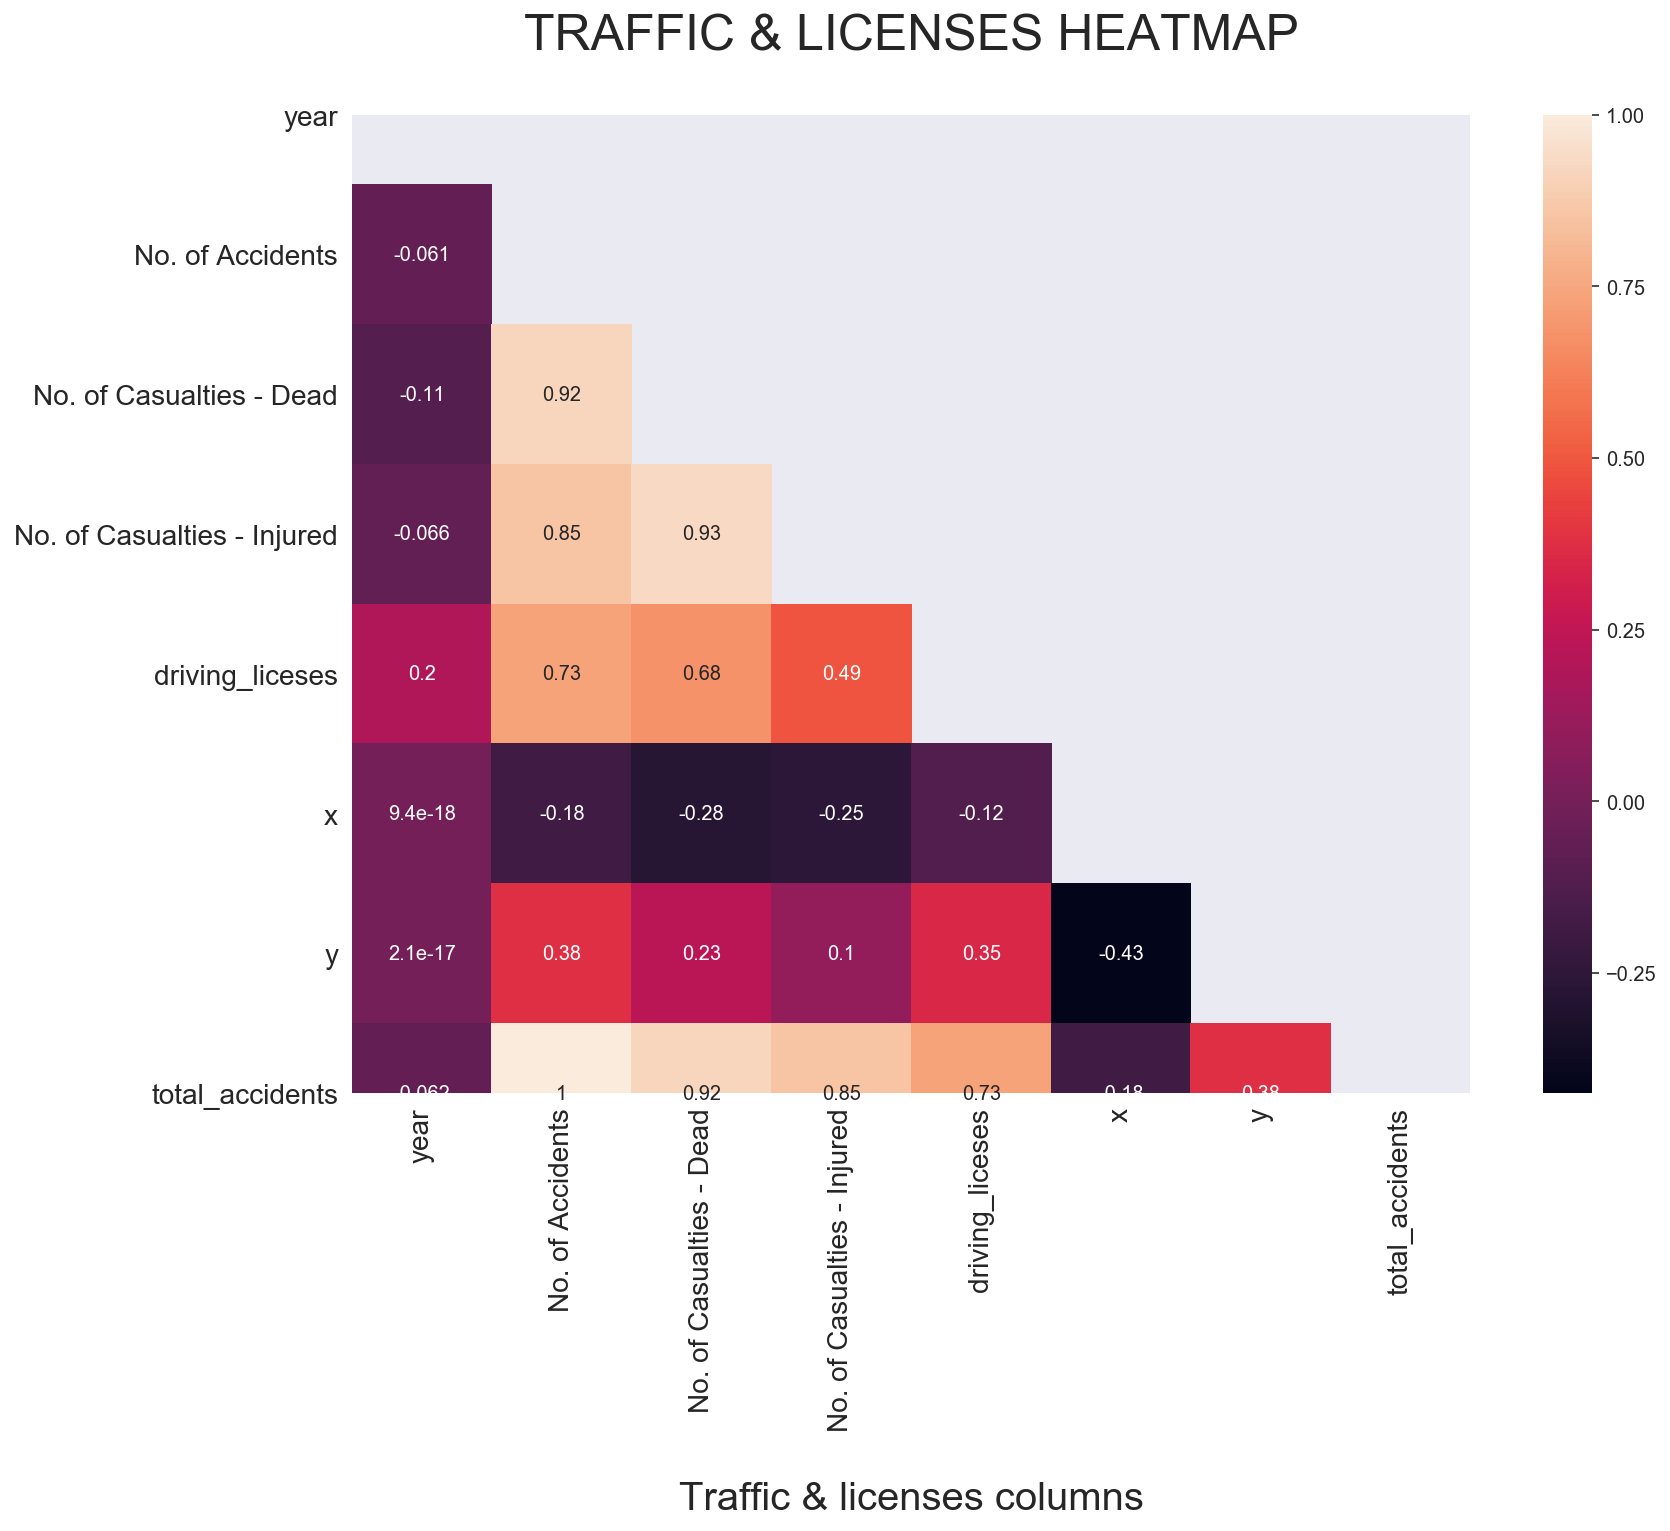

In [35]:
fig = plt.figure(figsize=(13,9))
ax = fig.gca()

mask = np.zeros_like(combined_dataframes.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(combined_dataframes.corr(), mask=mask, square=True,annot=True)

ax.set_title('TRAFFIC & LICENSES HEATMAP\n', fontsize=25)
ax.set_xlabel('\nTraffic & licenses columns', fontsize=20)
ax.set_xticklabels(combined_dataframes.corr().columns, fontsize = 14)
ax.set_yticklabels(combined_dataframes.corr().columns, fontsize = 14)

plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [36]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(7,3)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])

        ax[i].set_title(list_of_titles[i], fontsize=13)
        ax[i].set_xticklabels(range(0,list_of_xlabels))
        
                


#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

/Users/sarahaljudaibi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sarahaljudaibi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


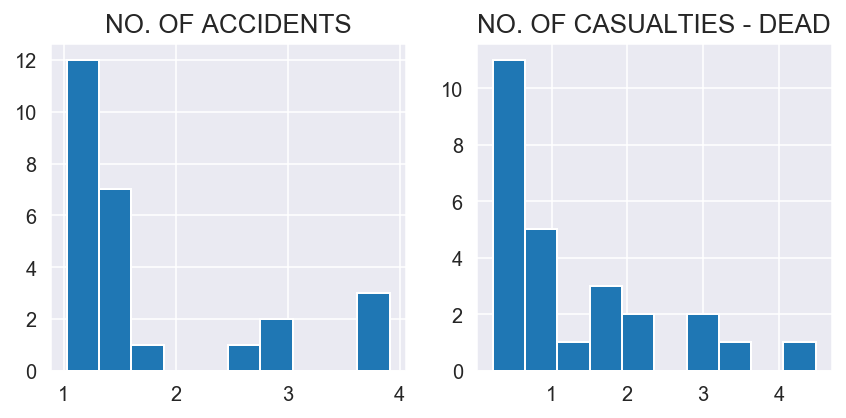

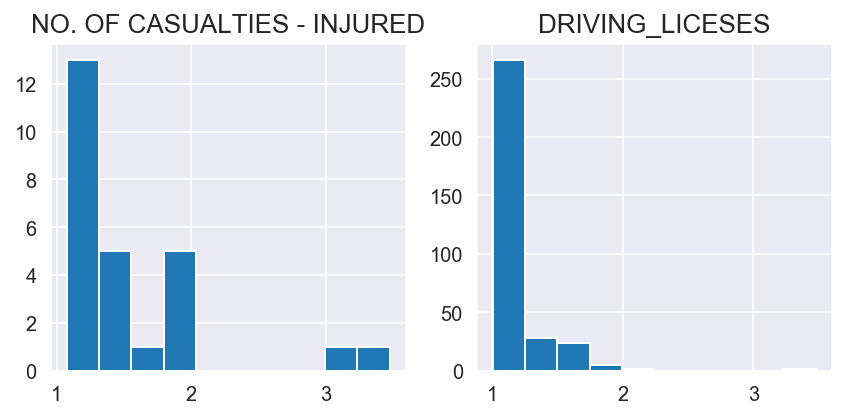

In [37]:
#comapare the driving licenses for both 2016 & 2017
#with traffic accidents of 2016 & 2017

subplot_histograms(combined_dataframes,list(combined_dataframes.iloc[:,2:4]),
                   list(combined_dataframes.iloc[:,2:4].columns.str.upper()),
                   len(combined_dataframes.iloc[:,2:4]))

subplot_histograms(combined_dataframes,list(combined_dataframes.iloc[:,4:6]),
                   list(combined_dataframes.iloc[:,4:6].columns.str.upper()),
                   len(combined_dataframes.iloc[:,4:6]))


#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [38]:
#function for scatter

def plot_scatter(dataframe,x,y,title):

    sns.lmplot( x=x, y=y, data=dataframe, fit_reg=False, hue='region', legend=True)
    plt.title(title,fontsize=15)



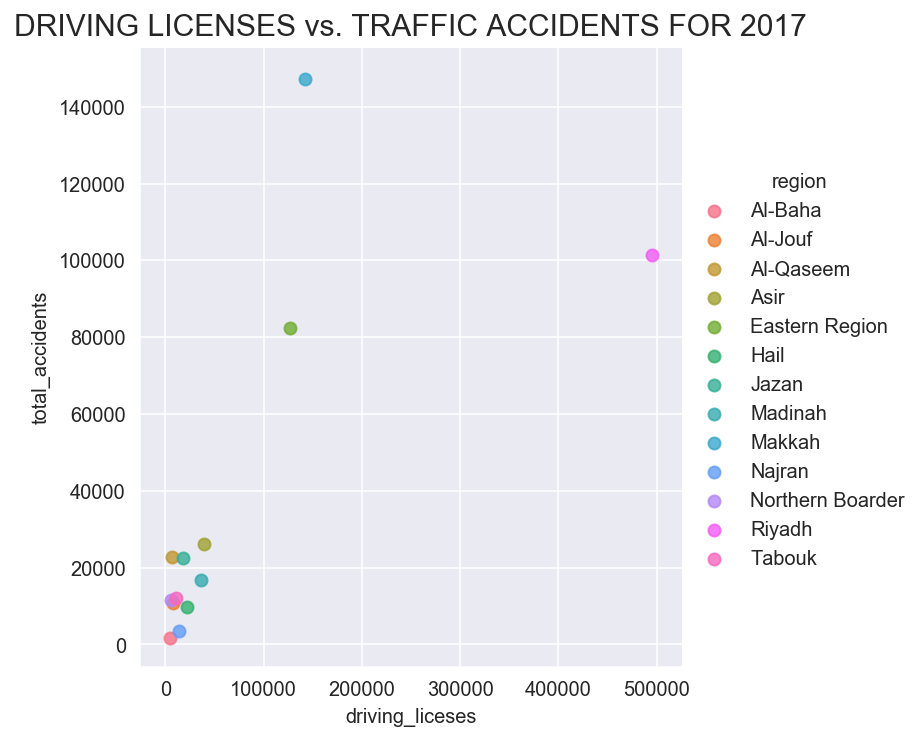

In [39]:
#using the query function we define above

regions_2017=query_years(combined_dataframes,'year==2017')

#call scatter function
plot_scatter(regions_2017,'driving_liceses','total_accidents','DRIVING LICENSES vs. TRAFFIC ACCIDENTS FOR 2017')



 - Makkah got around 147182 accidents in total while it got 142487 licenses issued that means the accident increase more than licenses with 3%
 - Eastern region got 82396 accidents in total while licenses got is 126816
 - Riyadh got 101324 accident in total while licenses got is 495307

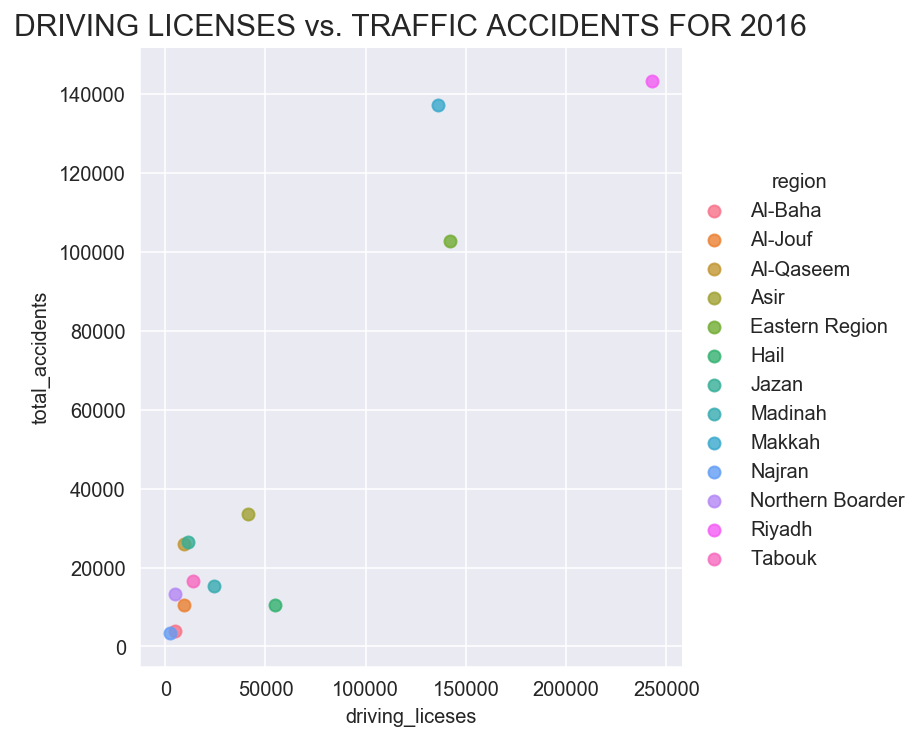

In [40]:
#using the query function we define above in Investigating

regions_2016=query_years(combined_dataframes,'year==2016')

#call scatter function
plot_scatter(regions_2016,'driving_liceses','total_accidents','DRIVING LICENSES vs. TRAFFIC ACCIDENTS FOR 2016')


# the higher the issued licenses the higher the accident
#eastern ,makkah than riyadh got the highest numbers in both traffic and accidents



 - Makkah got around 137081 accidents in total while it got 136055 licenses issued that means the accident increase more than licenses with .74%
 
 - Eastern region got 102732 accidents in total while licenses got is 142307
 
 - Riyadh got 143166 accident in total while licenses got is 242851
 

Text(0, 0.5, 'DRIVING LICENSES (2017)')

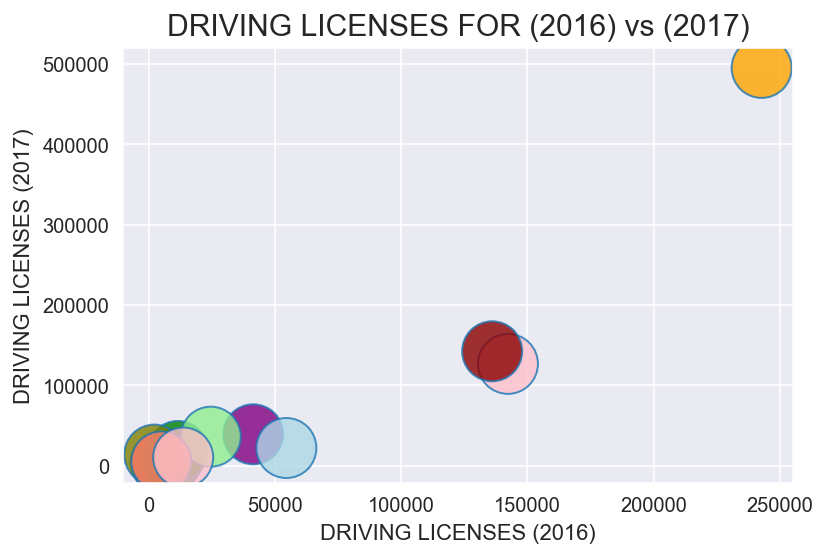

In [41]:
#select (2017-2017) from the merge dataframe
regions_2016_2017=combined_dataframes.iloc[0:26,:]

#seperate the dataframe into two
Lic_regions2016=regions_2016_2017.iloc[0:13,[1,5]]
Lic_regions2017=regions_2016_2017.iloc[13:,[5]]

#select color for each region
color=['red','blue','green','purple','pink','lightblue','green','lightgreen','darkred','olive','salmon','orange','pink']

#plot scatter
sns.regplot(x=Lic_regions2016['driving_liceses'], y=Lic_regions2017['driving_liceses'],
           scatter_kws={'facecolors':color,"s":900},fit_reg=False)

plt.title('DRIVING LICENSES FOR (2016) vs (2017)',fontsize=15)
plt.xlabel("DRIVING LICENSES (2016)",fontsize=11)
plt.ylabel("DRIVING LICENSES (2017)",fontsize=11)


 - an increase in Riyadh region it increase from 2016 (242851) to 2017 (495307)
 
 - an increase in Eastern region it decrease from 2016 (142307) to 2017 (126816)
  
 - an increase in Makkah region it increase from 2016 (136055) to 2017 (142487)
 

Text(0, 0.5, 'TRAFFIC ACCIDENTS (2017)')

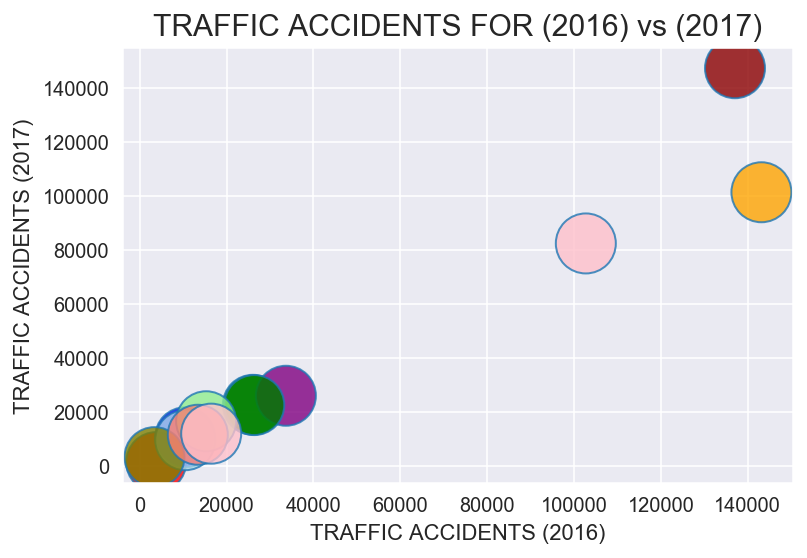

In [42]:
#seperate the traffic dataframe into two

Traffic_region2016=regions_2016_2017.iloc[0:13,[9]]
Traffic_region2017=regions_2016_2017.iloc[13:,[9]]

#select color for each region
color=['red','blue','green','purple','pink','lightblue','green','lightgreen','darkred','olive','salmon','orange','pink']

#plot scatter
sns.regplot(x=Traffic_region2016['total_accidents'], y=Traffic_region2017['total_accidents'],
           scatter_kws={'facecolors':color,"s":900},fit_reg=False)


plt.title('TRAFFIC ACCIDENTS FOR (2016) vs (2017)',fontsize=15)
plt.xlabel("TRAFFIC ACCIDENTS (2016)",fontsize=11)
plt.ylabel("TRAFFIC ACCIDENTS (2017)",fontsize=11)


 - an deccrease in Riyadh region it increase from 2016 (136055) to 2017 (101324)
 
 - an decncrease in Eastern region it decrease from 2016 (102732) to 2017 (82396)
  
 - an increase in Makkah region it increase from 2016 (137081) to 2017 (147182)
 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [43]:
from sklearn.preprocessing import StandardScaler
#standlize a copy from the original dataframe
combined_dataframes_stand=combined_dataframes.copy()

#select the columns we want to stanslize it
combined_dataframes_stand[['No. of Accidents', 'No. of Casualties - Dead','No. of Casualties - Injured',
                           'driving_liceses','total_accidents']] = StandardScaler().fit_transform(combined_dataframes_stand[['No. of Accidents', 'No. of Casualties - Dead','No. of Casualties - Injured',
                           'driving_liceses','total_accidents']])

combined_dataframes_stand.head()

year          region  No. of Accidents  No. of Casualties - Dead  \
0  2016         Al-Baha         -0.759093                 -0.835427   
1  2016         Al-Jouf         -0.614459                 -0.724132   
2  2016       Al-Qaseem         -0.275531                 -0.442184   
3  2016            Asir         -0.121553                  0.644799   
4  2016  Eastern Region          1.390484                  0.885938   

   No. of Casualties - Injured  driving_liceses                  geo_point_2d  \
0                    -0.528995        -0.513271  20.1484058503, 41.4665484892   
1                    -0.636117        -0.412798  29.9677445762, 39.5570371172   
2                    -0.429200        -0.416832  26.1967063704, 43.3429998455   
3                    -0.070498         0.262992   19.1387847401, 42.941470036   
4                     0.750191         2.394955  23.2883307307, 50.1478302439   

           x          y  total_accidents  
0  20.148406  41.466548        -0.760709  
1  29.967745  39.557037        -0.616327  
2  26.196706  43.343000        -0.277743  
3  19.138785  42.941470        -0.112704  
4  23.288331  50.147830         1.385905

Text(0.5, 1.0, 'ACCIDENTS & LICENSES BOXPLOT')

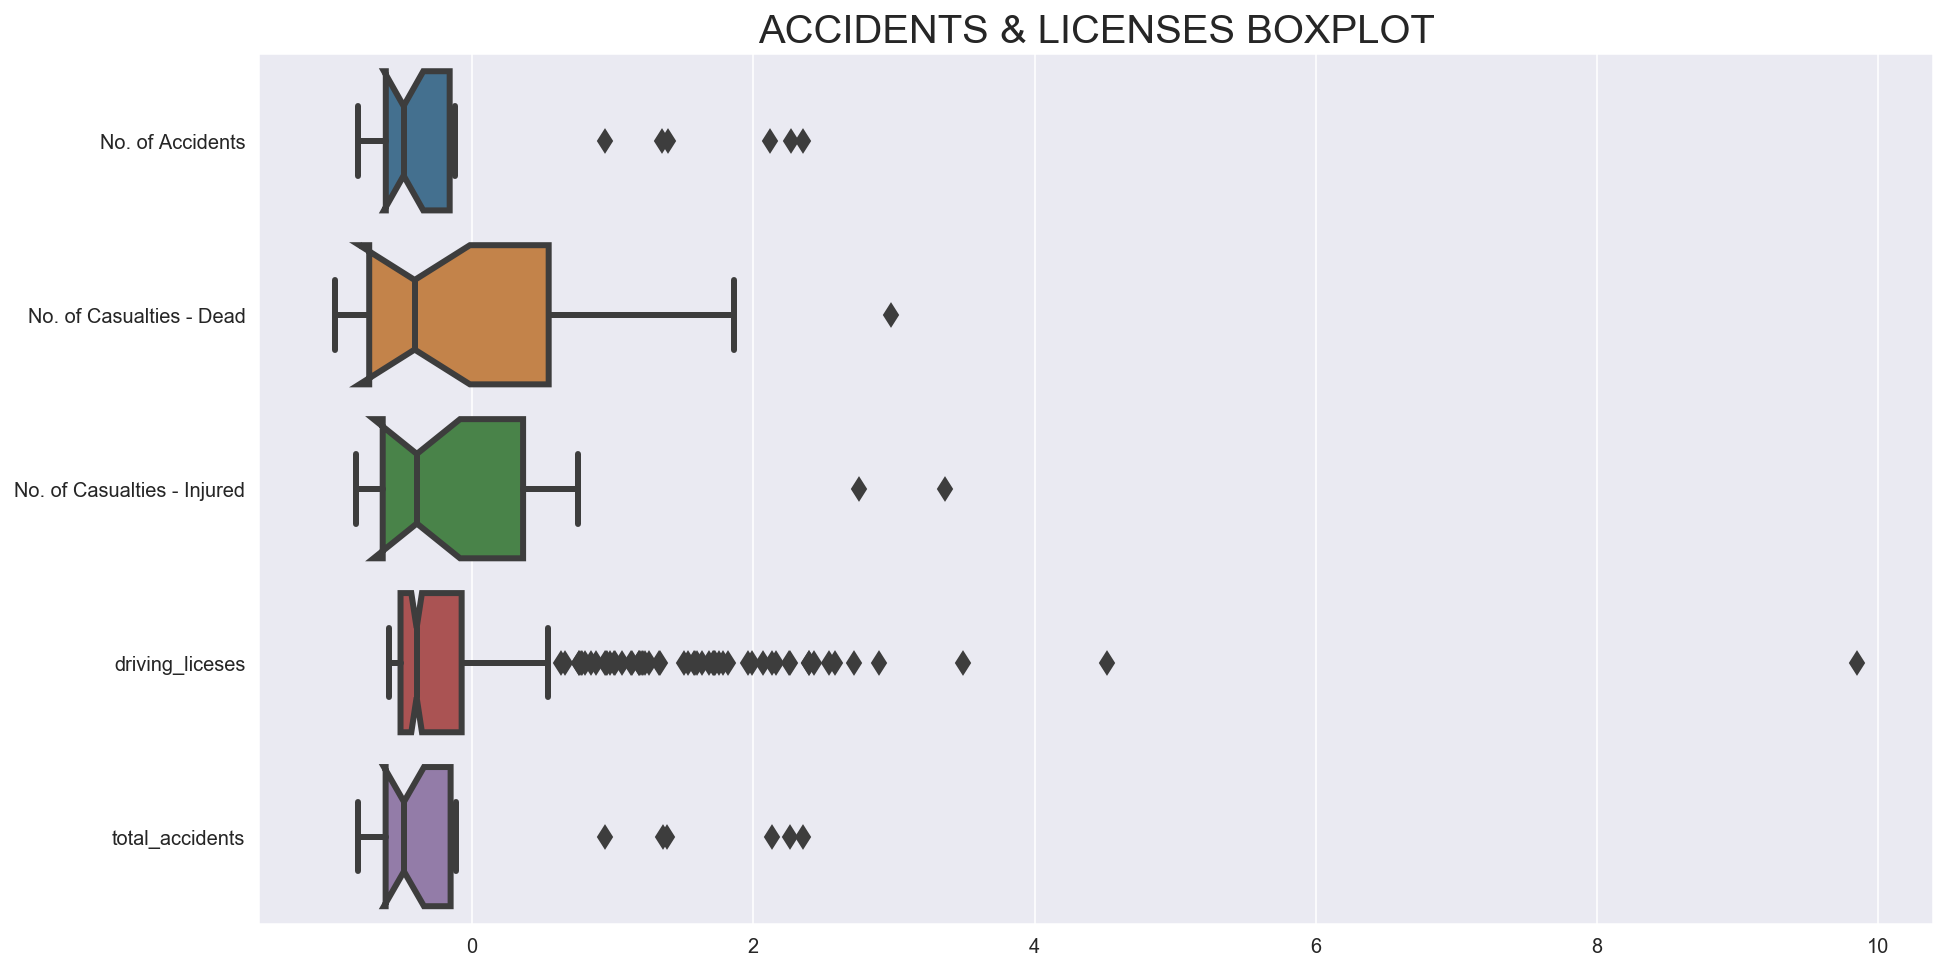

In [44]:
#function to create simple boxplot
def plot_boxplot(dataframe,orient):
    
    sns.boxplot(data=dataframe, orient=orient, fliersize=8, 
                 linewidth=3, notch=True, saturation=0.5,)

    #ceate figure    
fig,ax = plt.subplots(figsize=(15, 8))

#call the functions with 2 or 1 columns index
plot_boxplot(combined_dataframes_stand.iloc[:,[2,3,4,5,9]],'h')
ax.set_title('ACCIDENTS & LICENSES BOXPLOT',fontsize=20)




##### from the boxplots above I can see a lots of outliers in the five boxes especially  in ( LICENSES) got more alot outliers than the rest

#for example, the boxplot of driving licenses (1993-2017) the maximum variance is around 50000 but the outlier reach for 2017 to 500000

#another example in traffic accidents(2016-2017) you can see the max variance for 2016 is reaching to 39000 and the outlier is between 100000 & 120000

### Find the outliers from the dataframe using z score: [added by me]
    

In [45]:
#the red wrning box is because there are columns with a NaN values and the np see it as a False so I will hide the warning by useing this:
import warnings

warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#if you want to check make this cell a comment


In [46]:

#using Z-value to find outliers in four columns[No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_liceses]
#to find the regions with outliers
z = np.abs(stats.zscore(combined_dataframes.iloc[:,2:5]))

#print the locations of the outliers
#print(z)

#the outliears is the data from Riyadh,Eastern and Makkah regions
#removing the outliers means removing all the data of those cities

#I can conclude from this:Riyadh is the capital and it's has more population than other regions,
#the other regions are the next big region after Riyadh and alot of people moveing to the big cities to find a living there
#so it's normal to have bigger numbers in issued liceses and accidents

# those regions data are importand and we can't renove them ,but if going to find a solution for this
#situation we can seperate the dataframe based on regions size (big_region,small_region)

#delete all outliers in a new dataframe 
combined_dataframes_NO_ = combined_dataframes[(z < 3).any(axis=1)]
#print the shape of hte dataframe before and after removing outliers
print('the shape of the dataframe with outliers:',combined_dataframes.shape)
print('the shape of the dataframe without outliers:',combined_dataframes_NO_ .shape)


the shape of the dataframe with outliers: (325, 10)
the shape of the dataframe without outliers: (0, 10)


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0.5, 1.0, 'THE RATE OF THE ISSUED LICENSES FOR (2010-2017)\n')

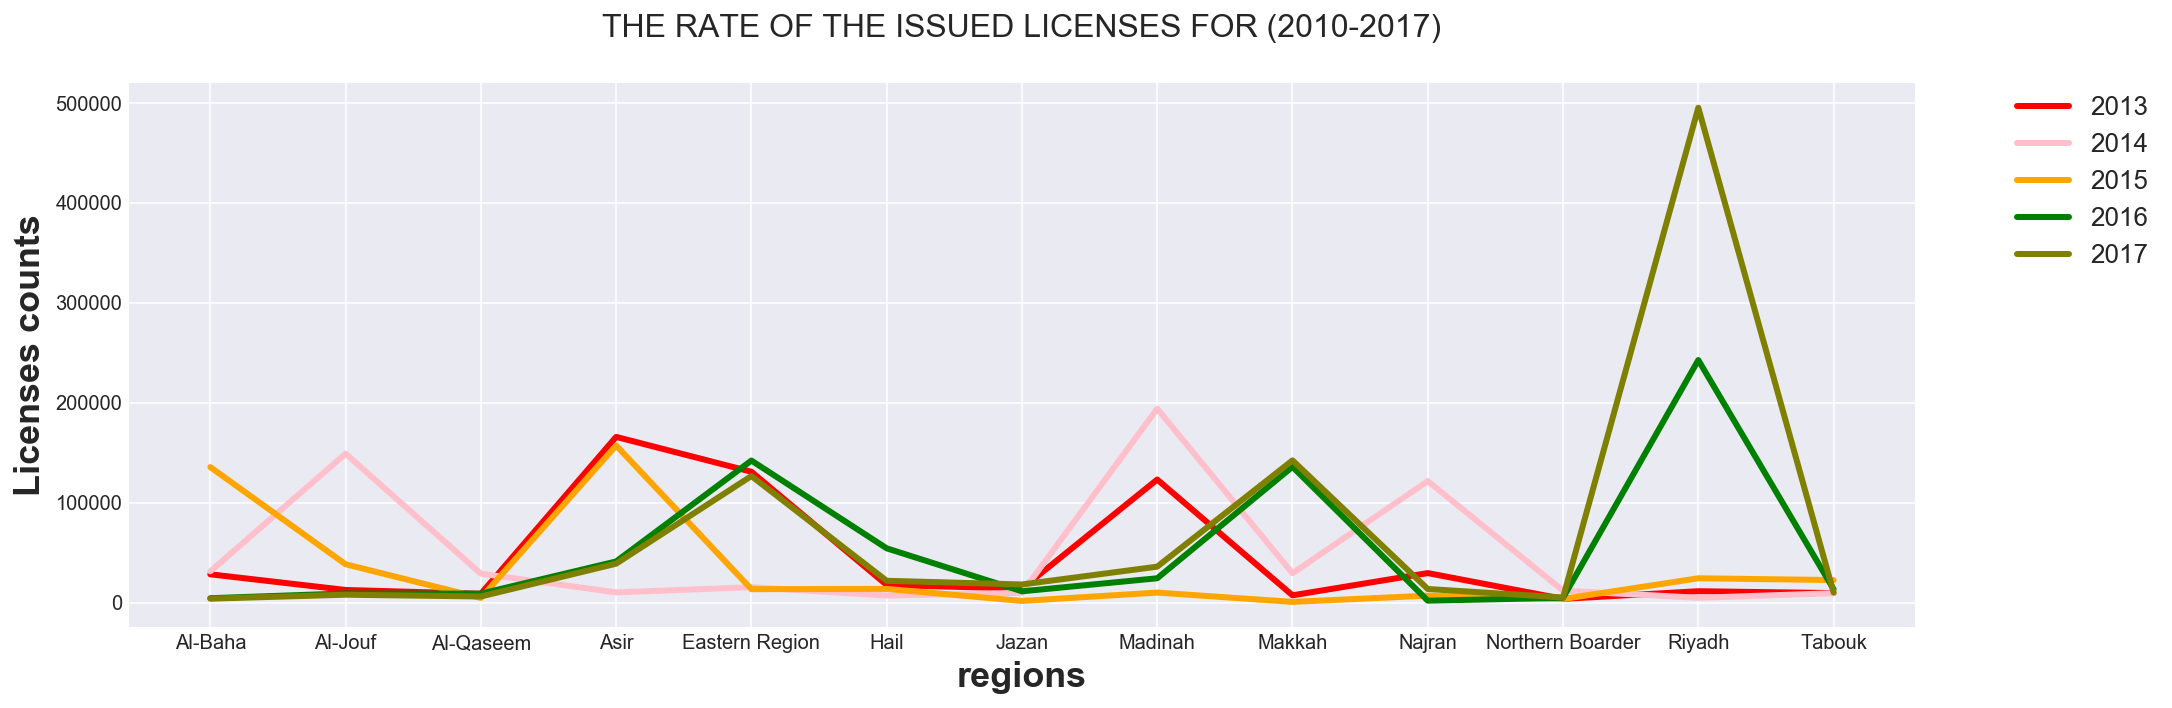

In [47]:
plt.figure(figsize=(16,5))
plt.style.use('seaborn-darkgrid')

#use the query year function to find each year and add it to it's variable

regions_2013=query_years(combined_dataframes,'year==2013')
regions_2014=query_years(combined_dataframes,'year==2014')
regions_2015=query_years(combined_dataframes,'year==2015')
regions_2016=query_years(combined_dataframes,'year==2016')
regions_2017=query_years(combined_dataframes,'year==2017')
quert_2016_sorted=quert_2016.sort_values(by='total_accidents', ascending=False)

#sort the dataframe by region and add it as an (x)
x=regions_2013['region'].sort_values(ascending=True).copy()

# multiple line plot for last 5 years
plt.plot( x, regions_2013['driving_liceses'],linestyle='-', markersize=12, color='red', linewidth=3,label='2013')
plt.plot( x, regions_2014['driving_liceses'],linestyle='-', markersize=12, color='pink', linewidth=3,label='2014')
plt.plot( x, regions_2015['driving_liceses'],linestyle='-', markersize=12, color='orange', linewidth=3,label='2015')
plt.plot( x, regions_2016['driving_liceses'],linestyle='-', markersize=12, color='green', linewidth=3,label='2016')
plt.plot( x, regions_2017['driving_liceses'],linestyle='-', markersize=12, color='olive', linewidth=3,label='2017')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=13)
plt.xlabel('regions', fontsize=18,fontweight='bold')
plt.ylabel('Licenses counts', fontsize=18,fontweight='bold')
plt.title("THE RATE OF THE ISSUED LICENSES FOR (2010-2017)\n",fontsize=16)

#plot for the three region from 1993 to 2017 to see the up and down in accidents


 - some regions like: Aljouf,Asir and Almadinah showed an decreased in a number of issued liceses in the past two years. 

 - While some regions like: Riyadh Makkah showed an increase in the past 2 years, in Riyadh the numbers in 2017 increase the double of the last year
 
 - Eastern region raise in a constant way
 

Text(0.5, 1.0, 'THE RATE OF ACCIDENTS FOR (2016-2017)\n')

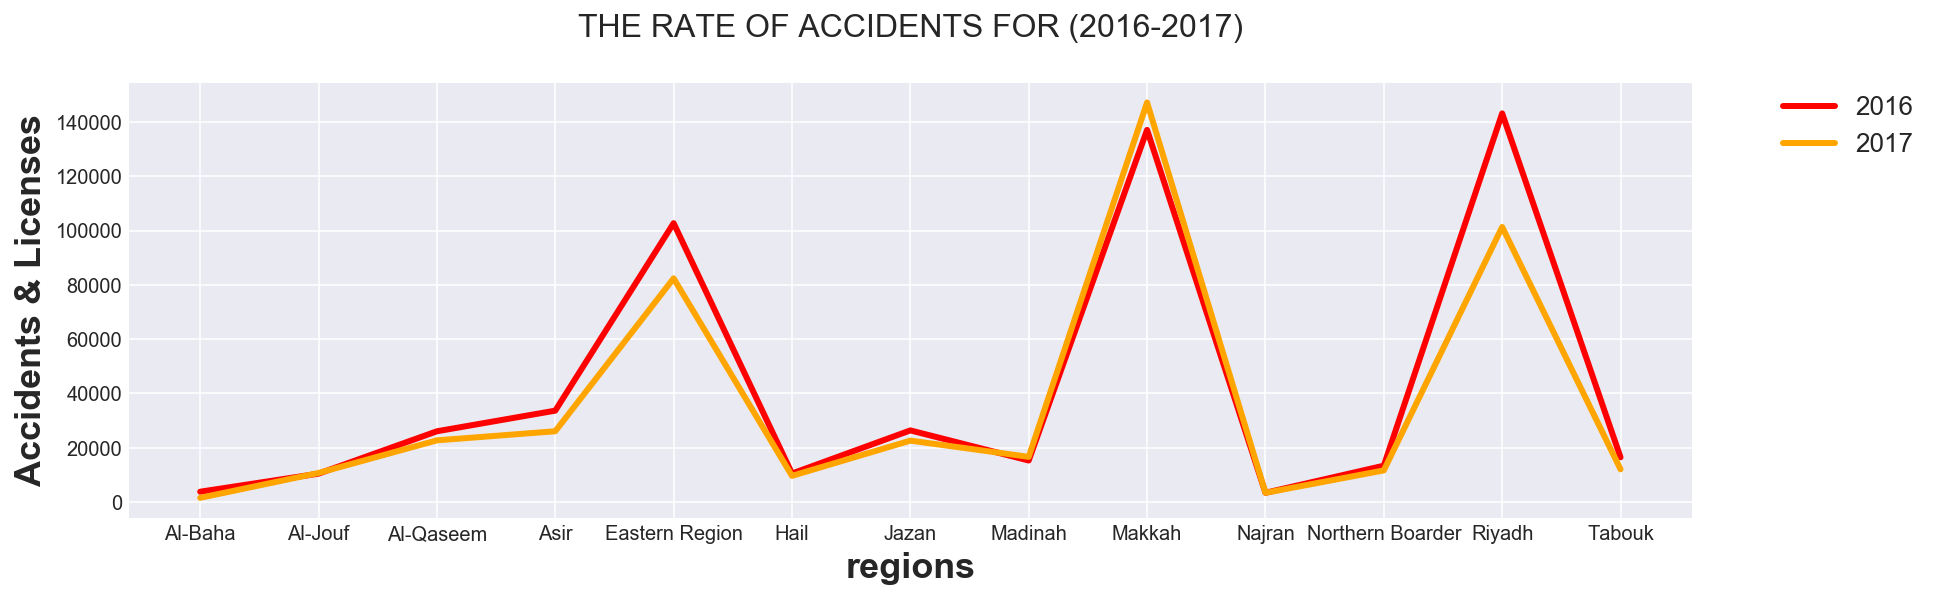

In [48]:
regions_2016_2017
plt.figure(figsize=(14,4))

plt.plot( x, regions_2016['total_accidents'],linestyle='-', markersize=12, color='red', linewidth=3,label='2016')
plt.plot( x, regions_2017['total_accidents'],linestyle='-', markersize=12, color='orange', linewidth=3,label='2017')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=13)
plt.xlabel('regions', fontsize=18,fontweight='bold')
plt.ylabel('Accidents & Licenses', fontsize=18,fontweight='bold')
plt.title("THE RATE OF ACCIDENTS FOR (2016-2017)\n",fontsize=16)


 - Eastern region got an amazing score as the accidents number decrease in 2017 from before.

 - Riyadh the same, got a decrease in accidents rate more than the year before

 - Makkah got slightly a higher accidents rate

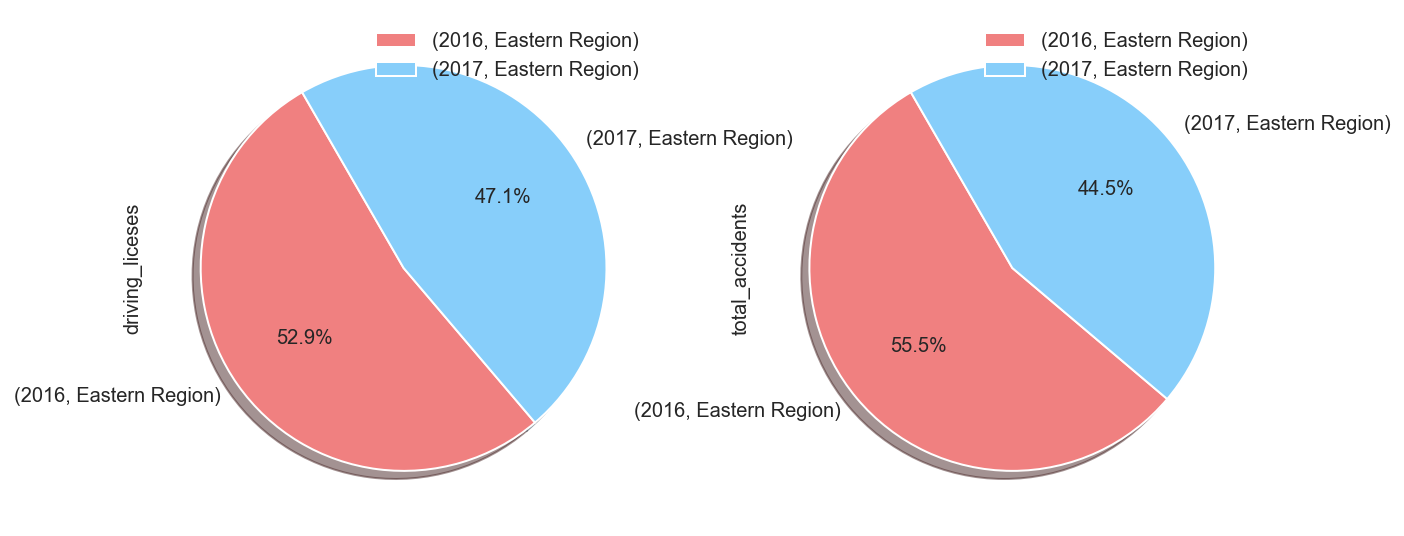

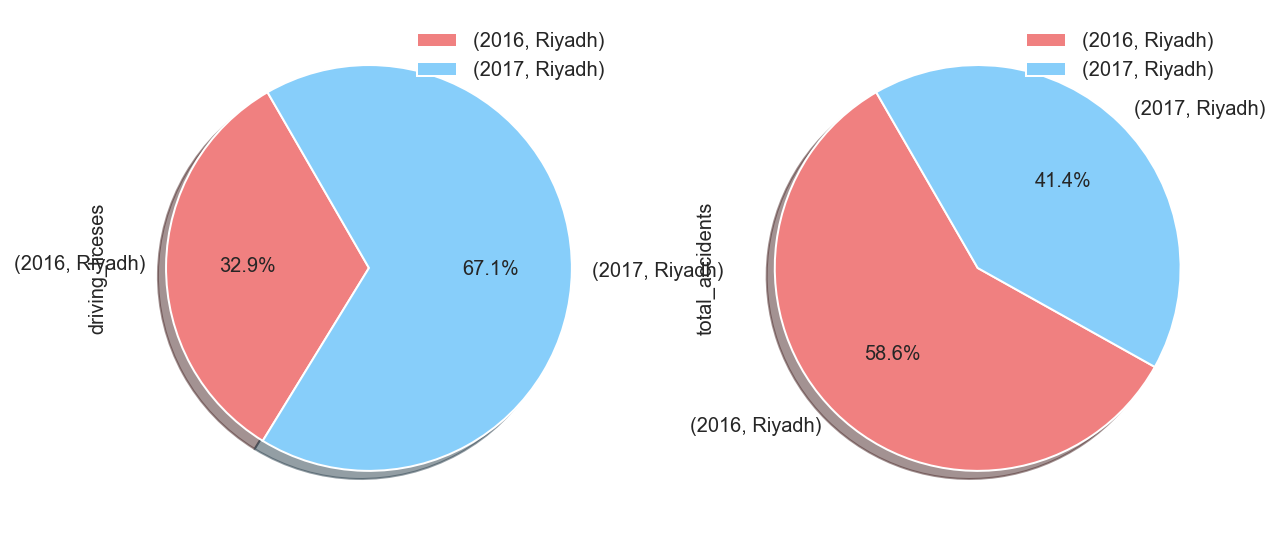

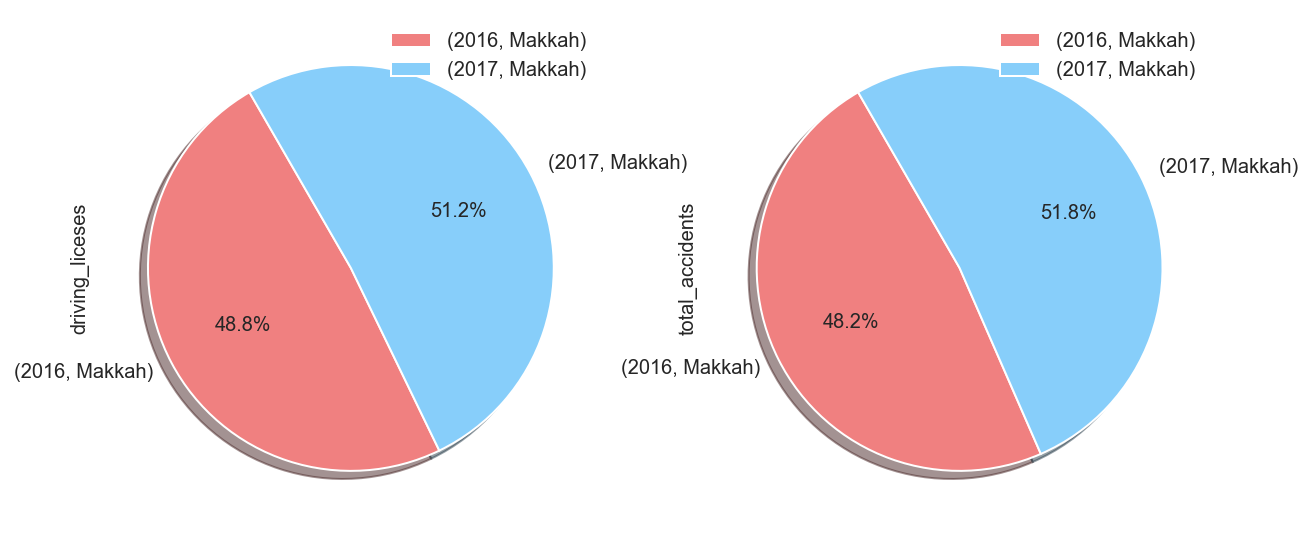

In [49]:
colors = [ 'lightcoral', 'lightskyblue']
  # explode 1st slice
r=regions_2016_2017.groupby(['year','region'])[['driving_liceses','total_accidents']].agg('sum')
# r=regions_2016_2017[['year','region','driving_liceses','total_accidents']]
r.iloc[[4,17],[0,1]].plot.pie(subplots=True, figsize=(10, 5),
     colors=colors,autopct='%1.1f%%', shadow=True,legend=True, startangle=120)

r.iloc[[11,24],[0,1]].plot.pie(subplots=True, figsize=(10, 5),
     colors=colors,autopct='%1.1f%%', shadow=True,legend=True, startangle=120)

r.iloc[[8,21],[0,1]].plot.pie(subplots=True, figsize=(10, 5),
     colors=colors,autopct='%1.1f%%', shadow=True,legend=True, startangle=120)

plt.show()


 - Eastern region decrease in driving liceses 5% and also the accidents rate 11% compareing than before

 - Riyadh increased in driving licenses with 35% but the accident decress with a percentage of 17%


 - Makkah increase in driving licenses with 2%, the same percentage in accidents



## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [50]:
#let's do statistics again to see

#exclude the region column because it's a string
mean=np.mean(combined_dataframes)
median=combined_dataframes.median()
mode=stats.mode(combined_dataframes)
display(combined_dataframes.describe())

# print('\n\n\t##the mode##\n\n',mode)

print(mean[1])
print(median[1])
print(mode)

#through observation we can guess it's a positive skew since
#mode < median < mean

year  No. of Accidents  No. of Casualties - Dead  \
count   325.000000         26.000000                 26.000000   
mean   2005.000000      38225.692308                635.384615   
std       7.222222      46493.705035                549.783381   
min    1993.000000       1414.000000                112.000000   
25%    1999.000000      10276.250000                241.250000   
50%    2005.000000      16050.500000                415.500000   
75%    2011.000000      30981.250000                929.250000   
max    2017.000000     145541.000000               2243.000000   

       No. of Casualties - Injured  driving_liceses           x           y  \
count                    26.000000       325.000000  325.000000  325.000000   
mean                   2743.038462     28915.347692   23.810447   42.602789   
std                    2922.641127     47419.058819    4.197987    3.254196   
min                     374.000000       915.000000   17.207231   37.259858   
25%                     923.000000      4846.000000   20.148406   41.263690   
50%                    1618.500000     10267.000000   23.288331   41.817119   
75%                    3784.000000     25423.000000   27.400846   43.343000   
max                   12383.000000    495307.000000   30.197075   50.147830   

       total_accidents  
count        26.000000  
mean      38861.076923  
std       46998.760314  
min        1548.000000  
25%       10550.750000  
50%       16557.500000  
75%       31847.000000  
max      147182.000000

38225.692307692305
16050.5
ModeResult(mode=array([[1993, 'Al-Baha', 3618.0, 185.0, 1227.0, 915,
        '17.2072313962, 42.6525807422', 17.207231396199997,
        37.2598581394, 3803.0]], dtype=object), count=array([[13, 25,  1,  1,  1,  1, 25, 25, 25,  1]]))


In [51]:
def subplot_skew(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        da=pd.DataFrame()
        da[column]=dataframe[column].dropna()
        skewness=stats.skew(da[column])
        print('\t##the skewness for',column,'columns##\n\t\t',skewness,"\n")
        ax[i].hist(dataframe[column],bins=30, edgecolor='skyblue')

        ax[i].set_title(list_of_titles[i], fontsize=13)
        ax[i].set_xticklabels(range(0,list_of_xlabels))



	##the skewness for No. of Accidents columns##
		 1.3993056034954132 

	##the skewness for No. of Casualties - Dead columns##
		 1.3236238146678647 

	##the skewness for No. of Casualties - Injured columns##
		 2.167713448533506 

	##the skewness for driving_liceses columns##
		 4.157901976472067 

	##the skewness for total_accidents columns##
		 1.3976245943012537 



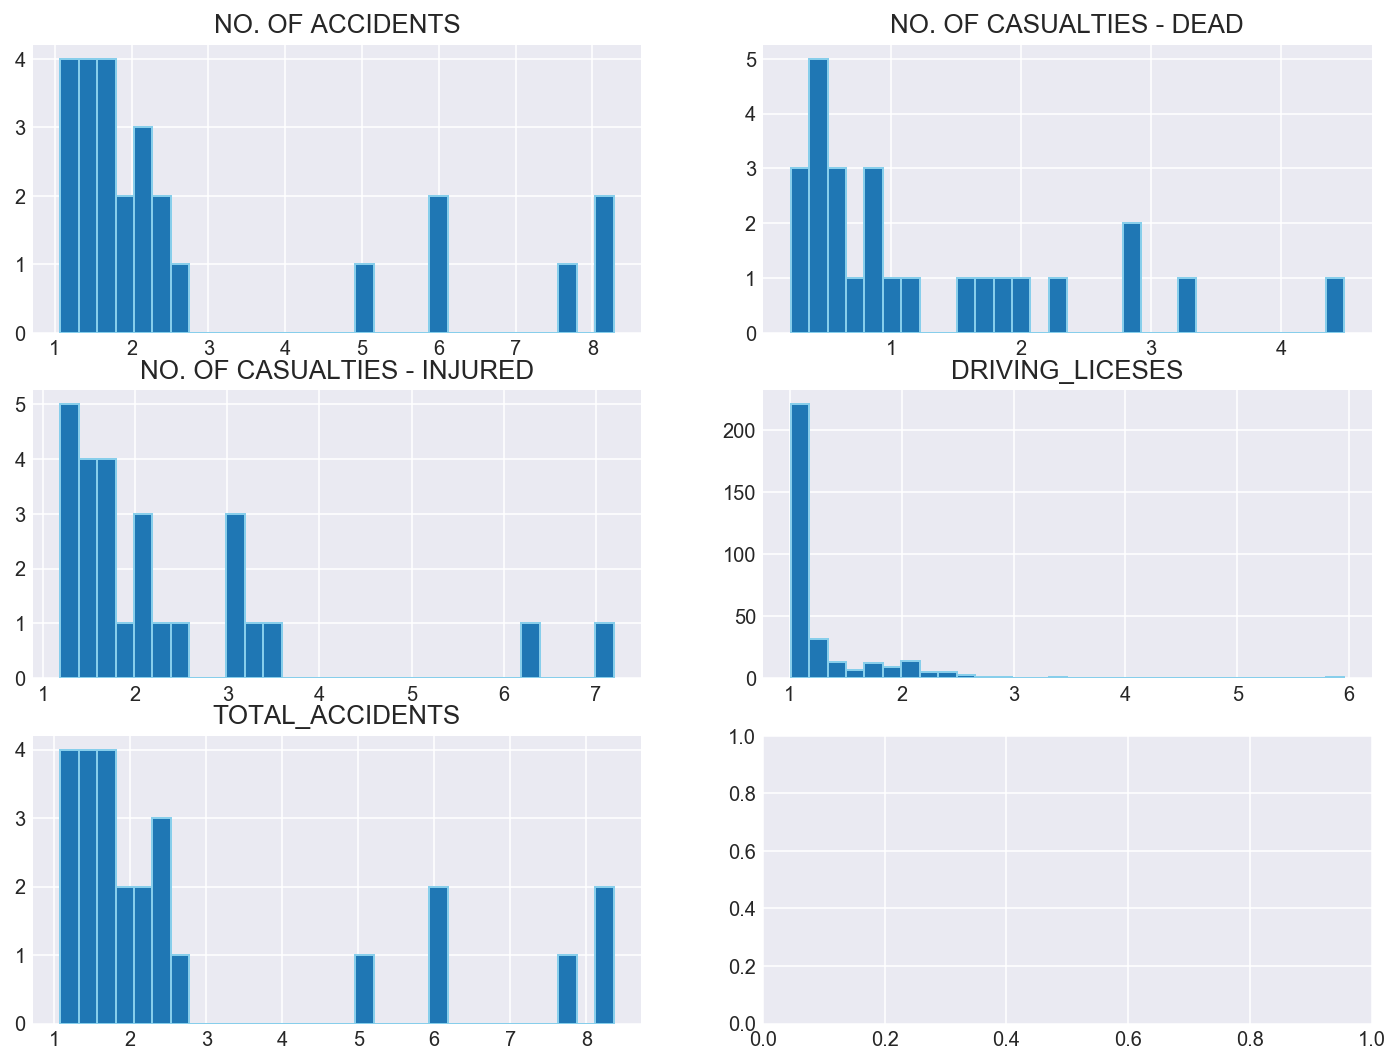

In [52]:
#let's check Skewness for each variable

subplot_skew(combined_dataframes,list(combined_dataframes.iloc[:,[2,3,4,5,9]]),
                   list(combined_dataframes.iloc[:,[2,3,4,5,9]].columns.str.upper()),
                   len(combined_dataframes.iloc[:,[2,3,4,5,9]]))



 - from the result we see all the variable have a positive skew

 - Negative skewness is observed in distributions with outliers less than the mean, 
 - Positive skewness is observed when there are outliers greater than the mean.
 - Significant skewness indicate that the mean and standard deviation are not good measures of the distribution.



   - we can see from the plot there are some outliers which come from Big regions accidents and licenses number 

   - one of the solution is to seperate the dataset into two: one with small regions and one with big regions to avoid outliers

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:


the distribution for accidents in all years



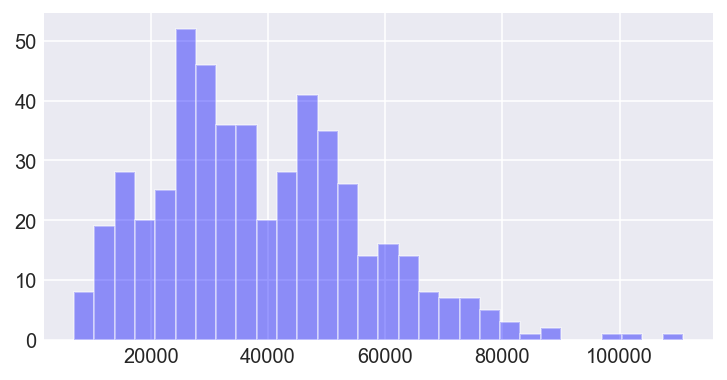


the distribution for issued licenses in all years



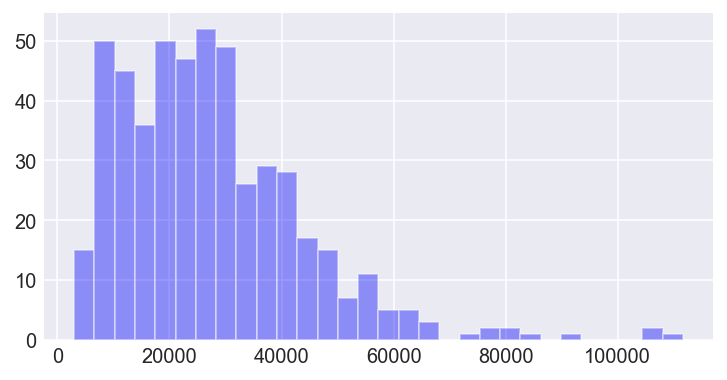

In [53]:
#function to take random sample from the dataframe
def sampling (population, n, k) :
# drop rows with NaN values    
    population=population.dropna()
    sampling_means = []
    
    #take random samples from te dataframe
    for i in range(k) :
        sample = np.random.choice(population, size =n, replace=True)
        sampling_means.append(np.mean(sample))
    
    return sampling_means

#function to take the random sample and plot it 
def dist_plotter(sample,bins=30,kde=False):
    fig, ax = plt.subplots(figsize=(6,3))
    
    sns.distplot(sample, bins=bins, kde=kde,color='blue')
    plt.show()
    
print("\nthe distribution for accidents in all years\n")

#take 7 sample from the population and repeate it 500 times
sample1_accidents = sampling(combined_dataframes['total_accidents'], n =7, k=500)
dist_plotter(sample1_accidents)

print("\nthe distribution for issued licenses in all years\n")
sample2_licenses = sampling(combined_dataframes['driving_liceses'], n =7, k=500)
dist_plotter(sample2_licenses)


Does This Assumption Hold for:
    - Driving Licenses: 
    - Traffic Accidents:
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
    - Driving Licenses: No it's not normally distrubed,it's even prove more it's positive distrubution 
    - Traffic Accidents:  No it's not normally distrubed,it's even prove more it's positive distrubution 
    
Explain your answers for each distribution and how you think this will affect estimates made:

because most of the data is bigger than zero(means all values is positive). It's positive distrubution. this case can affect our result and sometimes give us misleading information. if in some cases if we got the correct answers, some efficiency can be lost, means we didn't use the provided data in the dataset

<blockquote>many of the most common statistical methods require at least an approximately normal distribution - ractical Business Statistics(Seventh Edition)</blockquote>


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [54]:
#using z-[score] on data

# the z score I calculate it above was to get the outliers and remove it from dataframe
#here how many z scores are above/down the mean 

zScore_traffic = np.abs(stats.zscore(sample1_accidents))
zscore_above=0
zscore_down=0

#print the z score
#print(z)

for element in zScore_traffic:
     if element>0:
            #print("z score is above the mean")
            zscore_above+=element
     else:
            #print("z score is down the mean")
            zscore_down+=element

print('the number of traffics samples got z score above the mean:',zscore_above)
print('the number of traffics samples got z score down the mean:',zscore_down)


#using z-[score] on sample2_licenses sample
zScore_traffic = np.abs(stats.zscore(sample2_licenses))
zscore_above=0
zscore_down=0
#print the z score
#print(z)
for element in zScore_traffic:
     if element>0:
            #print("z score is above the mean")
            zscore_above+=element
     else:
            #print("z score is down the mean")
            zscore_down+=element

print('the number of licenses samples got z score above the mean:',zscore_above)
print('the number of licenses samples got z score down the mean:',zscore_down)


the number of traffics samples got z score above the mean: 407.59884882772985
the number of traffics samples got z score down the mean: 0
the number of licenses samples got z score above the mean: 375.8934881014702
the number of licenses samples got z score down the mean: 0


--------------------------------------

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [55]:
#Riyadh, Makkah ,Eastern regions 

#add two addition tables for more deteils of the accidents
accidents2017_detials=pd.read_csv('../data/traffic-accident-statistics-as-of-1438-h.csv')


In [56]:
#the new data
accidents2016_detials=pd.read_csv('../data/traffic-accident-statistics-as-of-1437-h.csv')

#list of columns name
columns_name__2016_2017=['month','destroy_accidents','injured_accidents','death_accidents','total_accidents',
              'sat','sun','mon','tue','wen','thu','fri','total_days_accid','day','night',
              'total_accidents_time','inside_city','outside_city','total_accidents_place',
              'small_car','jeap_car','bus_car','big_cars','transfer_car','water_car','other_cars',
              'total_cars','age_(-18)','age_(+18)','age_(+30)','age_(+40)','age_(+50)',
                'total_age','nationalty_saudi','nationalty_resident','total_nationalty','married',
                   'single','total_state','education','non_eduction',
                   'total_edcation','lincese_type1','lincese_type2','lincese_type3','lincese_type4',
                   'non_lincese_type1','total_licenses_type','no_driving_licenses','licenses',
              'licenses_end','total_licenses','cars_crash','object_crash','runover_person','runover_animal',
              'fire','cars_flip','road_exit','other_kind_accidents','total_kind','oppose_stop',
              'oppose_rotation','oppose_bypass','cut_sign','speed_Exceed','under_drugs','other_reason',
             'total_reason','injured','dead','not_injured','total_people']

#change columns name
accidents2016_detials.columns=columns_name__2016_2017

#drop unwanted columns
accidents2016_detials.drop(['education','non_eduction','total_edcation','lincese_type1','lincese_type2',
                             'lincese_type3','lincese_type4','non_lincese_type1','total_licenses_type'],axis=1,inplace=True)




In [57]:

accidents2017_detials.head(15)
#change the columns name from arabic to english


accidents2017_detials.columns=columns_name__2016_2017

#drop unwanted columns
accidents2017_detials.drop(['education','non_eduction','total_edcation','lincese_type1','lincese_type2',
                             'lincese_type3','lincese_type4','non_lincese_type1','total_licenses_type'],axis=1,inplace=True)



In [58]:
#replace arabic month names with english
accidents2017_detials["month"].replace({"محرم": "muharam", "صفر": "safer",
    "ربيع أول": "rabie 1","ربيع ثانى": "rabie 2","جمادى أول": "jumada 1",
    "جمادى ثانى": "jumada 2","رجب": "rajeb","شعبان": "shabaan",
     "رمضان": "ramadan","شوال": "shawal","ذى القعدة": "du qaida","ذى الحجة": "du hija","المجموع":"total" }, inplace=True)

accidents2016_detials["month"].replace({"محرم": "muharam", "صفر": "safer",
    "ربيع أول": "rabie 1","ربيع ثانى": "rabie 2","جمادى أول": "jumada 1",
    "جمادى ثانى": "jumada 2","رجب": "rajeb","شعبان": "shabaan",
     "رمضان": "ramadan","شوال": "shawal","ذى القعدة": "du qaida","ذى الحجة": "du hija","المجموع":"total" }, inplace=True)



In [59]:
display(accidents2016_detials.head())
display(accidents2017_detials.head())

accidents2016_detials.dtypes

month  destroy_accidents  injured_accidents  death_accidents  \
0   muharam             4405.0              119.0             55.0   
1     safer             4473.0              111.0             60.0   
2   rabie 1             4628.0               96.0             64.0   
3   rabie 2             4647.0              111.0             83.0   
4  jumada 1             4419.0               81.0             52.0   

   total_accidents    sat    sun    mon    tue    wen    thu    fri  \
0           4579.0  650.0  637.0  616.0  626.0  705.0  679.0  666.0   
1           4644.0  648.0  647.0  655.0  655.0  659.0  692.0  688.0   
2           4788.0  838.0  672.0  632.0  614.0  659.0  672.0  701.0   
3           4841.0  628.0  652.0  778.0  784.0  648.0  692.0  659.0   
4           4552.0  641.0  634.0  639.0  640.0  636.0  680.0  682.0   

   total_days_accid     day   night  total_accidents_time  inside_city  \
0            4579.0  2953.0  1626.0                4579.0       3214.0   
1            4644.0  2572.0  2072.0                4644.0       3009.0   
2            4788.0  3019.0  1769.0                4788.0       3499.0   
3            4841.0  3153.0  1688.0                4841.0       3517.0   
4            4552.0  2379.0  2173.0                4552.0       2378.0   

   outside_city  total_accidents_place  small_car  jeap_car  bus_car  \
0        1365.0                 4579.0     3844.0    1827.0    310.0   
1        1635.0                 4644.0     3424.0    1444.0    298.0   
2        1289.0                 4788.0     3694.0    1387.0    224.0   
3        1324.0                 4841.0     3305.0    1694.0    132.0   
4        2174.0                 4552.0     3526.0    2399.0    129.0   

   big_cars  transfer_car  water_car  other_cars  total_cars  age_(-18)  \
0    1796.0         399.0      208.0        41.0      8425.0      364.0   
1    2583.0         598.0      311.0       142.0      8800.0      320.0   
2    3001.0         442.0      138.0       131.0      9017.0      299.0   
3    2801.0         524.0       76.0        56.0      8588.0      290.0   
4    1826.0         314.0      177.0        43.0      8414.0      300.0   

   age_(+18)  age_(+30)  age_(+40)  age_(+50)  total_age  nationalty_saudi  \
0     2179.0     3220.0     2297.0      332.0     8392.0            5346.0   
1     2854.0     2227.0     2059.0     1191.0     8651.0            5943.0   
2     3004.0     2893.0     1755.0      995.0     8946.0            6402.0   
3     3345.0     2694.0     1543.0      592.0     8464.0            5703.0   
4     2152.0     3224.0     2429.0      309.0     8414.0            5169.0   

   nationalty_resident  total_nationalty  married  single  total_state  \
0               3046.0            8392.0   3849.0  4543.0       8392.0   
1               2708.0            8651.0   5831.0  2820.0       8651.0   
2               2544.0            8946.0   4643.0  4303.0       8946.0   
3               2761.0            8464.0   4804.0  3660.0       8464.0   
4               3245.0            8414.0   5300.0  3114.0       8414.0   

   no_driving_licenses  licenses  licenses_end  total_licenses  cars_crash  \
0                215.0    7904.0         273.0          8392.0      4229.0   
1                242.0    7975.0         434.0          8651.0      4197.0   
2                273.0    8074.0         599.0          8946.0      4204.0   
3                221.0    7687.0         556.0          8464.0      4526.0   
4                216.0    7569.0         629.0          8414.0      4445.0   

   object_crash  runover_person  runover_animal  fire  cars_flip  road_exit  \
0          79.0            37.0             3.0   0.0       43.0      113.0   
1         161.0            48.0             2.0   2.0       40.0      117.0   
2          88.0            27.0             4.0   0.0       71.0      203.0   
3          27.0            50.0             0.0   0.0       37.0      167.0   
4          12.0            40.0             1.0   1

month  destroy_accidents  injured_accidents  death_accidents  \
0   muharam              883.0              204.0             37.0   
1     safer              939.0              193.0             34.0   
2   rabie 1             1061.0              264.0             40.0   
3   rabie 2             1148.0              287.0             34.0   
4  jumada 1             1111.0              274.0             26.0   

   total_accidents    sat    sun    mon    tue    wen    thu    fri  \
0           1124.0  165.0  179.0  161.0  147.0  176.0  130.0  166.0   
1           1166.0  152.0  154.0  173.0  151.0  201.0  177.0  158.0   
2           1365.0  193.0  179.0  187.0  203.0  243.0  172.0  188.0   
3           1469.0  172.0  227.0  193.0  195.0  213.0  266.0  203.0   
4           1411.0  219.0  191.0  168.0  191.0  215.0  187.0  240.0   

   total_days_accid    day  night  total_accidents_time  inside_city  \
0            1124.0  619.0  505.0                1124.0        504.0   
1            1166.0  655.0  511.0                1166.0        471.0   
2            1365.0  795.0  570.0                1365.0        633.0   
3            1469.0  800.0  669.0                1469.0        819.0   
4            1411.0  859.0  552.0                1411.0        707.0   

   outside_city  total_accidents_place  small_car  jeap_car  bus_car  \
0         620.0                 1124.0      822.0     244.0      0.0   
1         695.0                 1166.0      835.0     224.0      6.0   
2         732.0                 1365.0     1137.0     246.0      4.0   
3         650.0                 1469.0     1511.0     321.0      8.0   
4         704.0                 1411.0     1312.0     314.0     19.0   

   big_cars  transfer_car  water_car  other_cars  total_cars  age_(-18)  \
0     290.0         134.0       39.0        26.0      1555.0      193.0   
1     302.0         120.0       36.0        32.0      1555.0      217.0   
2     361.0         124.0       36.0        35.0      1943.0      267.0   
3     421.0         136.0       31.0        11.0      2439.0      352.0   
4     407.0         161.0       20.0        21.0      2254.0      281.0   

   age_(+18)  age_(+30)  age_(+40)  age_(+50)  total_age  nationalty_saudi  \
0      535.0      472.0      218.0      137.0     1555.0            1069.0   
1      517.0      392.0      258.0      171.0     1555.0            1070.0   
2      557.0      602.0      305.0      212.0     1943.0            1421.0   
3      721.0      798.0      425.0      143.0     2439.0            1696.0   
4      681.0      749.0      357.0      186.0     2254.0            1563.0   

   nationalty_resident  total_nationalty  married  single  total_state  \
0                486.0            1555.0   1148.0   407.0       1555.0   
1                485.0            1555.0   1017.0   538.0       1555.0   
2                522.0            1943.0   1426.0   517.0       1943.0   
3                743.0            2439.0   1814.0   625.0       2439.0   
4                691.0            2254.0   1657.0   597.0       2254.0   

   no_driving_licenses  licenses  licenses_end  total_licenses  cars_crash  \
0                119.0    1385.0          51.0          1555.0       609.0   
1                100.0    1365.0          90.0          1555.0       611.0   
2                109.0    1664.0         170.0          1943.0       777.0   
3                168.0    1982.0         289.0          2439.0      1054.0   
4                200.0    1769.0         285.0          2254.0      1010.0   

   object_crash  runover_person  runover_animal  fire  cars_flip  road_exit  \
0         108.0            35.0            24.0   1.0      184.0      138.0   
1         187.0            46.0            22.0   1.0      160.0      118.0   
2         241.0            46.0            17.0   0.0      146.0      135.0   
3         194.0            37.0            27.0   0.0      124.0       27.0   
4         189.0            40.0            13.0   3.0      114.

month                 object
destroy_accidents    float64
injured_accidents    float64
death_accidents      float64
total_accidents      float64
                      ...   
total_reason         float64
injured              float64
dead                 float64
not_injured          float64
total_people         float64
Length: 64, dtype: object

Text(0.5, 1.0, 'The total accidents')

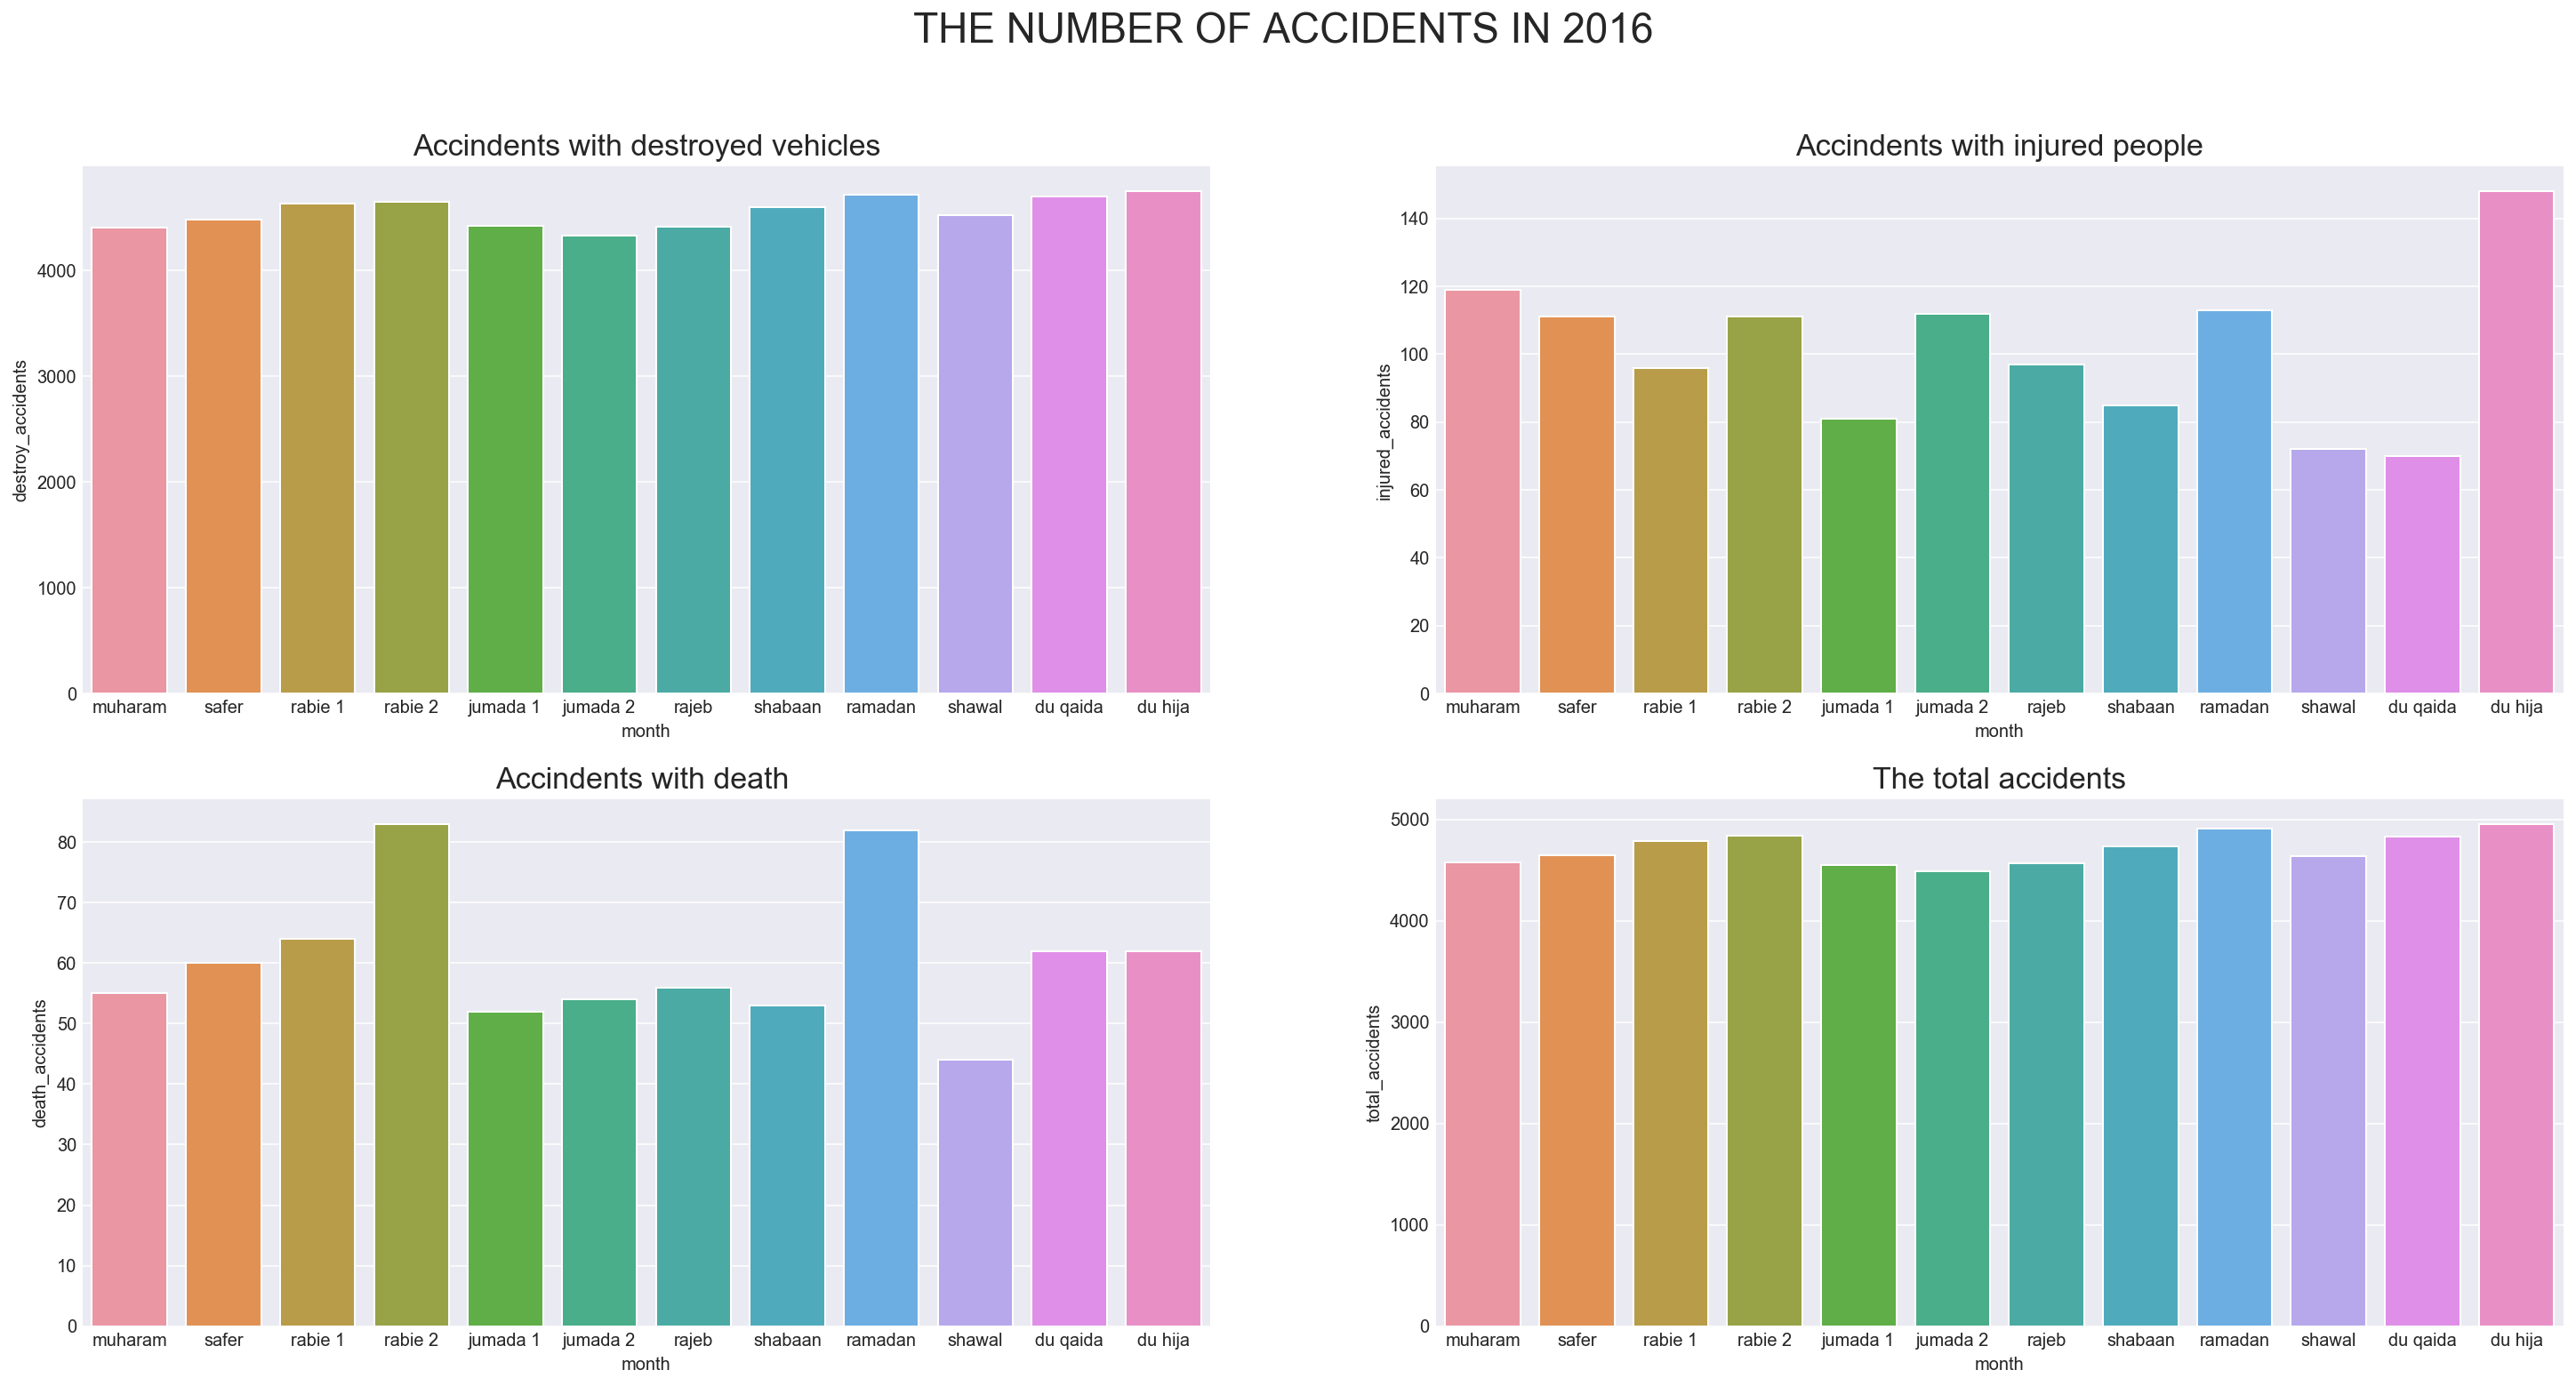

In [60]:
#dataframe without the last row "total"

Data_sub_2016=pd.DataFrame(accidents2016_detials.iloc[0:12,:])
Data_sub_2017=pd.DataFrame(accidents2017_detials.iloc[0:12,:])

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(25,12))

fig.suptitle('THE NUMBER OF ACCIDENTS IN 2016\n ', fontsize=23)

sns.barplot(x="month", y="destroy_accidents", data=Data_sub_2016,ax=ax[0,0]).set_title('Accindents with destroyed vehicles',fontsize=17)
sns.barplot(x="month", y="injured_accidents", data=Data_sub_2016,ax=ax[0,1]).set_title('Accindents with injured people',fontsize=17)
sns.barplot(x="month", y="death_accidents", data=Data_sub_2016,ax=ax[1,0]).set_title('Accindents with death ',fontsize=17)
sns.barplot(x="month", y="total_accidents", data=Data_sub_2016,ax=ax[1,1]).set_title('The total accidents',fontsize=17)



* [accidents were vihacle is destroyed]:the highest number of accidents was in ramadan come after that rabie 2
* [accidenst were people got injured]:the highest number of accidents was in DU hija come after that ramadan
* i[accidents were someone die because of it]:the highest number of accidents was in rabie 2
*  in total_accidents: ramadan got the highest number of accidents in all the months


* so in words the higest accidents accurd in Ramadan,Du hija and Rabie 2

Text(0.5, 1.0, 'The total accidents')

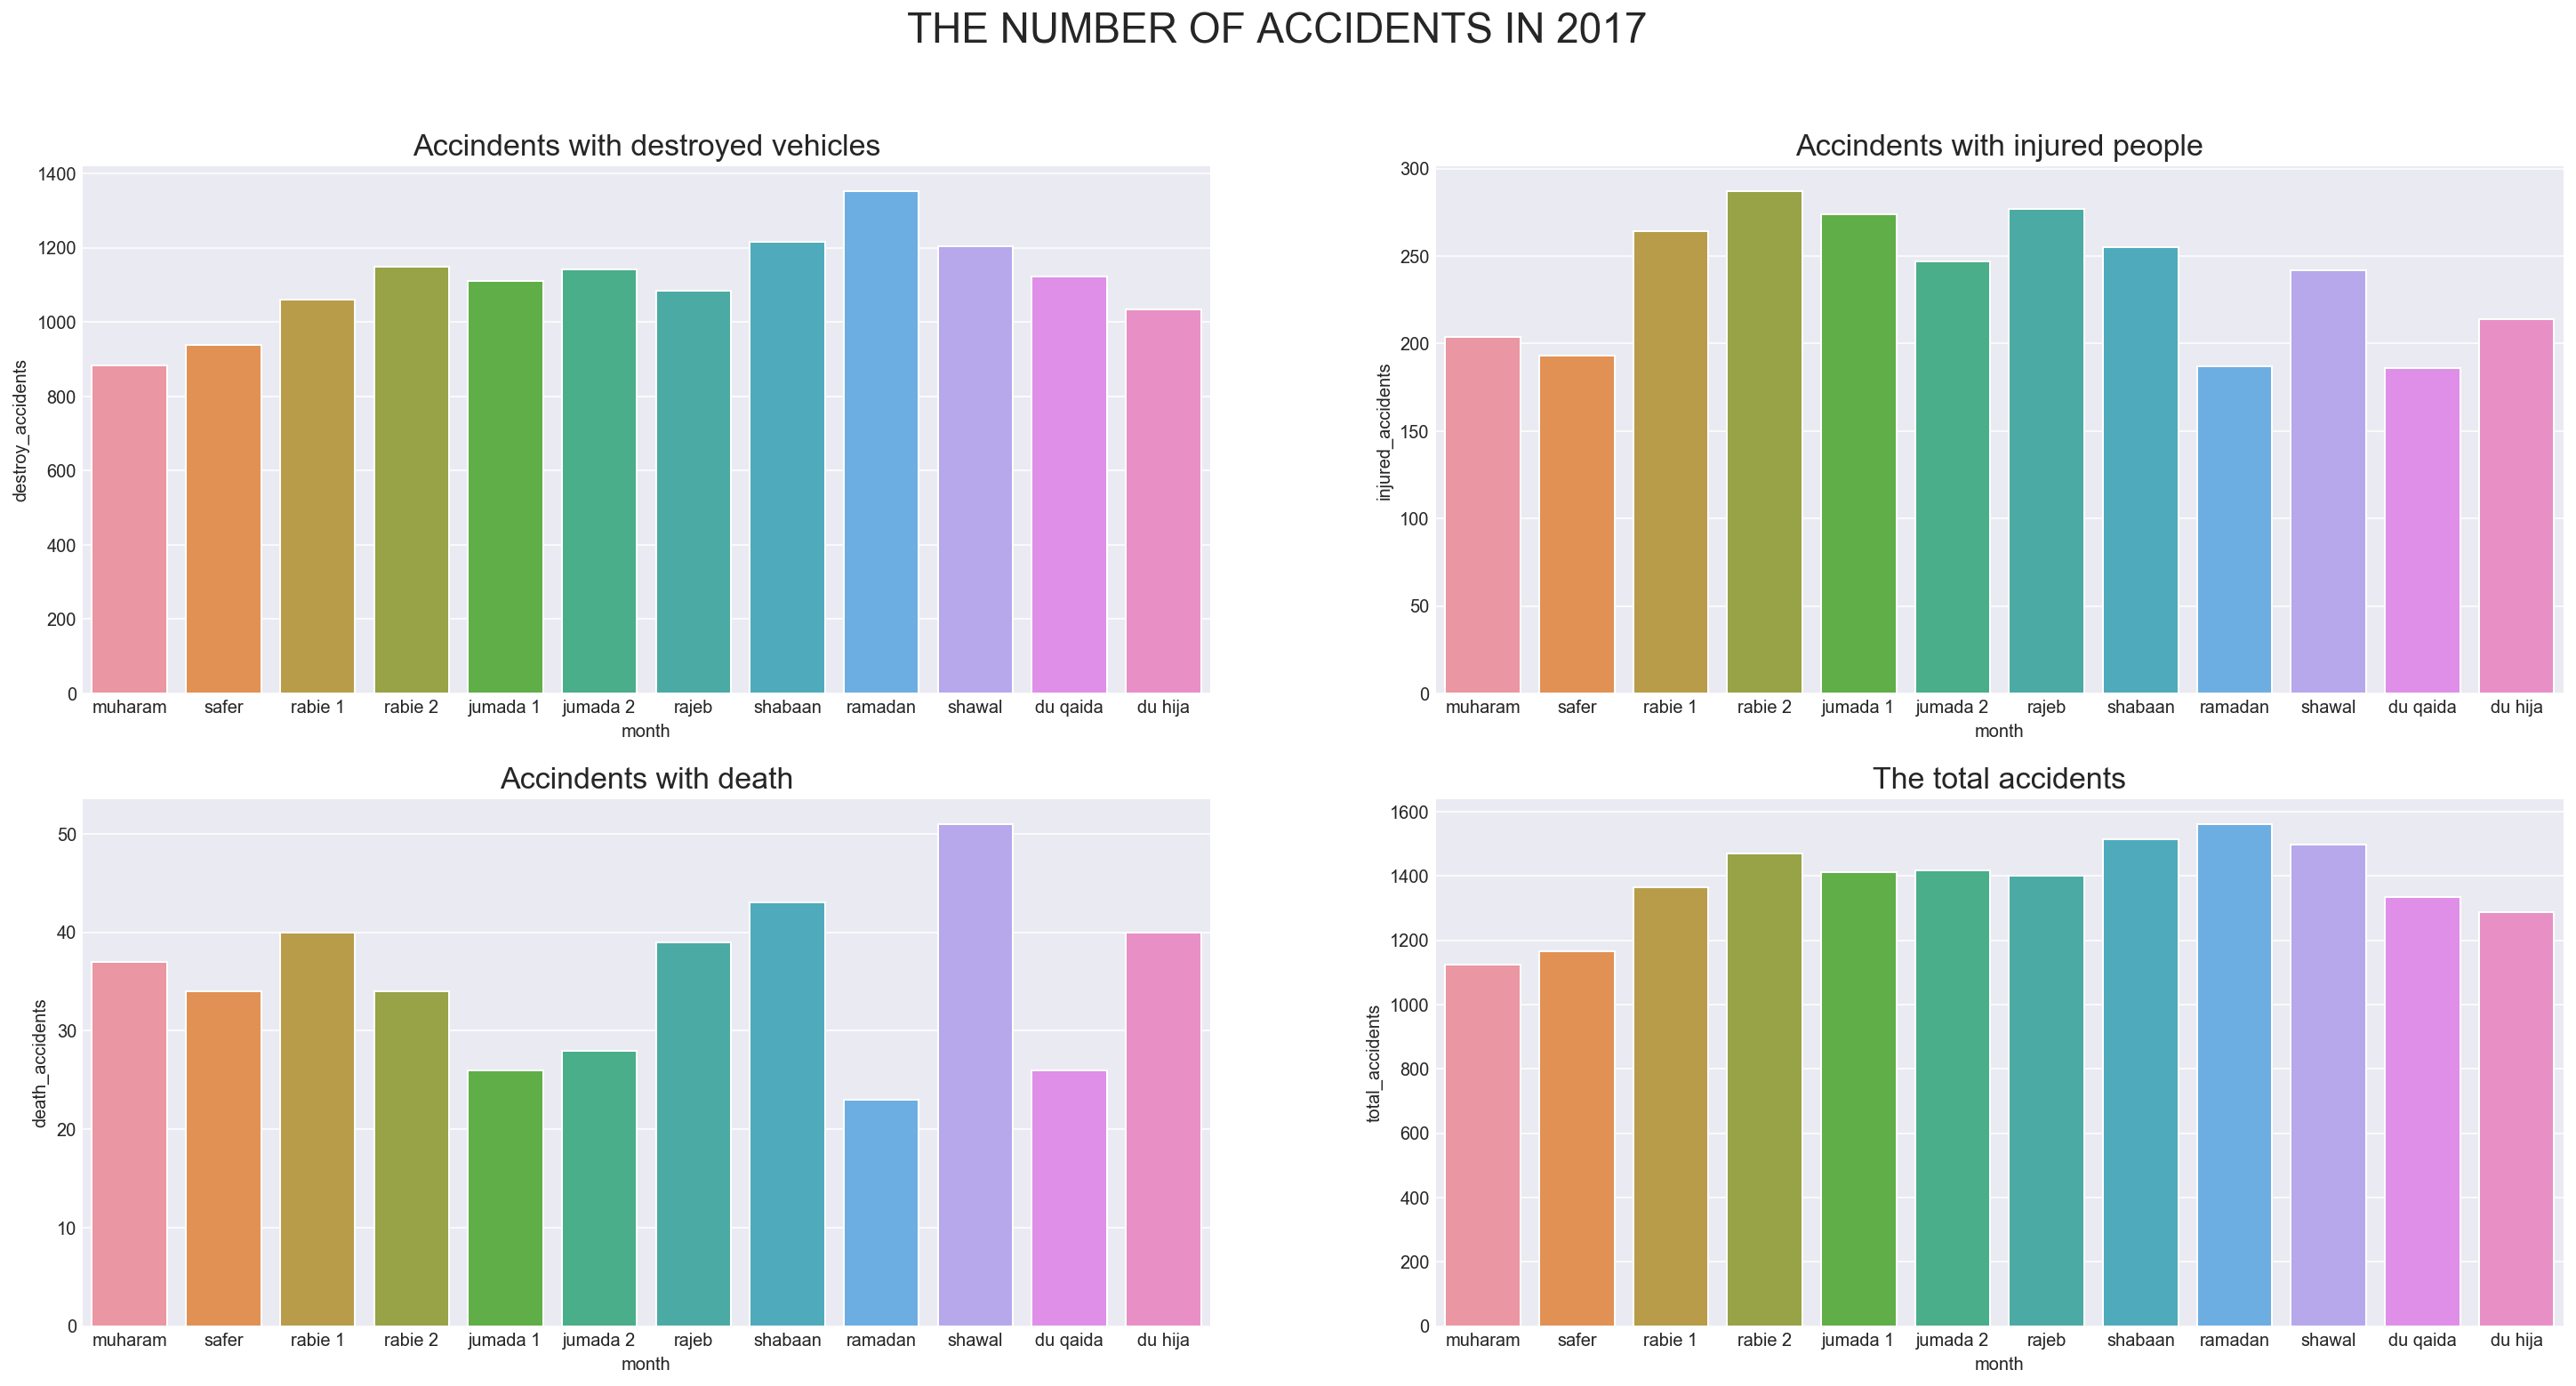

In [61]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(25,12))
fig.suptitle('THE NUMBER OF ACCIDENTS IN 2017 ', fontsize=23)

sns.barplot(x="month", y="destroy_accidents", data=Data_sub_2017,ax=ax[0,0]).set_title('Accindents with destroyed vehicles',fontsize=17)
sns.barplot(x="month", y="injured_accidents", data=Data_sub_2017,ax=ax[0,1]).set_title('Accindents with injured people',fontsize=17)
sns.barplot(x="month", y="death_accidents", data=Data_sub_2017,ax=ax[1,0]).set_title('Accindents with death',fontsize=17)
sns.barplot(x="month", y="total_accidents", data=Data_sub_2017,ax=ax[1,1]).set_title('The total accidents',fontsize=17)


* [accidents were vihacle is destroyed:the highest number of accidents was in ramadan
* [accidenst were people got injured]:the highest number of accidents was in rabie 2
* [accidents were someone die]:the highest number of accidents was in shawal
*  in total_accidents: ramadan got the highest number of accidents in all the months


* the highest accidents numbers accured in Ramadan, Rabie 2, and Shawal

let's check which time the accidents happends:

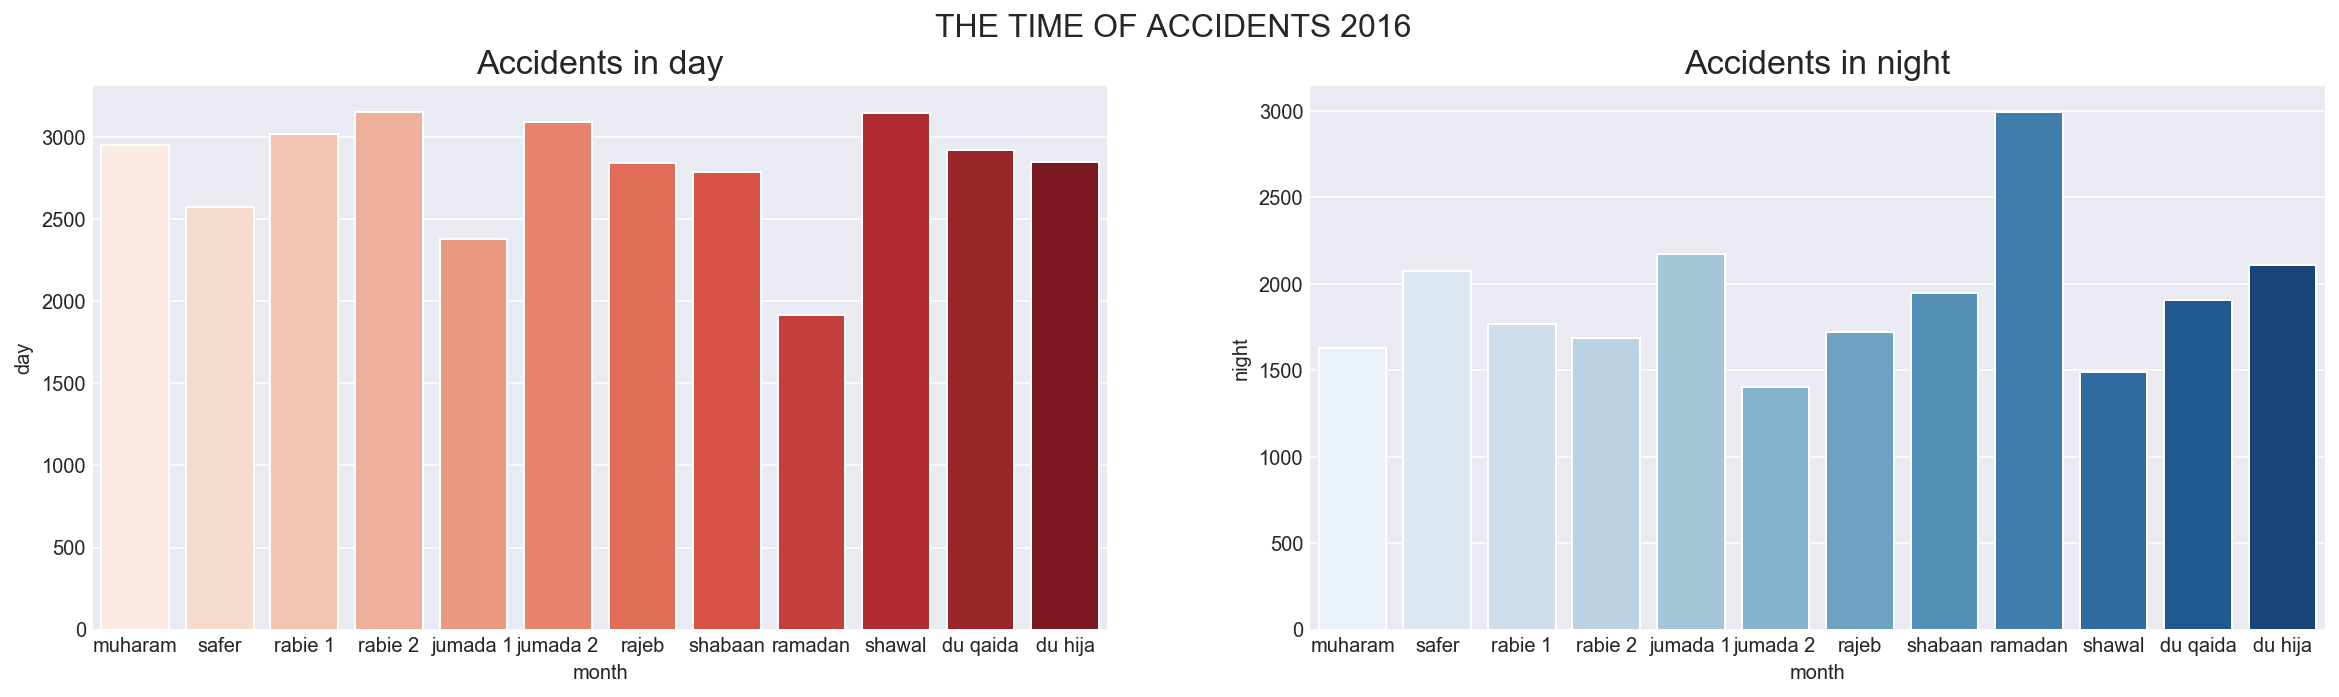

In [62]:
fig,ax = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(x="month", y="day", data=Data_sub_2016, ax=ax[0], palette="Reds").set_title('Accidents in day',fontsize=17)
sns.barplot(x="month", y="night", data=Data_sub_2016, ax=ax[1],palette='Blues').set_title('Accidents in night',fontsize=17)
fig.suptitle('THE TIME OF ACCIDENTS 2016', fontsize=16)
plt.show()




- In general the three most accidents that happend in day are: Shawal, Rabie Second, and Jumada Second

 - The three most accidents that happend in night is: Ramadan

We see from the chart that most accident happed in day ,it's because people spending their time going to works,schools or to just simply visited a place or someone. For example Shawal got the highest accidents rate more than the other months but in the night it was the second less accidents in the night

and if we looked at the night chart we will see the oppsite. Ramadan is the highest number of accidents happend in night more than the day

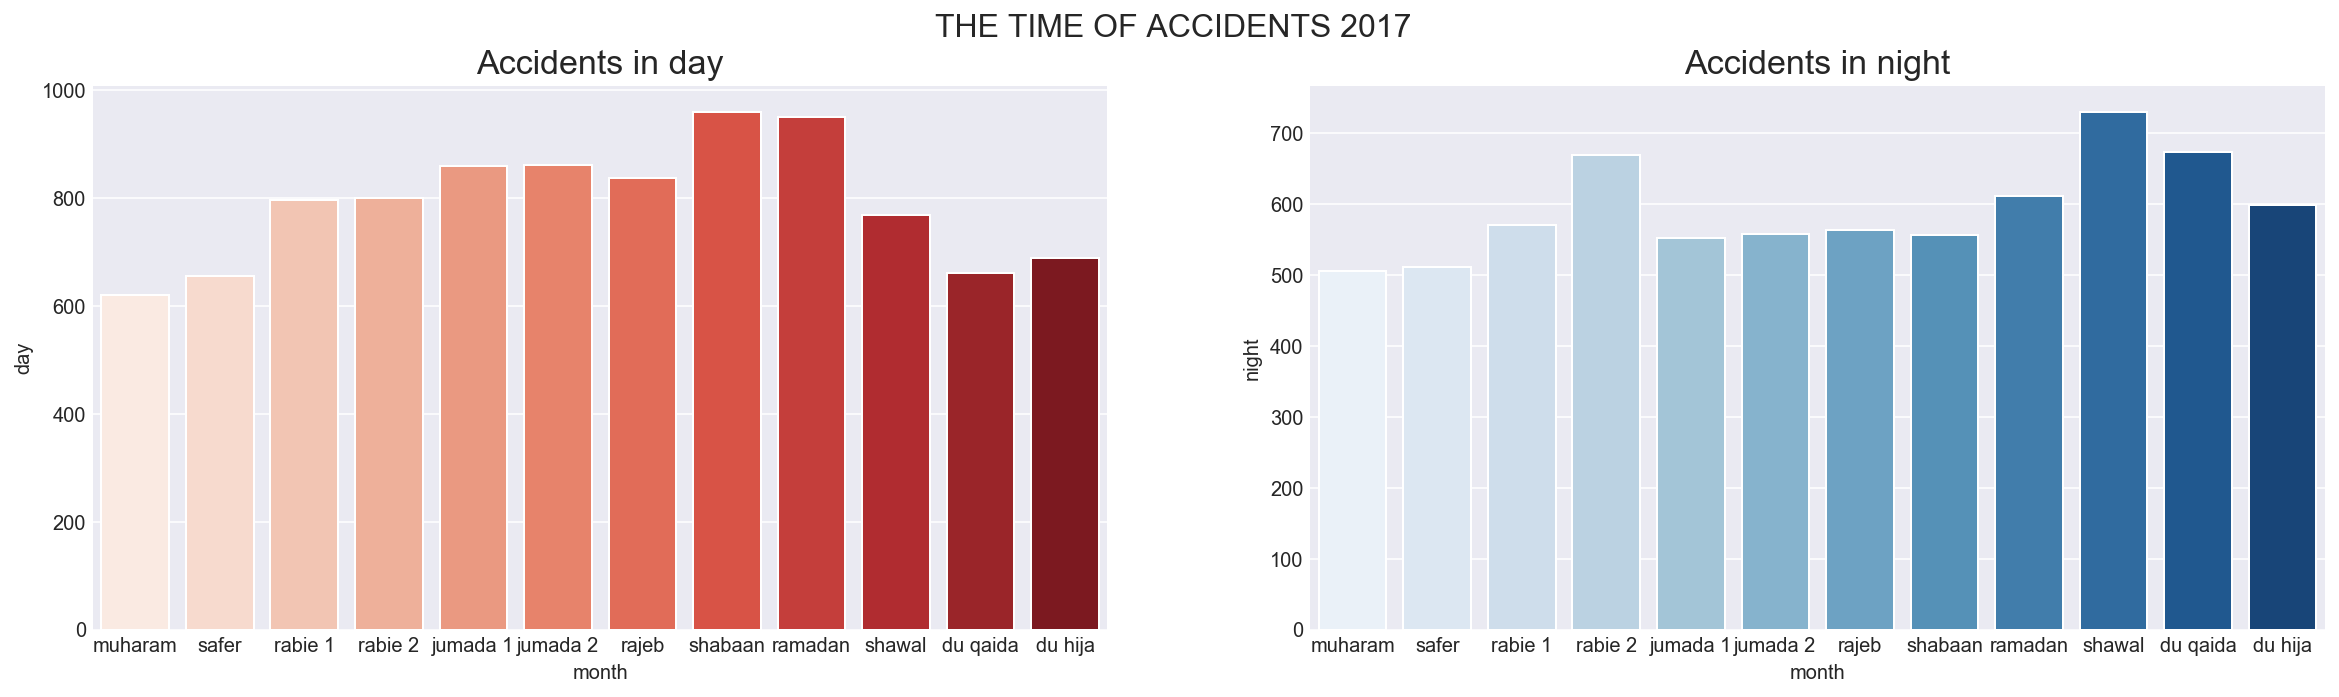

In [63]:
fig,ax = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(x="month", y="day", data=Data_sub_2017, ax=ax[0], palette="Reds").set_title('Accidents in day',fontsize=17)
sns.barplot(x="month", y="night", data=Data_sub_2017, ax=ax[1],palette='Blues').set_title('Accidents in night',fontsize=17)
fig.suptitle('THE TIME OF ACCIDENTS 2017', fontsize=16)
plt.show()


 In day time most accidents happends in shaaban
* least month is muharam
* Ramadan is the second month of the most accident happend in day


 -  In night time most accidents happend Shawal I guess mostly is because it's a vecation and also Eid so everyone is celebrating outside and the road will crawded quickly 

 - the least accidents happend in muharam also
 
 -  Ramadan here takes fourth month place of the highest accidents rate in the 12 month



Text(0.5, 1.0, 'THE RATE OF EACH TYPE OF ACCIDENT 2016\n')

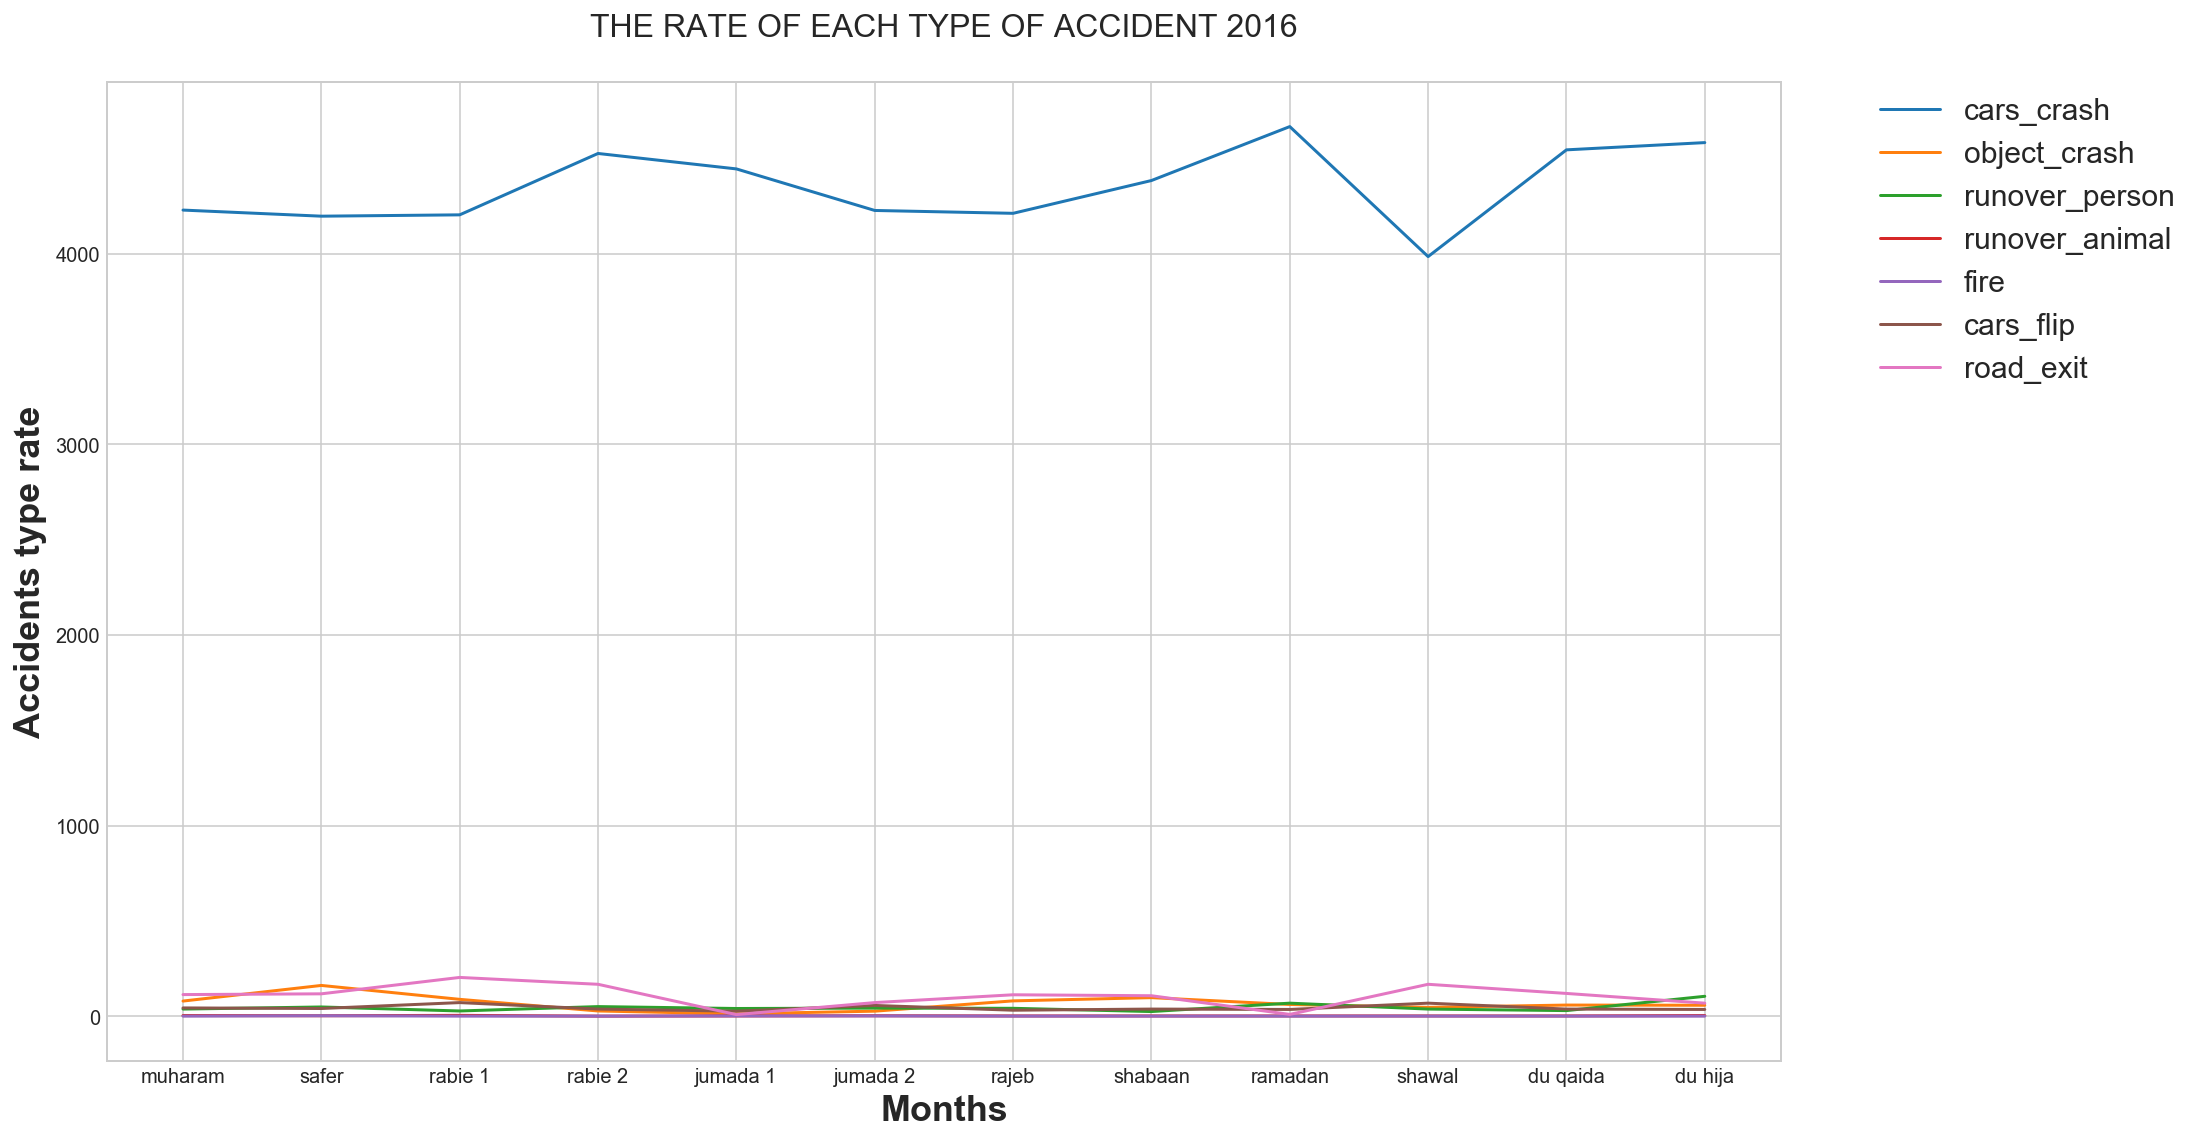

In [64]:
plt.figure(figsize=(15,9))
plt.style.use('seaborn-whitegrid')

    
plt.plot(Data_sub_2016['month'], Data_sub_2016['cars_crash'],label='cars_crash')
plt.plot(Data_sub_2016['month'], Data_sub_2016['object_crash'],label='object_crash')
plt.plot(Data_sub_2016['month'], Data_sub_2016['runover_person'],label='runover_person')
plt.plot(Data_sub_2016['month'], Data_sub_2016['runover_animal'],label='runover_animal')
plt.plot(Data_sub_2016['month'], Data_sub_2016['fire'],label='fire')
plt.plot(Data_sub_2016['month'], Data_sub_2016['cars_flip'],label='cars_flip')
plt.plot(Data_sub_2016['month'], Data_sub_2016['road_exit'],label='road_exit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=15)
plt.xlabel('Months', fontsize=18,fontweight='bold')
plt.ylabel('Accidents type rate', fontsize=18,fontweight='bold')


plt.title("THE RATE OF EACH TYPE OF ACCIDENT 2016\n",fontsize=16)



<strong>Car crashing</strong> was the most and the highest type of accidents happend in all months. the highest months were in Rabie Second,Ramadan



Text(0.5, 1.0, 'THE RATE OF EACH TYPE OF ACCIDENT 2017\n')

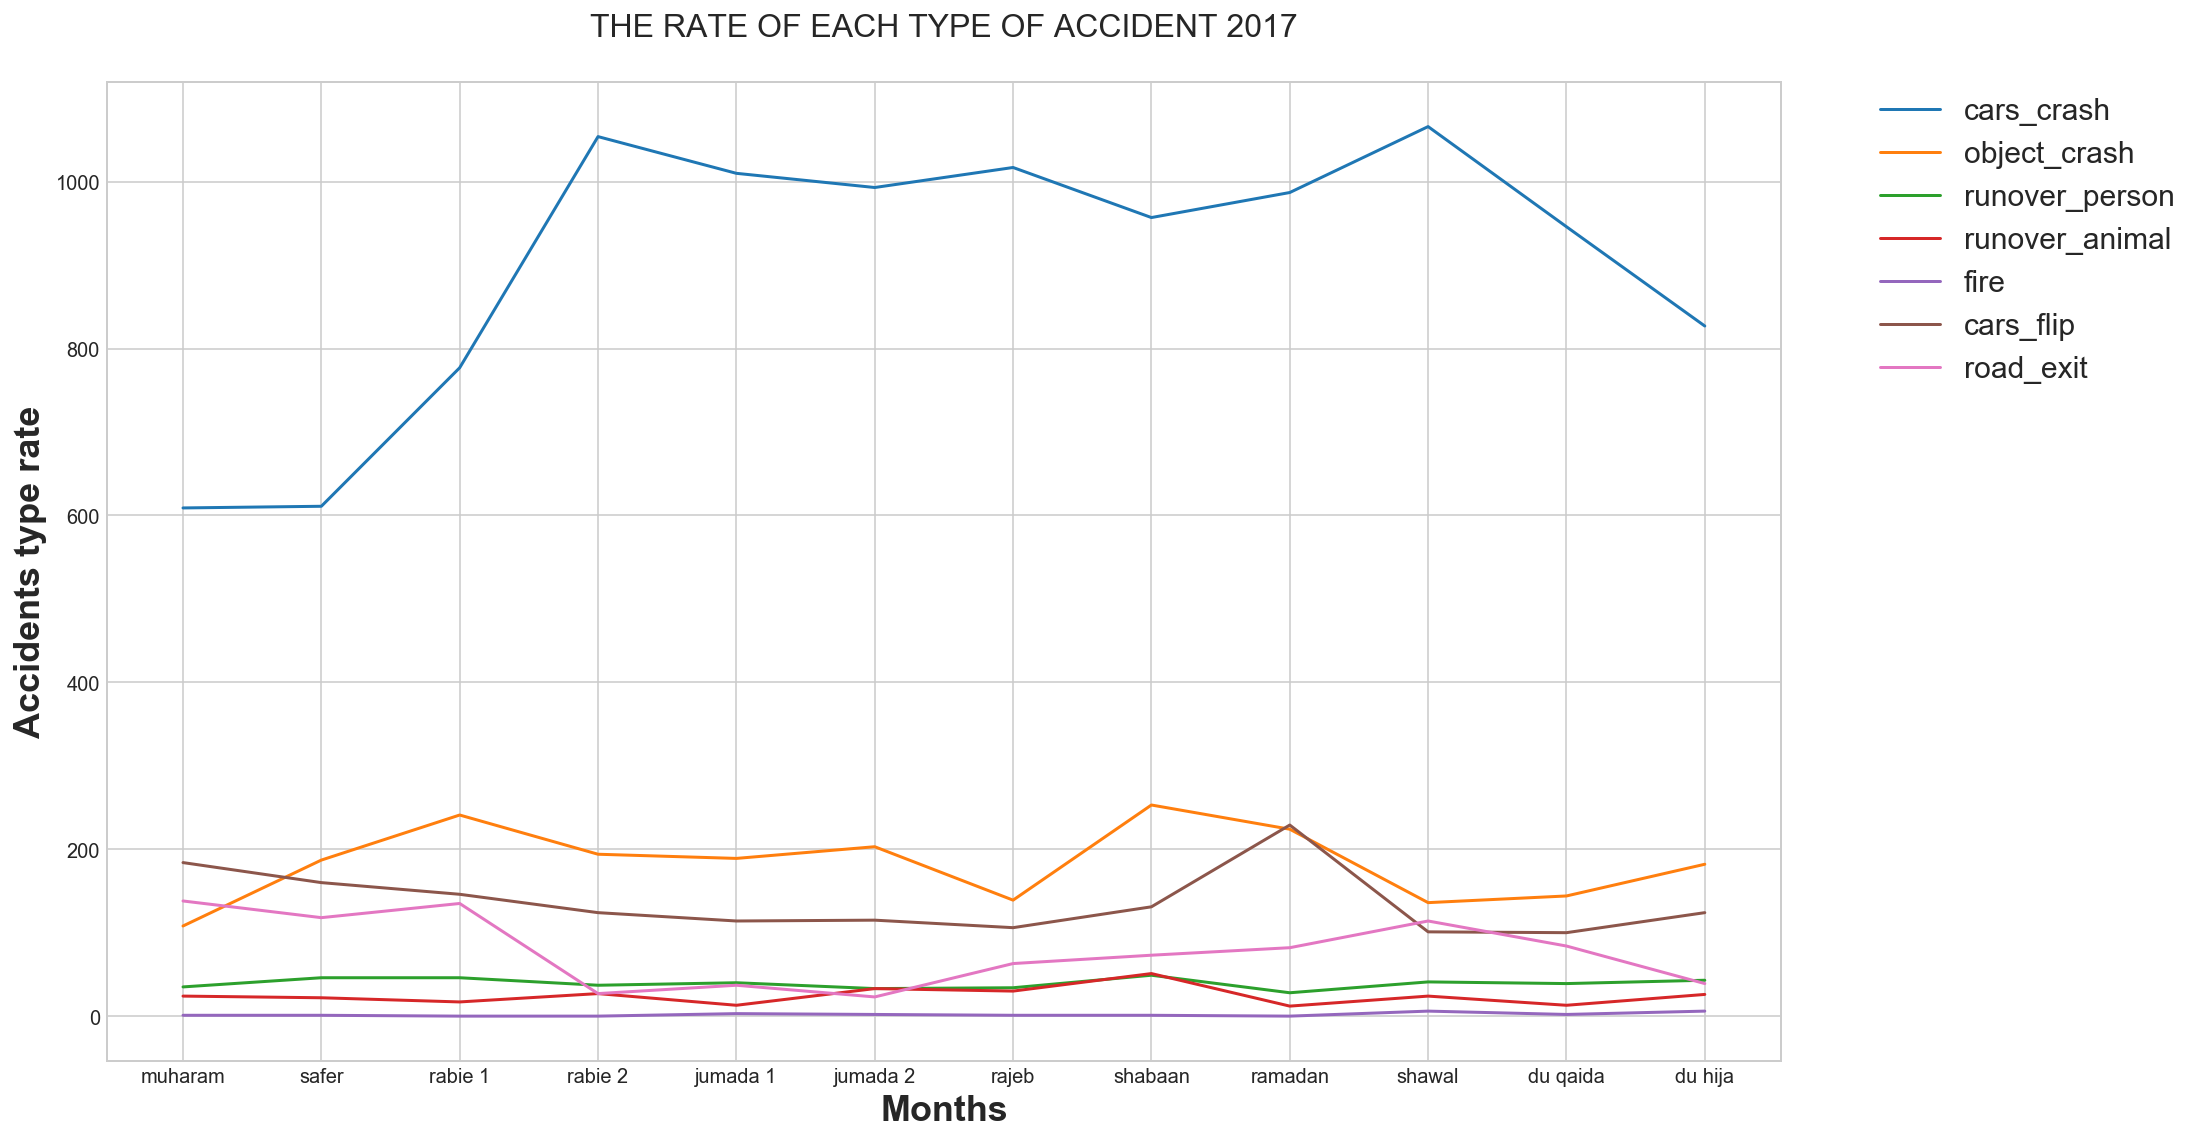

In [65]:

plt.figure(figsize=(15,9))
plt.style.use('seaborn-whitegrid')

    
plt.plot(Data_sub_2017['month'], Data_sub_2017['cars_crash'],label='cars_crash')
plt.plot(Data_sub_2017['month'], Data_sub_2017['object_crash'],label='object_crash')
plt.plot(Data_sub_2017['month'], Data_sub_2017['runover_person'],label='runover_person')
plt.plot(Data_sub_2017['month'], Data_sub_2017['runover_animal'],label='runover_animal')
plt.plot(Data_sub_2017['month'], Data_sub_2017['fire'],label='fire')
plt.plot(Data_sub_2017['month'], Data_sub_2017['cars_flip'],label='cars_flip')
plt.plot(Data_sub_2017['month'], Data_sub_2017['road_exit'],label='road_exit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=15)
plt.xlabel('Months', fontsize=18,fontweight='bold')
plt.ylabel('Accidents type rate', fontsize=18,fontweight='bold')


plt.title("THE RATE OF EACH TYPE OF ACCIDENT 2017\n",fontsize=16)


* cars_carsh got the histest rate in all months than the other type of accidents,the highest point is on shawal month

* comes after it the object_crash,with a highest peak on shabaan month
* the cars flip rise until reach higher than object_crash on ramadan

* so most accidents in ramadan was car crash  and object_crash 
* there some month have a higher crash accident than ramadan but less other type of accidents than ramadan

* fire was te least type of accidents it even have zero value in some months

Next I will find the cause of accidents:

Text(0.5, 1.0, 'THE RATE OF ACCIDENTS CAUSE IN 2016\n')

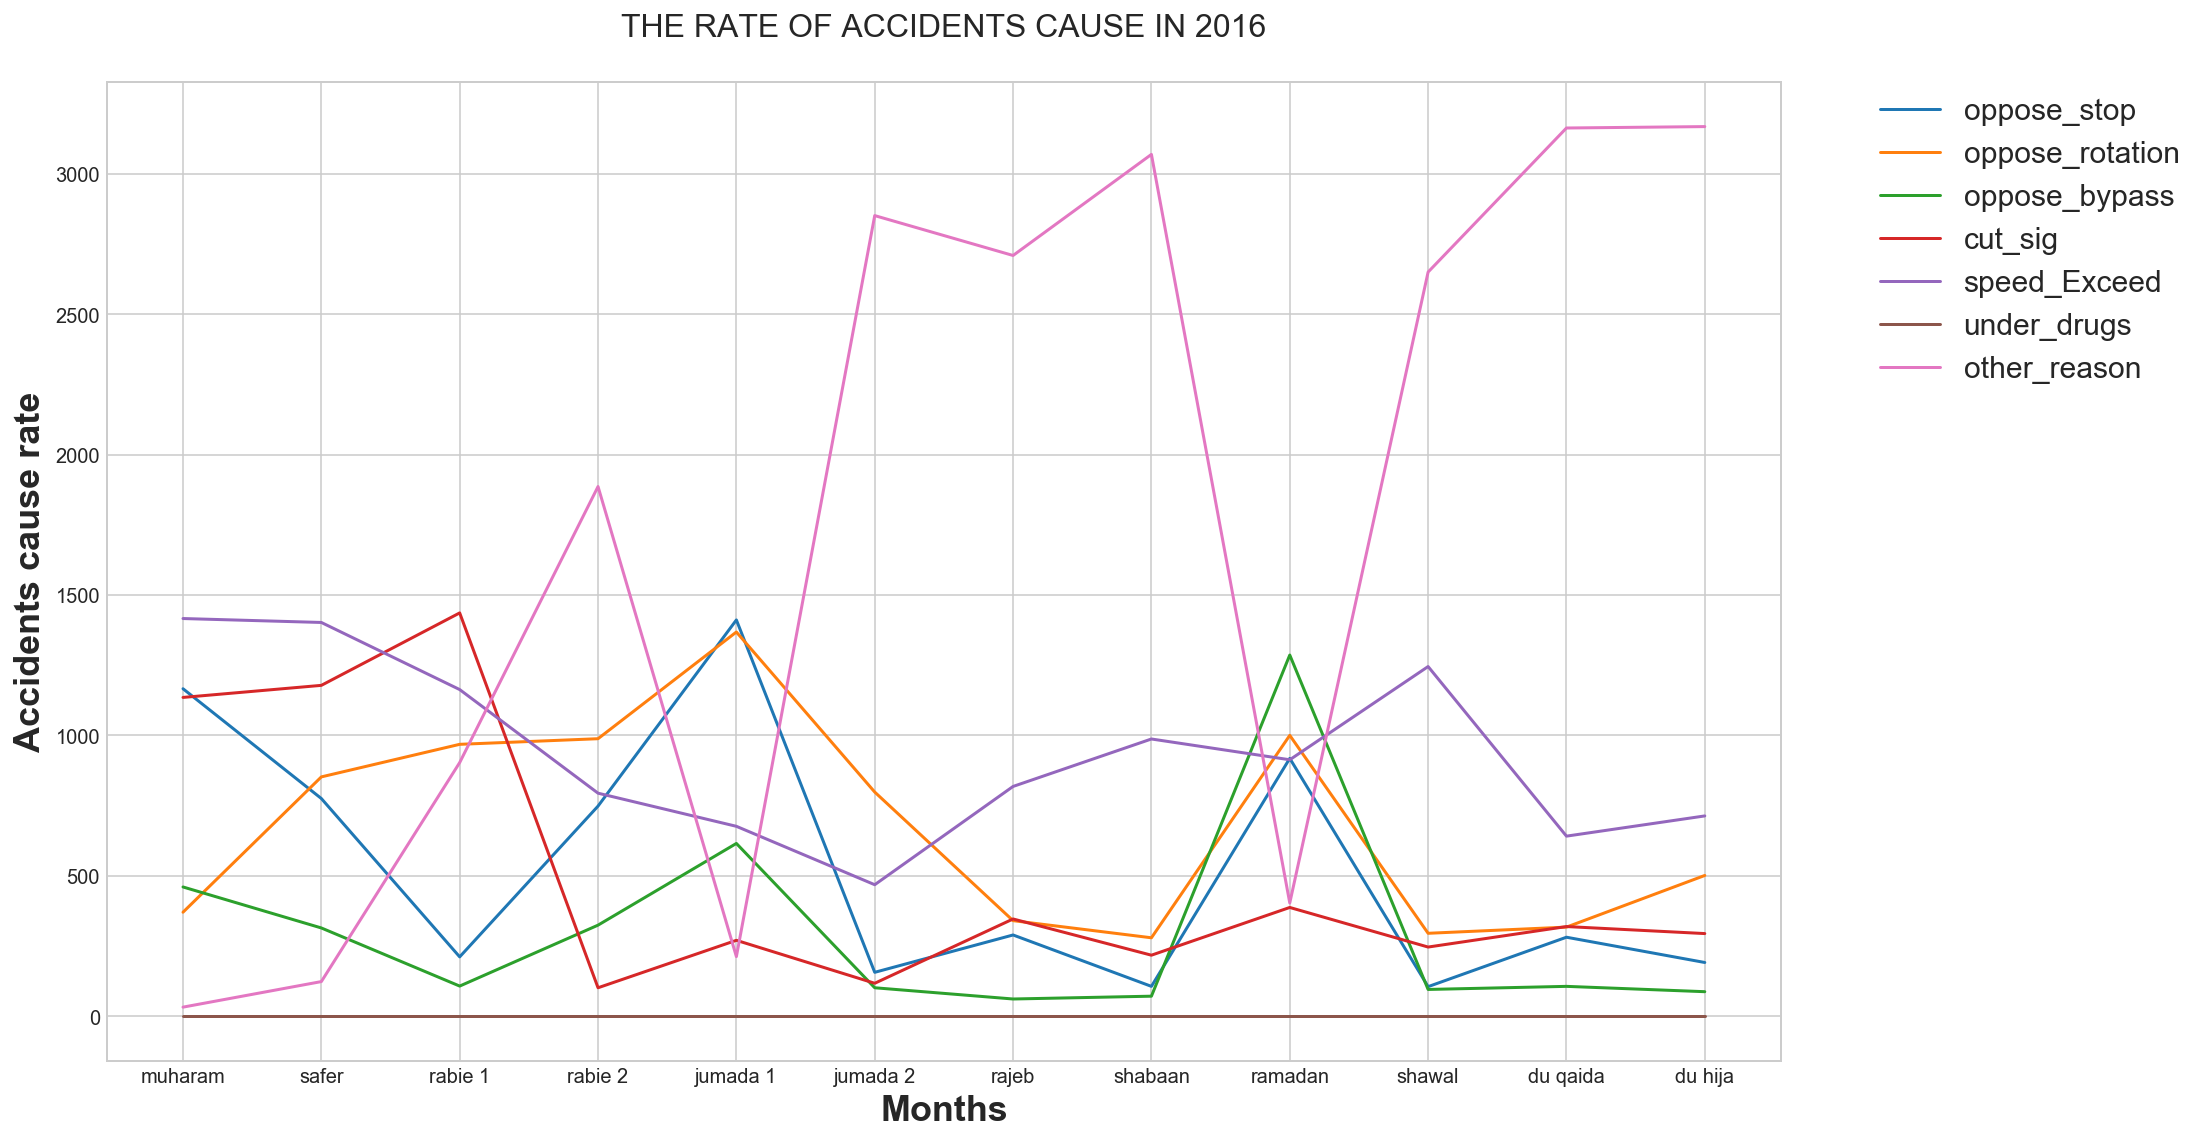

In [66]:
plt.figure(figsize=(15,9))
plt.style.use('seaborn-whitegrid')

    
plt.plot(Data_sub_2016['month'], Data_sub_2016['oppose_stop'],label='oppose_stop')
plt.plot(Data_sub_2016['month'], Data_sub_2016['oppose_rotation'],label='oppose_rotation')
plt.plot(Data_sub_2016['month'], Data_sub_2016['oppose_bypass'],label='oppose_bypass')
plt.plot(Data_sub_2016['month'], Data_sub_2016['cut_sign'],label='cut_sig')
plt.plot(Data_sub_2016['month'], Data_sub_2016['speed_Exceed'],label='speed_Exceed')
plt.plot(Data_sub_2016['month'], Data_sub_2016['under_drugs'],label='under_drugs')
plt.plot(Data_sub_2016['month'], Data_sub_2016['other_reason'],label='other_reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=15)
plt.xlabel('Months', fontsize=18,fontweight='bold')
plt.ylabel('Accidents cause rate', fontsize=18,fontweight='bold')


plt.title("THE RATE OF ACCIDENTS CAUSE IN 2016\n",fontsize=16)

 <strong>other reason</strong> of accident got the highest rate in cause of accident but since it's unkown what kind of(other type)is. I search for next most  accidents cause and it was <strong> spead exceeding</strong>, the rate was high in 5 month out of 12: the highest is Shawal

Text(0.5, 1.0, 'THE RATE OF ACCIDENTS CAUSE\n')

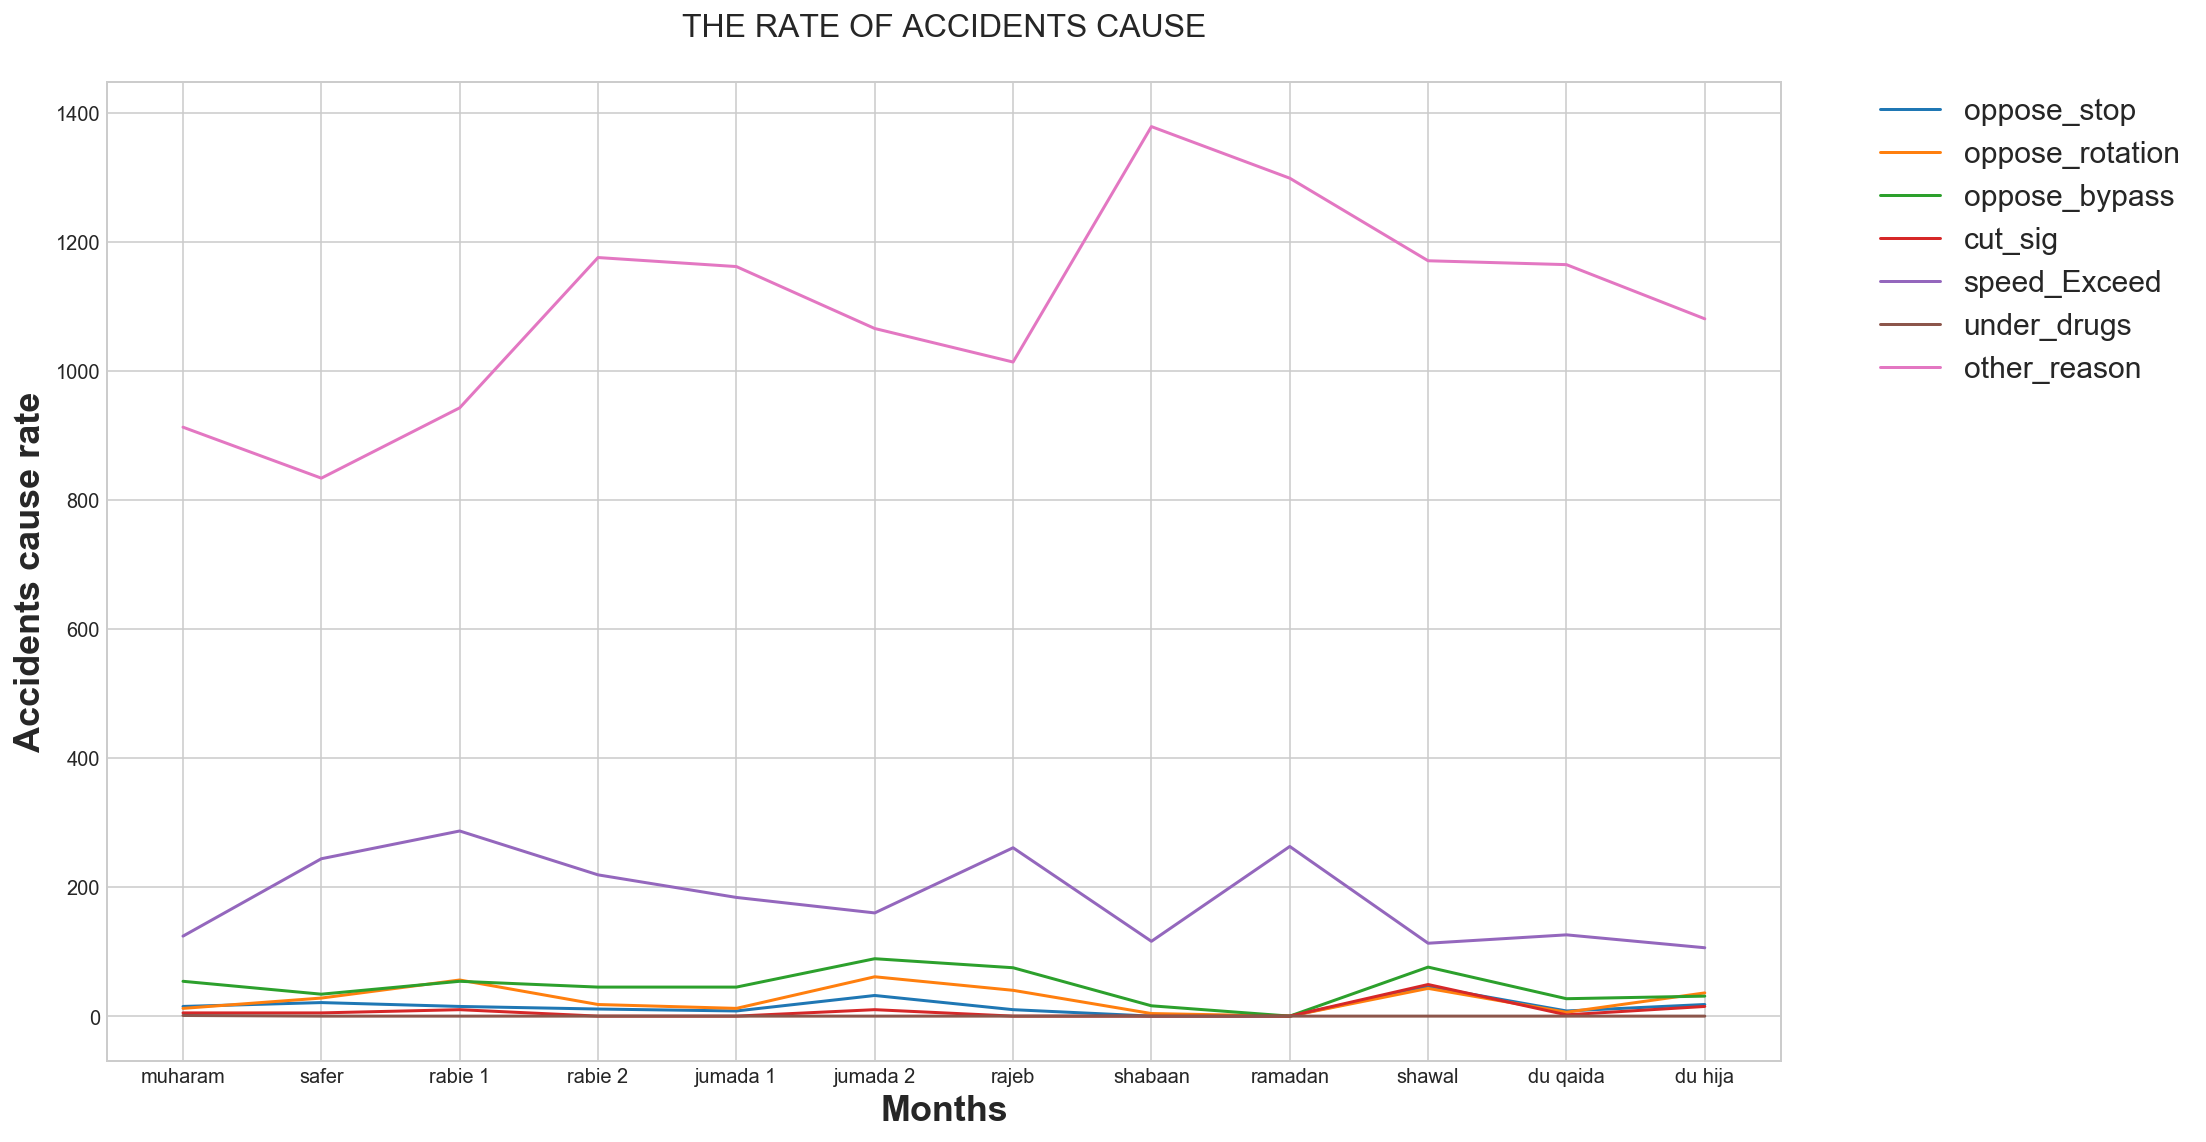

In [67]:
plt.figure(figsize=(15,9))
plt.style.use('seaborn-whitegrid')

    
plt.plot(Data_sub_2017['month'], Data_sub_2017['oppose_stop'],label='oppose_stop')
plt.plot(Data_sub_2017['month'], Data_sub_2017['oppose_rotation'],label='oppose_rotation')
plt.plot(Data_sub_2017['month'], Data_sub_2017['oppose_bypass'],label='oppose_bypass')
plt.plot(Data_sub_2017['month'], Data_sub_2017['cut_sign'],label='cut_sig')
plt.plot(Data_sub_2017['month'], Data_sub_2017['speed_Exceed'],label='speed_Exceed')
plt.plot(Data_sub_2017['month'], Data_sub_2017['under_drugs'],label='under_drugs')
plt.plot(Data_sub_2017['month'], Data_sub_2017['other_reason'],label='other_reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,fontsize=15)
plt.xlabel('Months', fontsize=18,fontweight='bold')
plt.ylabel('Accidents cause rate', fontsize=18,fontweight='bold')


plt.title("THE RATE OF ACCIDENTS CAUSE\n",fontsize=16)

 <strong> other reason </strong> of accident got the highest rate in cause of accidents but since it's unkown what kind of(other type) is I search for next most accidents cause and it was also in this year the  <strong>spead exceeding  </strong>. The highest month is Ramadan

In [68]:
#the next plot it's defferent than the plot the before 
# the above bar plot shows the number of acciden in all 12 month
# here the bar plot shows the number of affected people in all kind of accidents in the 12 months,
#because sometime in one accident more than one person affected by it

Text(0, 0.5, 'Affected people numbers')

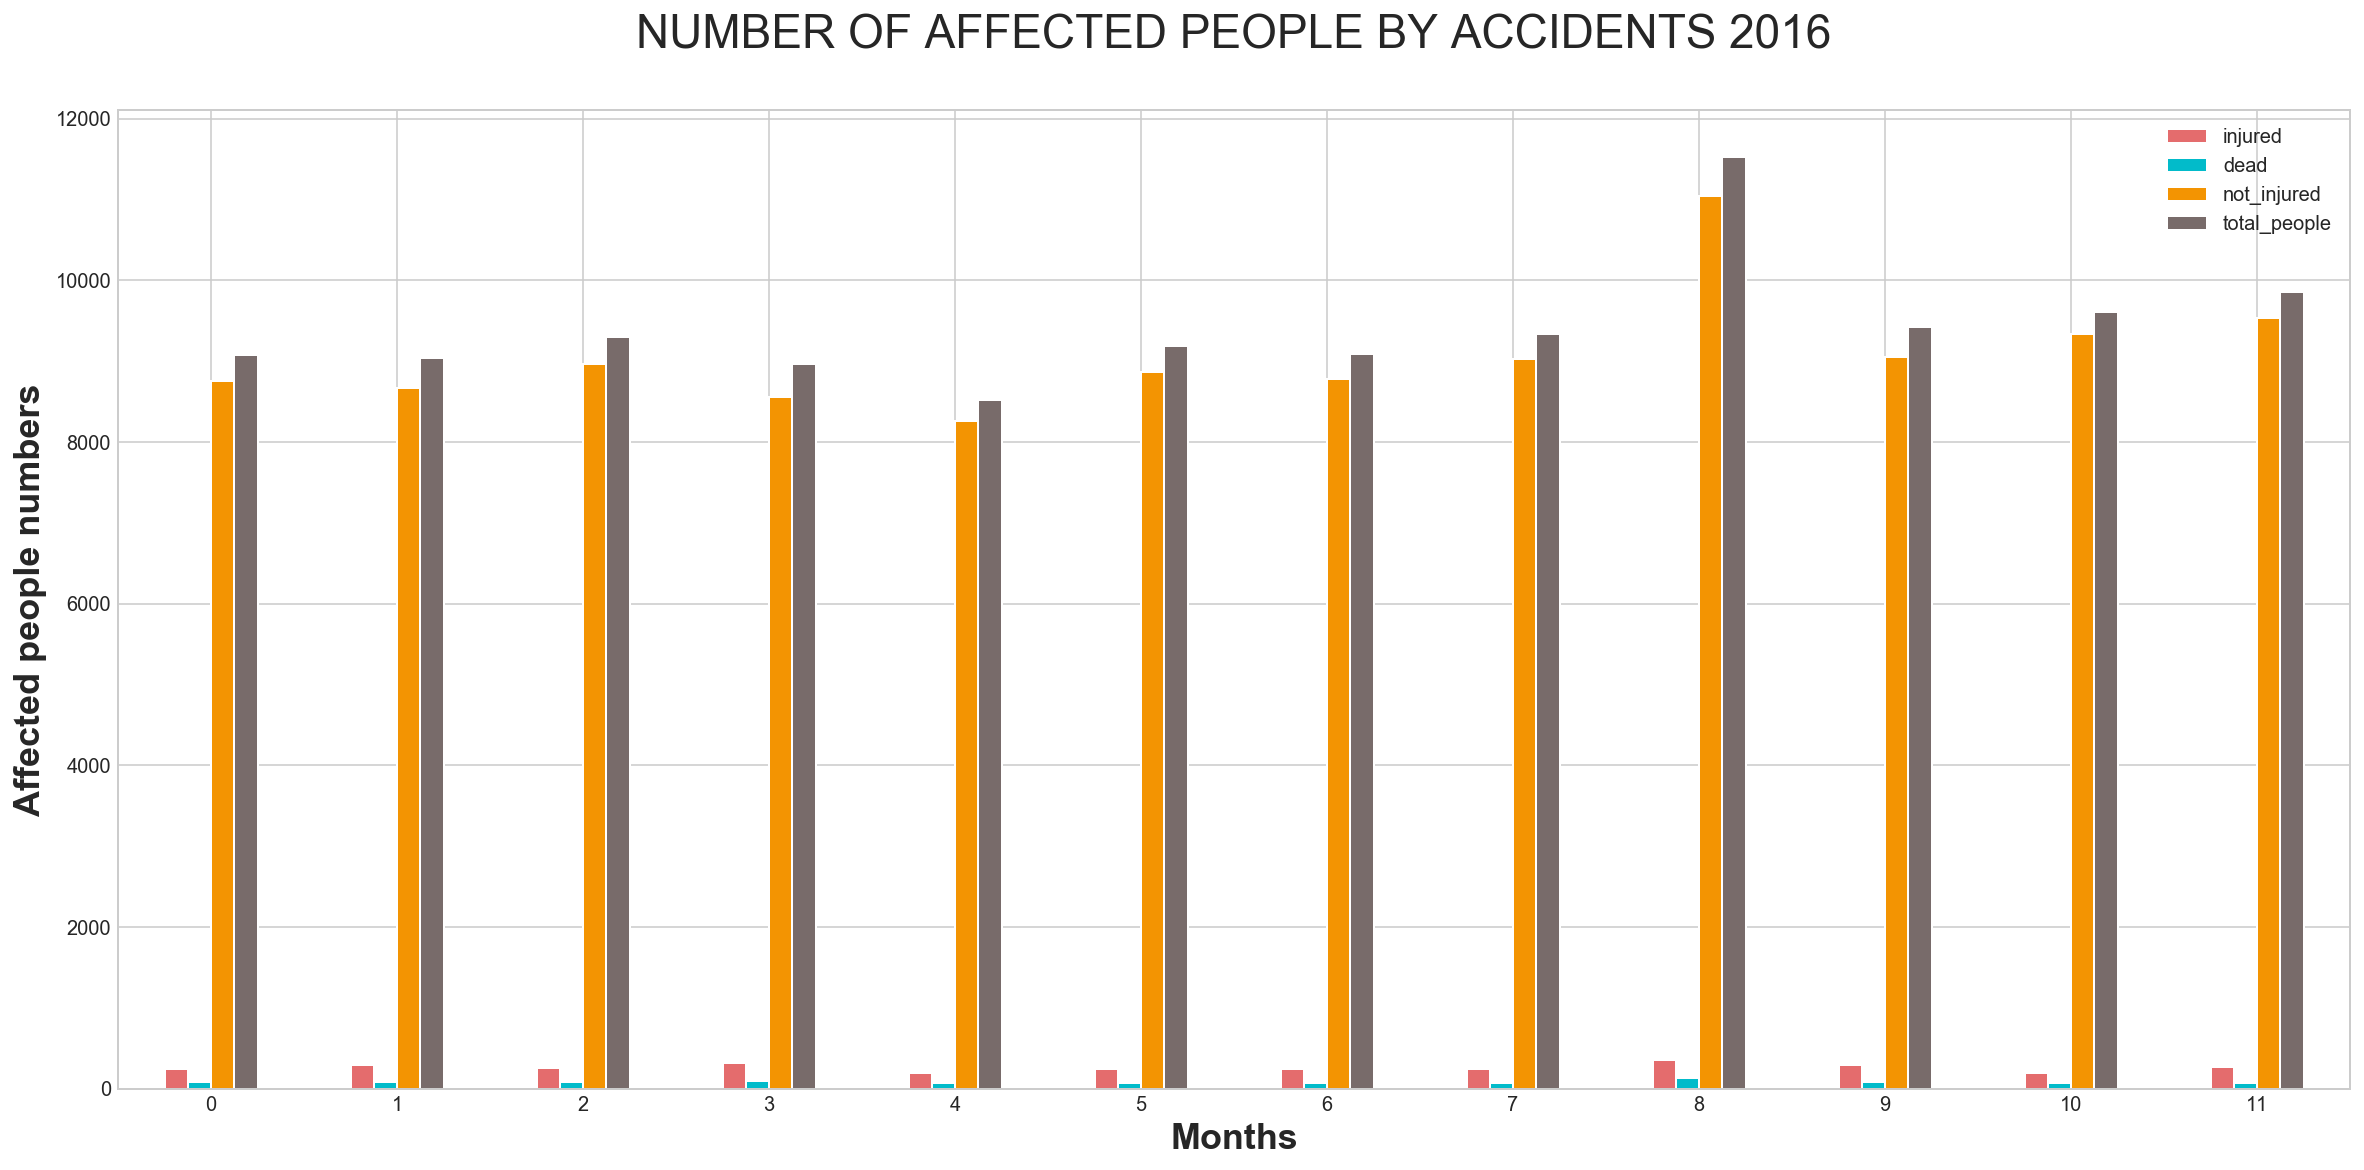

In [69]:
affected_data_2016=Data_sub_2016[['month','injured','dead','not_injured',"total_people"]]  

ax = affected_data_2016.plot.bar(rot=0,figsize=(20,9),color =['#e46c6d','#02bbca','#f39402','#786b6a'])

plt.title('NUMBER OF AFFECTED PEOPLE BY ACCIDENTS 2016\n',fontsize=23)
plt.xlabel('Months', fontsize=18,fontweight='bold')
plt.ylabel('Affected people numbers', fontsize=18,fontweight='bold')





Ramadan is the most month people affected by accident

Text(0, 0.5, 'Affected people numbers')

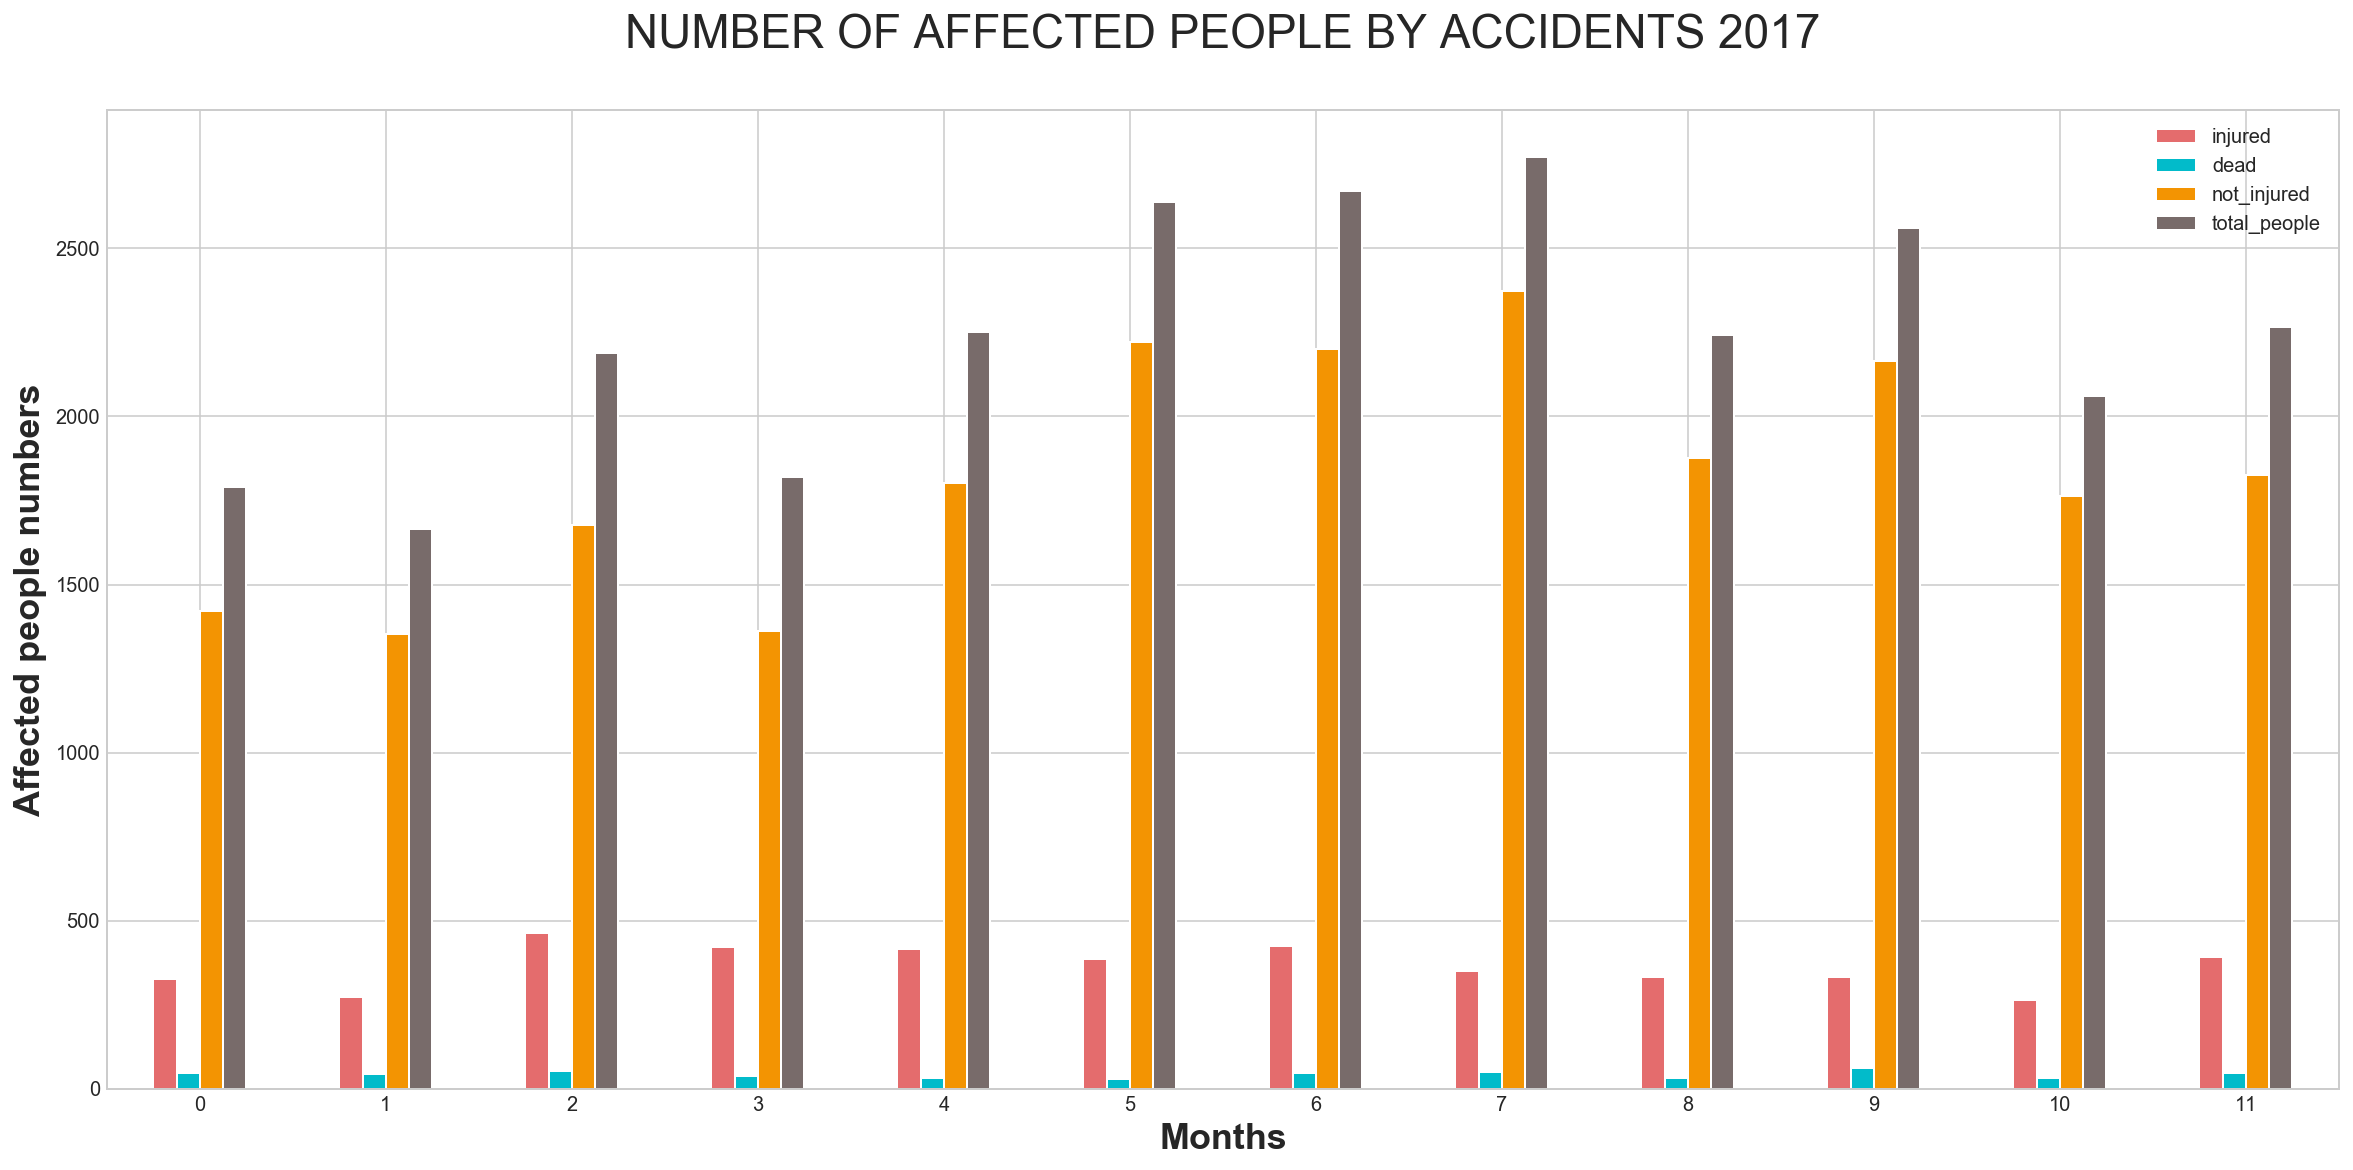

In [70]:
affected_data_2017=Data_sub_2017[['month','injured','dead','not_injured',"total_people"]]  

ax = affected_data_2017.plot.bar(rot=0,figsize=(20,9),
                                 color =['#e46c6d','#02bbca','#f39402','#786b6a'])

plt.title('NUMBER OF AFFECTED PEOPLE BY ACCIDENTS 2017\n',fontsize=23)
plt.xlabel('Months', fontsize=18,fontweight='bold')
plt.ylabel('Affected people numbers', fontsize=18,fontweight='bold')




the most month people affected by accident shaban

Text(0, 0.5, 'Drivers age numbers')

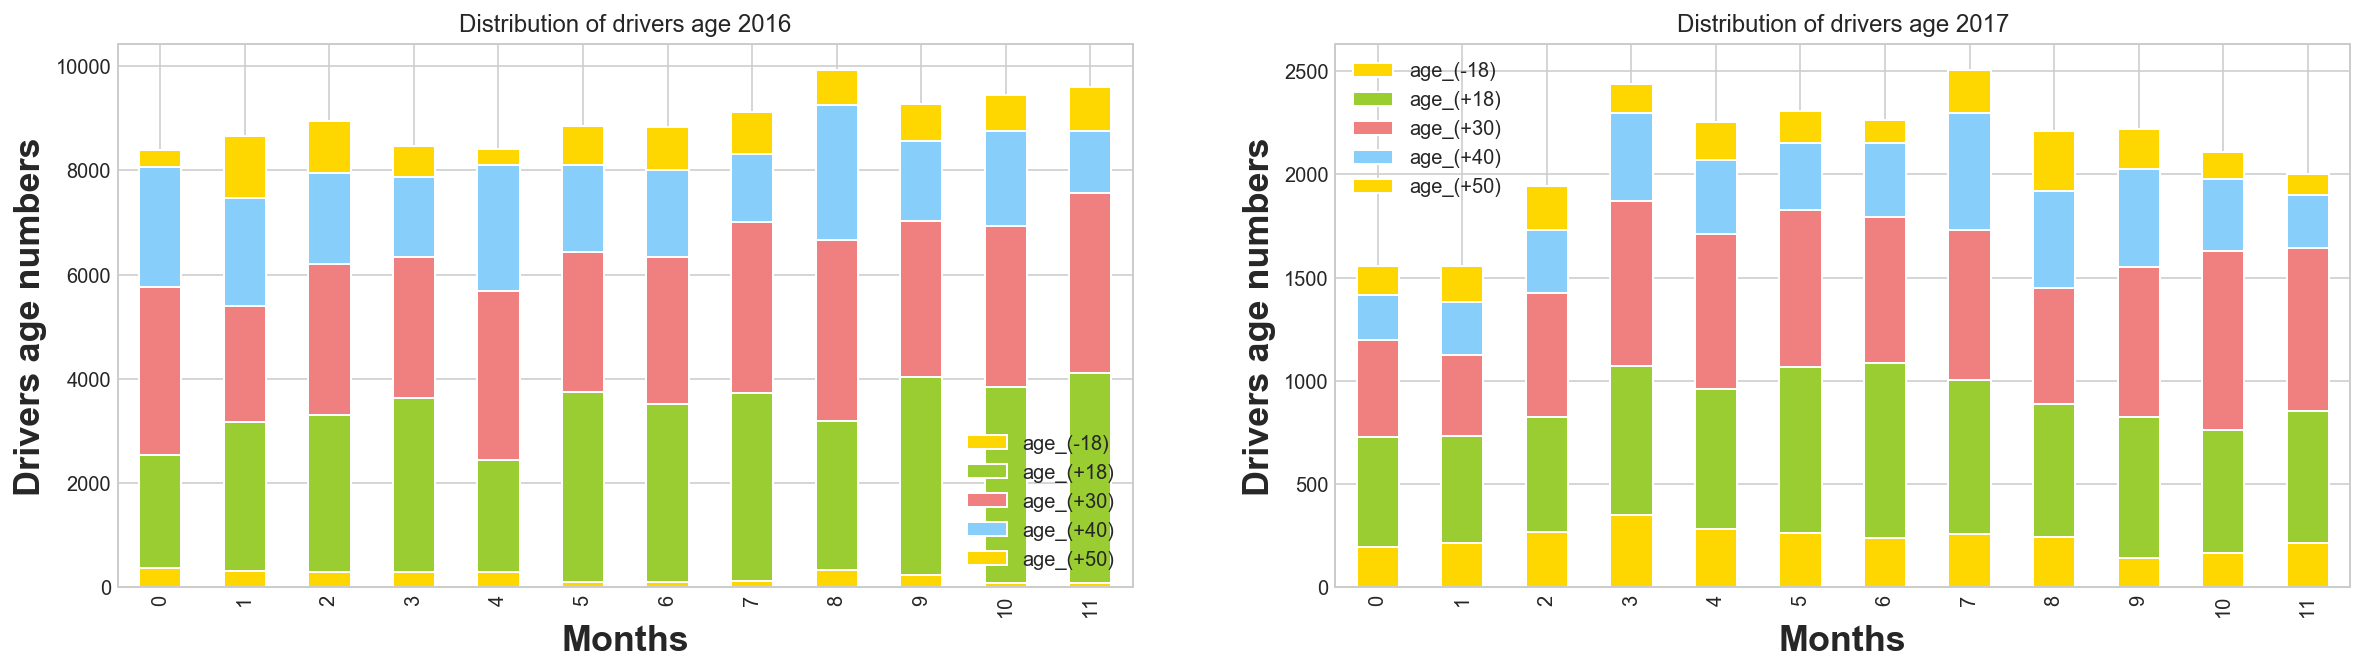

In [71]:
 #Distribution of drivers involved in road traffic accidents according to age.
fig,ax = plt.subplots(ncols=2,figsize=(20,5))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
ax1=Data_sub_2016.loc[:,["month","age_(-18)","age_(+18)","age_(+30)","age_(+40)",
                     "age_(+50)"]].plot.bar(stacked=True, color=colors,ax=ax[0],title="Distribution of drivers age 2016")
ax1.set_xlabel('Months', fontsize=18,fontweight='bold')
ax1.set_ylabel('Drivers age numbers', fontsize=18,fontweight='bold')


ax2=Data_sub_2017.loc[:,["month","age_(-18)","age_(+18)","age_(+30)","age_(+40)",
                     "age_(+50)"]].plot.bar(stacked=True, color=colors,ax=ax[1],title="Distribution of drivers age 2017")
ax2.set_xlabel('Months', fontsize=18,fontweight='bold')
ax2.set_ylabel('Drivers age numbers', fontsize=18,fontweight='bold')





 - In 2016 the most accidents causes by people with ages range from 18 to 29. People with 18 years or less  got minimum accidents

 - In 2017 most accidents cause by people with ages range from 30 to 49. People with 18 years or less  got more higher number of accident than 2016 accidents





In [72]:
#Distribution of road traffic accidents according to accident and affected people
#run the cell again to see the active plot 
import plotly.express as px

fig = px.scatter(Data_sub_2016, x="month", y="total_people",size="total_people", size_max=60,
                color="month")
fig.show()

In [73]:
fig = px.scatter(Data_sub_2017, x="month", y="total_people",size="total_people", size_max=60,
                color="month")
fig.show()

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

## Conclusions

The Traffic Accidnes & Driving Licenses both shows an intersting trends in thier data. to get the most information we can get from data a after data cleaning was applied. In Driving Licenses the maximum region who has  issued the highest number of licenses was Riyadh. the minimum was Tabouk. In Traffic Accidents the was in Makkah. the minimum was Al-Baha. Focusing 

more on (2016-2017)The regions which got a number of issued licenses more than the average of the same year 2016 were in order Riyadh, Eastern, Makkah and Hail. from 2017 the regions with number of licenses more than the average year are: Riyadh, Makkah and Eastern regions. looking also on Traffic Accidents data in order I got Riyadh,Makkah and Eastern regions as the regions with a number of accidents higher than the average of 2016. while in 2017 the regions who overtake the average of the years are in order: Makkah, Riyadh and Eastern region. looking at these investigating I found an Intersting data on three regions Riyadh, Makkah and the last Eastern regions.

working on a sample from both dataframe I saw a positive skew distribution for both dataframe because the data form of the big regions are big comparing of the other regions. using z score to find the outliers loctions in the dataframes and it got the result outliers from three regions Riyadh,Eastern and Makkah.

To find more what the cause of the accidents for these regions and what are the connections to the Driving issued data. I used an outsider two dataframe contains all type and cause of accidents happend in year(2016-2017) in general. using the data visualization I found most accident in 2016 was in months second Rabie and Ramadan happend with kind of  accidents with only vehicles destroyed.then after it accidents that cause death. In 2017 most accidents happend in the same months as the year before. with kind of accident with injured people.after it accidents with  destroyed vehicals only.

the  most accidents in 2016  was car crashing because of te speed exceeding. the highest accident becuse of speed was in Shawal, Ramadan and second Rabie. it was not suprised to see also in 2017 the most accidents type was car crashing because of speed and the highest month is Ramadan.

the final step was to find the age of the drivers Who were the cause of accidents. in 2016 drivers range from 18 years to 29 only but in 2017 drivers become more reckless and the accidents cause from more variety driver the age range was from 30 to 49 and also people with age less than 18 started to cause more accidents 


## Recommendation
after taking all this obsevation I can finally recommend a few solution:
* in both month Rabie secound and Ramadan request to rise the amount of Traffic violation of system ELS

* provide more public transportation inside the cities like buses and metro for families to use while moving inside the city instead to let people with age less than 18 use the cars all the time

* check on automaticlly all Traffic violation(payed or not) of the driver when it request to updated the licenses if it were more than 5 accidents cause by him. than the system will not update the licenses until the driver take the drivers courses again.

* provide to the public through ads  the summeries data for each few years. so people become more aware of how dangerous these numbers are and become more aware.

* these solution can be takin effective immediately in Makkah,Riyadh and Eastern regions to see if the rates of accidents will low down before apply the system in the whole regions


#### since women can now drives in Saudi Arabia it will useful to use the new data of 2019 and 2020 in the future to investigate more and compare between the sex driving data




## Referances

 - accidents details 2016. [online] Available at: <https://data.gov.sa/Data/ar/dataset/traffic-accident-statistics-as-of-1437-h> [Accessed 21 March 2020].
 - accidents details 2017. [online] Available at: <https://data.gov.sa/Data/ar/dataset/traffic-accident-statistics-as-of-1438-h> [Accessed 21 March 2020].
 - Jamal, A., Rahman, M., Al-Ahmadi, H. and Mansoor, U., 2019. The Dilemma of Road Safety in the Eastern Province of Saudi Arabia: Consequences and Prevention Strategies. International Journal of Environmental Research and Public Health, 17(1), p.157.
 
 